In [1]:
from IPython.core.display import display, HTML
display(HTML\
        ("<style>.container { \
        width:100% !important; \
        }</style>"))
display(HTML\
        ("<style>.input_prompt{ \
        min-width: 1ex; \
        }</style>"))

In [2]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# import matplotlib as mpl
# mpl.use('Agg')

import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
pd.set_option('max_colwidth', 400)


In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
path = './'

In [4]:
positivo = pd.read_csv(path+'covid19_positivo_flury.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")
negativo = pd.read_csv(path+'covid19_negativo_flury.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")

In [5]:
total = pd.concat([positivo, negativo])

30


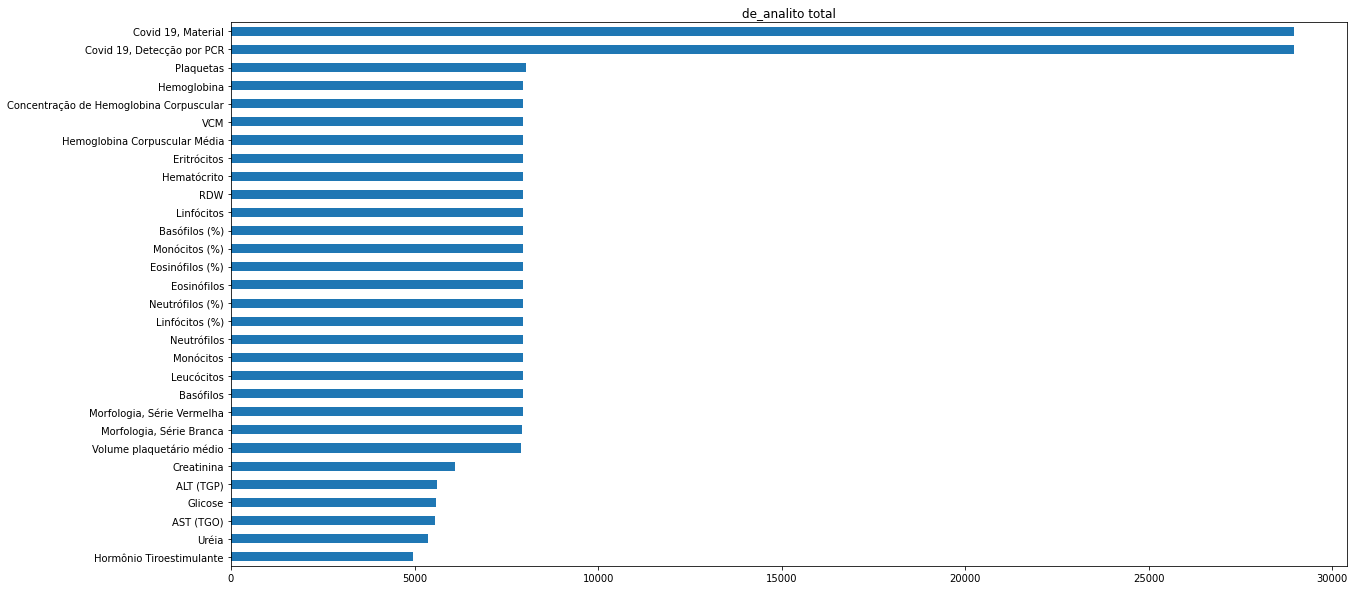

In [6]:
fig = plt.figure(figsize=[20,10])
s = total['de_analito'].value_counts()[0:30].sort_values(ascending=True)
analitos_names = s.index
print(len(analitos_names))
s.plot.barh()
plt.title('de_analito total')
plt.show()

In [7]:
observed = ['Glicose','Monócitos','Eosinófilos','Neutrófilos','Linfócitos','Leucócitos','Plaquetas']

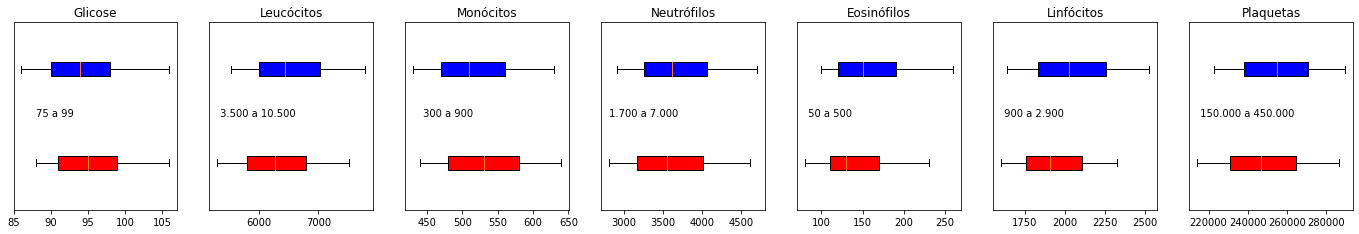

In [10]:
plt.figure(figsize=[24,20])
qqq = []

i = 0
value = 0.5
for names in analitos_names:
    for obs in observed:
        if obs == names:
            s1 = positivo[ positivo['de_analito'].str[:] == names]['de_resultado']
            s2 = negativo[ negativo['de_analito'].str[:] == names]['de_resultado']

            s1 = pd.to_numeric(s1,errors='coerce')

            s1 = s1[~(np.abs(s1-s1.mean()) > (value*s1.std()))]
            qqq.append(s1.describe())
            s1 = s1.get_values()
            s1 = s1.astype('float')
            s1 = s1[np.logical_not(np.isnan(s1))]

            s2 = pd.to_numeric(s2,errors='coerce')
#             for obs in observed:
#                 if obs == names:
            s2 = s2[~(np.abs(s2-s2.mean()) > (value*s2.std()))]
            qqq.append(s2.describe())
            s2 = s2.get_values()
            s2 = s2.astype('float')
            s2 = s2[np.logical_not(np.isnan(s2))]

            if s.shape[0] != 0 and names != 'Resultado COVID-19:':
                plt.subplot(5,7,i+1)
        #         s1.plot.box(title=names, vert=0)
        #         s2.plot.box(title=names, vert=0)
                values = [s1, s2]
                bplot = plt.boxplot(values, vert=0, patch_artist=True )

                # fill with colors
                colors = ['red', 'blue']
                for patch, color in zip(bplot['boxes'], colors):
                    patch.set_facecolor(color)

                plt.title(names)
                plt.text(np.min(s1),1.5,positivo[ positivo['de_analito'].str[:] == names]['de_valor_referencia'].iloc[0])
                plt.gca().yaxis.set_visible(False)
        #         plt.legend()
        #         plt.axis(False)
        #     else:
        #         plt.title('vacio')
                i += 1
plt.show()

In [11]:
for obs in observed:
    print(obs, total[ total['de_analito'].str[:] == obs]['cd_unidade'].unique())

Glicose ['mg/dL']
Monócitos ['/mm3']
Eosinófilos ['/mm3']
Neutrófilos ['/mm3']
Linfócitos ['/mm3']
Leucócitos ['/mm3']
Plaquetas ['/mm3']


In [12]:
qqq = pd.concat(qqq,axis=1)

In [18]:
qqq.columns = ['Glicose+','Glicose-','Leucócitos+','Leucócitos-','Monócitos+','Monócitos-','Neutrófilos+','Neutrófilos-','Eosinófilos +','Eosinófilos-','Linfocitos +','Linfocitos-','Plaquetas+','Plaquetas-']

In [19]:
qqq

Glicose+     Glicose-  Leucócitos+  Leucócitos-   Monócitos+  \
count  884.000000  2657.000000   947.000000  2387.000000  1038.000000   
mean    95.313348    94.089575  6315.174234  6529.723502   531.117534   
std      5.095265     5.376512   609.634457   628.445846    60.434809   
min     88.000000    86.000000  5300.000000  5540.000000   440.000000   
25%     91.000000    90.000000  5810.000000  6000.000000   480.000000   
50%     95.000000    94.000000  6280.000000  6440.000000   530.000000   
75%     99.000000    98.000000  6800.000000  7035.000000   580.000000   
max    106.000000   106.000000  7510.000000  7790.000000   640.000000   

        Monócitos-  Neutrófilos+  Neutrófilos-  Eosinófilos +  Eosinófilos-  \
count  2602.000000   1007.000000   2434.000000    1173.000000   2768.000000   
mean    519.116065   3604.260179   3683.541495     141.329923    161.011561   
std      58.178711    508.591029    497.924782      43.100063     45.423628   
min     430.000000   2810.000000   2920.000000      80.000000    100.000000   
25%     470.000000   3170.000000   3260.000000     110.000000    120.000000   
50%     510.000000   3550.000000   3620.000000     130.000000    150.000000   
75%     560.000000   4010.000000   4060.000000     170.000000    190.000000   
max     630.000000   4620.000000   4710.000000     230.000000    260.000000   

       Linfocitos +  Linfocitos-     Plaquetas+     Plaquetas-  
count    965.000000  2864.000000     982.000000    2362.000000  
mean    1940.943005  2048.530028  248189.409369  254832.768840  
std      206.066807   251.529941   20334.931753   19405.380772  
min     1600.000000  1640.000000  214000.000000  223000.000000  
25%     1760.000000  1830.000000  231000.000000  238000.000000  
50%     1910.000000  2030.000000  247000.000000  255000.000000  
75%     2110.000000  2260.000000  265000.000000  271000.000000  
max     2330.000000  2530.000000  287000.000000  290000.000000

In [23]:
multi_pos = pd.read_csv('positivo_multi_index_flury.csv', delimiter='|', error_bad_lines=False, encoding="utf-8")
multi_neg = pd.read_csv('negativo_multi_index_flury.csv', delimiter='|', error_bad_lines=False, encoding="utf-8")

In [25]:
multi_total = pd.concat([multi_pos, multi_neg])

In [27]:
multi_index = multi_total.set_index(['id_paciente','dt_coleta']).sort_index()

In [38]:
id_unicos = multi_total.id_paciente.unique()

In [47]:
multi_total[multi_total.id_paciente == id_unicos[0]]

id_paciente   dt_coleta de_origem  \
0  00129AB381E80E5B82D7EF9CEF3FD1F9  2020-05-19       LAB   
1  00129AB381E80E5B82D7EF9CEF3FD1F9  2020-05-19       LAB   

                                               de_exame  \
0  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                   de_analito                         de_resultado cd_unidade  \
0  Covid 19, Detecção por PCR                            detectado        NaN   
1          Covid 19, Material  raspado de orofaringe e nasofaringe        NaN   

  de_valor_referencia  
0       Não detectado  
1                 NaN

In [58]:
for id_ in id_unicos:
    print(id_)
    paciente = multi_total[ id_ == multi_total.id_paciente ]
    print( paciente[paciente.de_analito.str.contains('Covid')]['id_paciente'] )

00129AB381E80E5B82D7EF9CEF3FD1F9
                        id_paciente   dt_coleta de_origem  \
0  00129AB381E80E5B82D7EF9CEF3FD1F9  2020-05-19       LAB   
1  00129AB381E80E5B82D7EF9CEF3FD1F9  2020-05-19       LAB   

                                               de_exame  \
0  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                   de_analito                         de_resultado cd_unidade  \
0  Covid 19, Detecção por PCR                            detectado        NaN   
1          Covid 19, Material  raspado de orofaringe e nasofaringe        NaN   

  de_valor_referencia  
0       Não detectado  
1                 NaN  
001BF7E20F7009F0AAC3D6761B245EF9
                        id_paciente   dt_coleta de_origem  \
2  001BF7E20F7009F0AAC3D6761B245EF9  2020-05-22       LAB   
3  001BF7E20F7009F0AAC3D6761B245EF9  2020-05-22       LAB   

                                               de_exame  \
2  NOVO CORON

                          id_paciente   dt_coleta de_origem  \
215  00C61E15010FED671883361A0F7AAE95  2020-05-15       LAB   
216  00C61E15010FED671883361A0F7AAE95  2020-05-15       LAB   
272  00C61E15010FED671883361A0F7AAE95  2020-05-28       LAB   
273  00C61E15010FED671883361A0F7AAE95  2020-05-28       LAB   
274  00C61E15010FED671883361A0F7AAE95  2020-05-28       LAB   
275  00C61E15010FED671883361A0F7AAE95  2020-05-28       LAB   
276  00C61E15010FED671883361A0F7AAE95  2020-06-04       LAB   
277  00C61E15010FED671883361A0F7AAE95  2020-06-04       LAB   
278  00C61E15010FED671883361A0F7AAE95  2020-06-04       LAB   
279  00C61E15010FED671883361A0F7AAE95  2020-06-04       LAB   
280  00C61E15010FED671883361A0F7AAE95  2020-06-11       LAB   
281  00C61E15010FED671883361A0F7AAE95  2020-06-11       LAB   
282  00C61E15010FED671883361A0F7AAE95  2020-06-11       LAB   
283  00C61E15010FED671883361A0F7AAE95  2020-06-11       LAB   

                                                 de_ex

                          id_paciente   dt_coleta de_origem  \
497  010C05674EE0BBAA0B5642001F15067B  2020-04-14       LAB   
498  010C05674EE0BBAA0B5642001F15067B  2020-04-14       LAB   

                                                 de_exame  \
497  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
498  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                     de_analito                         de_resultado  \
497  Covid 19, Detecção por PCR                            detectado   
498          Covid 19, Material  raspado de orofaringe e nasofaringe   

    cd_unidade de_valor_referencia  
497        NaN       Não detectado  
498        NaN                 NaN  
010F277F0BA204382BCD259E8293500E
                          id_paciente   dt_coleta de_origem  \
499  010F277F0BA204382BCD259E8293500E  2020-04-16       LAB   
500  010F277F0BA204382BCD259E8293500E  2020-04-16       LAB   
582  010F277F0BA204382BCD259E8293500E  2020-04-27       LAB   
583  010F277F

                          id_paciente   dt_coleta de_origem  \
931  018587D4C8A800B71C68F528EAA00949  2020-04-09       LAB   
932  018587D4C8A800B71C68F528EAA00949  2020-04-09       LAB   

                                                 de_exame  \
931  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
932  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                     de_analito         de_resultado cd_unidade  \
931  Covid 19, Detecção por PCR            detectado        NaN   
932          Covid 19, Material  swab de nasofaringe        NaN   

    de_valor_referencia  
931       Não detectado  
932                 NaN  
0187E21F25E16DE60110A78362CBBC5D
                           id_paciente   dt_coleta de_origem  \
964   0187E21F25E16DE60110A78362CBBC5D  2020-04-10       LAB   
965   0187E21F25E16DE60110A78362CBBC5D  2020-04-10       LAB   
966   0187E21F25E16DE60110A78362CBBC5D  2020-04-24       LAB   
967   0187E21F25E16DE60110A78362CBBC5D  2020-04-24       

                           id_paciente   dt_coleta de_origem  \
1113  01A1199074B5E2713FD43351E2206AB7  2020-04-28       LAB   
1114  01A1199074B5E2713FD43351E2206AB7  2020-04-28       LAB   

                                                  de_exame  \
1113  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1114  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
1113  Covid 19, Detecção por PCR            detectado        NaN   
1114          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
1113       Não detectado  
1114                 NaN  
01AE600994A66847CD0CF9EE894CDB88
                           id_paciente   dt_coleta de_origem  \
1115  01AE600994A66847CD0CF9EE894CDB88  2020-04-27       LAB   
1116  01AE600994A66847CD0CF9EE894CDB88  2020-04-27       LAB   

                                                  de_exame  \
1115  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETE

                           id_paciente   dt_coleta de_origem  \
1279  02035F22D16D9A48560A5202434F4670  2020-05-01       LAB   
1280  02035F22D16D9A48560A5202434F4670  2020-05-01       LAB   

                                                  de_exame  \
1279  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1280  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
1279  Covid 19, Detecção por PCR            detectado        NaN   
1280          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
1279       Não detectado  
1280                 NaN  
0205E58E282AB6C7F15CCB5BC9740ECF
                           id_paciente   dt_coleta de_origem  \
1281  0205E58E282AB6C7F15CCB5BC9740ECF  2020-05-06       LAB   
1282  0205E58E282AB6C7F15CCB5BC9740ECF  2020-05-06       LAB   
1337  0205E58E282AB6C7F15CCB5BC9740ECF  2020-05-13       LAB   
1338  0205E58E282AB6C7F15CCB5BC9740ECF  2020-

                           id_paciente   dt_coleta de_origem  \
1458  023DFD4CCAD7BD549A7E53CD5129818F  2020-05-23       LAB   
1459  023DFD4CCAD7BD549A7E53CD5129818F  2020-05-23       LAB   

                                                  de_exame  \
1458  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1459  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
1458  Covid 19, Detecção por PCR                            detectado   
1459          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
1458        NaN       Não detectado  
1459        NaN                 NaN  
024120776B6797AEBDFC12C0301B1A8F
                           id_paciente   dt_coleta de_origem  \
1460  024120776B6797AEBDFC12C0301B1A8F  2020-04-06       LAB   
1461  024120776B6797AEBDFC12C0301B1A8F  2020-04-06       LAB   
1462  024120776B6797AEBDFC12C0301B1A8F  2020-06-12       LAB 

                           id_paciente   dt_coleta de_origem  \
1562  028CB37F38CA196399F59D0FC3447751  2020-05-16       LAB   
1563  028CB37F38CA196399F59D0FC3447751  2020-05-16       LAB   
1564  028CB37F38CA196399F59D0FC3447751  2020-05-22       LAB   
1565  028CB37F38CA196399F59D0FC3447751  2020-05-22       LAB   
1566  028CB37F38CA196399F59D0FC3447751  2020-05-22       LAB   
1567  028CB37F38CA196399F59D0FC3447751  2020-05-22       LAB   
1568  028CB37F38CA196399F59D0FC3447751  2020-05-22       LAB   
1569  028CB37F38CA196399F59D0FC3447751  2020-05-22       LAB   

                                                  de_exame  \
1562  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1563  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1564                         COVID19, ANTICORPOS IgG, soro   
1565                         COVID19, ANTICORPOS IgG, soro   
1566                         COVID19, ANTICORPOS IgM, soro   
1567                         COVID19, ANTICORPOS Ig

                           id_paciente   dt_coleta de_origem  \
1648  03019FC85919DDBFF87C29B6C64AFD4E  2020-04-29       LAB   
1649  03019FC85919DDBFF87C29B6C64AFD4E  2020-04-29       LAB   

                                                  de_exame  \
1648  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1649  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
1648  Covid 19, Detecção por PCR                            detectado   
1649          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
1648        NaN       Não detectado  
1649        NaN                 NaN  
0305940DB337041453B4EB364FEA815B
                           id_paciente   dt_coleta de_origem  \
1695  0305940DB337041453B4EB364FEA815B  2020-04-28       LAB   
1696  0305940DB337041453B4EB364FEA815B  2020-04-28       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
1887  0396E7A042EAF22A3FF1F6C8D31F7410  2020-05-25       LAB   
1888  0396E7A042EAF22A3FF1F6C8D31F7410  2020-05-25       LAB   

                                                  de_exame  \
1887  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
1888  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
1887  Covid 19, Detecção por PCR                            detectado   
1888          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
1887        NaN       Não detectado  
1888        NaN                 NaN  
039921741837C4D8C89A96A91FF53717
                           id_paciente   dt_coleta de_origem  \
1889  039921741837C4D8C89A96A91FF53717  2020-05-02       LAB   
1890  039921741837C4D8C89A96A91FF53717  2020-05-02       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
2021  03DC38281ACA1C1BBA17F763BFCE8A44  2020-05-06       LAB   
2022  03DC38281ACA1C1BBA17F763BFCE8A44  2020-05-06       LAB   
2055  03DC38281ACA1C1BBA17F763BFCE8A44  2020-06-11       LAB   
2056  03DC38281ACA1C1BBA17F763BFCE8A44  2020-06-11       LAB   
2057  03DC38281ACA1C1BBA17F763BFCE8A44  2020-06-11       LAB   
2058  03DC38281ACA1C1BBA17F763BFCE8A44  2020-06-11       LAB   

                                                  de_exame  \
2021  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2022  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2055                         COVID19, ANTICORPOS IgG, soro   
2056                         COVID19, ANTICORPOS IgG, soro   
2057                         COVID19, ANTICORPOS IgM, soro   
2058                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito  \
2021                     Covid 19, Detecção por PCR   
2022  

                           id_paciente   dt_coleta de_origem  \
2081  042901CB1DC12E714991F5102F56539E  2020-05-22       LAB   
2082  042901CB1DC12E714991F5102F56539E  2020-05-22       LAB   

                                                  de_exame  \
2081  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2082  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
2081  Covid 19, Detecção por PCR                            detectado   
2082          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
2081        NaN       Não detectado  
2082        NaN                 NaN  
042B616764C3C001C44321E099270F42
                           id_paciente   dt_coleta de_origem  \
2083  042B616764C3C001C44321E099270F42  2020-04-28       LAB   
2084  042B616764C3C001C44321E099270F42  2020-04-28       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
2261  04730CE7817C847AB0CCA1440F74A053  2020-05-21       LAB   
2262  04730CE7817C847AB0CCA1440F74A053  2020-05-21       LAB   

                                                  de_exame  \
2261  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2262  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
2261  Covid 19, Detecção por PCR                            detectado   
2262          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
2261        NaN       Não detectado  
2262        NaN                 NaN  
04789E3AE165B7E4B8C66FC562874231
                           id_paciente   dt_coleta de_origem  \
2263  04789E3AE165B7E4B8C66FC562874231  2020-04-29       LAB   
2264  04789E3AE165B7E4B8C66FC562874231  2020-04-29       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
2581  04AF51D45DE0C6F991CAA51ACF83EE03  2020-05-14       LAB   
2582  04AF51D45DE0C6F991CAA51ACF83EE03  2020-05-14       LAB   

                                                  de_exame  \
2581  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2582  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
2581  Covid 19, Detecção por PCR            detectado        NaN   
2582          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
2581       Não detectado  
2582                 NaN  
04B5537F1A5A3695E1F3EDE45D2E32DE
                           id_paciente   dt_coleta de_origem  \
2584  04B5537F1A5A3695E1F3EDE45D2E32DE  2020-04-24       LAB   
2585  04B5537F1A5A3695E1F3EDE45D2E32DE  2020-04-24       LAB   

                                                  de_exame  \
2584  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETE

                           id_paciente   dt_coleta de_origem  \
2691  05556836A99B45D9EC656FA9B649847C  2020-04-29       LAB   
2692  05556836A99B45D9EC656FA9B649847C  2020-04-29       LAB   
2693  05556836A99B45D9EC656FA9B649847C  2020-06-09       LAB   
2694  05556836A99B45D9EC656FA9B649847C  2020-06-09       LAB   
2695  05556836A99B45D9EC656FA9B649847C  2020-06-09       LAB   
2696  05556836A99B45D9EC656FA9B649847C  2020-06-09       LAB   

                                                  de_exame  \
2691  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2692  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2693                         COVID19, ANTICORPOS IgG, soro   
2694                         COVID19, ANTICORPOS IgG, soro   
2695                         COVID19, ANTICORPOS IgM, soro   
2696                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito         de_resultado  \
2691                     Covid 19, Detec

                           id_paciente   dt_coleta de_origem  \
2954  05C56D6BC9F441A1D4DB3AE7596F5750  2020-05-16       LAB   
2955  05C56D6BC9F441A1D4DB3AE7596F5750  2020-05-16       LAB   

                                                  de_exame  \
2954  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
2955  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
2954  Covid 19, Detecção por PCR                            detectado   
2955          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
2954        NaN       Não detectado  
2955        NaN                 NaN  
05C58B50F29DD7C055214CA840934698
                           id_paciente   dt_coleta de_origem  \
2956  05C58B50F29DD7C055214CA840934698  2020-05-14       LAB   
2957  05C58B50F29DD7C055214CA840934698  2020-05-14       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
3275  064C2EB00FDFB0CE6C54AC4154510458  2020-05-14       LAB   
3276  064C2EB00FDFB0CE6C54AC4154510458  2020-05-14       LAB   

                                                  de_exame  \
3275  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
3276  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
3275  Covid 19, Detecção por PCR                            detectado   
3276          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
3275        NaN       Não detectado  
3276        NaN                 NaN  
0652765BAC8D3EF849E6D337EEA24400
                           id_paciente   dt_coleta de_origem  \
3277  0652765BAC8D3EF849E6D337EEA24400  2020-04-21       LAB   
3278  0652765BAC8D3EF849E6D337EEA24400  2020-04-21       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
3332  06A5731C6EED083A6E730DE55B1A0F33  2020-05-25       LAB   
3333  06A5731C6EED083A6E730DE55B1A0F33  2020-05-25       LAB   
3334  06A5731C6EED083A6E730DE55B1A0F33  2020-05-25       LAB   
3335  06A5731C6EED083A6E730DE55B1A0F33  2020-05-25       LAB   
3336  06A5731C6EED083A6E730DE55B1A0F33  2020-05-25       LAB   
3337  06A5731C6EED083A6E730DE55B1A0F33  2020-05-25       LAB   
3338  06A5731C6EED083A6E730DE55B1A0F33  2020-06-04       LAB   
3339  06A5731C6EED083A6E730DE55B1A0F33  2020-06-04       LAB   
3340  06A5731C6EED083A6E730DE55B1A0F33  2020-06-04       LAB   
3341  06A5731C6EED083A6E730DE55B1A0F33  2020-06-04       LAB   
3342  06A5731C6EED083A6E730DE55B1A0F33  2020-06-04       LAB   
3343  06A5731C6EED083A6E730DE55B1A0F33  2020-06-04       LAB   

                                                  de_exame  \
3332  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
3333  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), D

                           id_paciente   dt_coleta de_origem  \
3415  06F7F0BDA2418CB0B1C7DAAC36697DEB  2020-05-25       LAB   
3416  06F7F0BDA2418CB0B1C7DAAC36697DEB  2020-05-25       LAB   

                                                  de_exame  \
3415  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
3416  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
3415  Covid 19, Detecção por PCR                            detectado   
3416          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
3415        NaN       Não detectado  
3416        NaN                 NaN  
06F84F5FCDD4E6A08E893C13BF70224D
                           id_paciente   dt_coleta de_origem  \
3417  06F84F5FCDD4E6A08E893C13BF70224D  2020-05-06       LAB   
3418  06F84F5FCDD4E6A08E893C13BF70224D  2020-05-06       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
3488  0735D55586EBDA04E5232BB050FE649F  2020-05-20       LAB   
3489  0735D55586EBDA04E5232BB050FE649F  2020-05-20       LAB   

                                                  de_exame  \
3488  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
3489  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
3488  Covid 19, Detecção por PCR                            detectado   
3489          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
3488        NaN       Não detectado  
3489        NaN                 NaN  
073881D02E4F04B81DF0E3615DA52632
                           id_paciente   dt_coleta de_origem  \
3490  073881D02E4F04B81DF0E3615DA52632  2020-05-25       LAB   
3491  073881D02E4F04B81DF0E3615DA52632  2020-05-25       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
3564  076E22A25D597D8FE35106D7B380B5EA  2020-05-16       LAB   
3565  076E22A25D597D8FE35106D7B380B5EA  2020-05-16       LAB   

                                                  de_exame  \
3564  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
3565  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
3564  Covid 19, Detecção por PCR                            detectado   
3565          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
3564        NaN       Não detectado  
3565        NaN                 NaN  
0772617D69EF1324D8DC329E33055285
                           id_paciente   dt_coleta de_origem  \
3566  0772617D69EF1324D8DC329E33055285  2020-05-15       LAB   
3567  0772617D69EF1324D8DC329E33055285  2020-05-15       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
4071  081D6A8A3ACBEB9231500C74FD37BF00  2020-04-25       LAB   
4072  081D6A8A3ACBEB9231500C74FD37BF00  2020-04-25       LAB   

                                                  de_exame  \
4071  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4072  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
4071  Covid 19, Detecção por PCR            detectado        NaN   
4072          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
4071       Não detectado  
4072                 NaN  
0831D6E94DBAFB8F47F8B8AD5A11B023
                            id_paciente   dt_coleta de_origem  \
4073   0831D6E94DBAFB8F47F8B8AD5A11B023  2020-05-04       LAB   
4074   0831D6E94DBAFB8F47F8B8AD5A11B023  2020-05-04       LAB   
4075   0831D6E94DBAFB8F47F8B8AD5A11B023  2020-05-19       LAB   
4076   0831D6E94DBAFB8F47F8B8AD5A11B023  

                           id_paciente   dt_coleta de_origem  \
4172  089C5C4850EB2BC22EB15C31CDB88072  2020-04-30       LAB   
4173  089C5C4850EB2BC22EB15C31CDB88072  2020-04-30       LAB   
4174  089C5C4850EB2BC22EB15C31CDB88072  2020-05-21       LAB   
4175  089C5C4850EB2BC22EB15C31CDB88072  2020-05-21       LAB   
4176  089C5C4850EB2BC22EB15C31CDB88072  2020-05-21       LAB   
4177  089C5C4850EB2BC22EB15C31CDB88072  2020-05-21       LAB   

                                                  de_exame  \
4172  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4173  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4174                         COVID19, ANTICORPOS IgG, soro   
4175                         COVID19, ANTICORPOS IgG, soro   
4176                         COVID19, ANTICORPOS IgM, soro   
4177                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito            de_resultado  \
4172                     Covid 19, De

                           id_paciente   dt_coleta de_origem  \
4289  08EA95535046B1D40E5AE6233CD4ED2D  2020-04-27       LAB   
4290  08EA95535046B1D40E5AE6233CD4ED2D  2020-04-27       LAB   

                                                  de_exame  \
4289  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4290  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
4289  Covid 19, Detecção por PCR            detectado        NaN   
4290          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
4289       Não detectado  
4290                 NaN  
08FE3EFB03FB63C04BE8D9D99D218D42
                           id_paciente   dt_coleta de_origem  \
4291  08FE3EFB03FB63C04BE8D9D99D218D42  2020-05-21       LAB   
4292  08FE3EFB03FB63C04BE8D9D99D218D42  2020-05-21       LAB   

                                                  de_exame  \
4291  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETE

                           id_paciente   dt_coleta de_origem  \
4470  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-14       LAB   
4471  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-14       LAB   
4472  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-14       LAB   
4473  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-14       LAB   
4474  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-24       LAB   
4475  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-24       LAB   
4476  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-24       LAB   
4477  092C0D1972E9DA873FF3BE5FE492B62F  2020-04-24       LAB   

                                                  de_exame  \
4470                         COVID19, ANTICORPOS IgG, soro   
4471                         COVID19, ANTICORPOS IgM, soro   
4472  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4473  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4474                         COVID19, ANTICORPOS IgG, soro   
4475                         COVID19, ANTICORPOS Ig

                           id_paciente   dt_coleta de_origem  \
4794  097E45659CEDCAEE3EAE79462A1E2F89  2020-05-20       LAB   
4795  097E45659CEDCAEE3EAE79462A1E2F89  2020-05-20       LAB   
4796  097E45659CEDCAEE3EAE79462A1E2F89  2020-06-04       LAB   
4797  097E45659CEDCAEE3EAE79462A1E2F89  2020-06-04       LAB   
4798  097E45659CEDCAEE3EAE79462A1E2F89  2020-06-04       LAB   
4799  097E45659CEDCAEE3EAE79462A1E2F89  2020-06-04       LAB   

                                                  de_exame  \
4794  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4795  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
4796                         COVID19, ANTICORPOS IgG, soro   
4797                         COVID19, ANTICORPOS IgG, soro   
4798                         COVID19, ANTICORPOS IgM, soro   
4799                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito  \
4794                     Covid 19, Detecção por PCR   
4795  

                           id_paciente   dt_coleta de_origem  \
5085  09D5DBFE6F1F8099D857A7C8A3FF1D2C  2020-05-22       LAB   
5086  09D5DBFE6F1F8099D857A7C8A3FF1D2C  2020-05-22       LAB   
5087  09D5DBFE6F1F8099D857A7C8A3FF1D2C  2020-05-25       LAB   
5088  09D5DBFE6F1F8099D857A7C8A3FF1D2C  2020-05-25       LAB   
5089  09D5DBFE6F1F8099D857A7C8A3FF1D2C  2020-05-25       LAB   
5090  09D5DBFE6F1F8099D857A7C8A3FF1D2C  2020-05-25       LAB   

                                                  de_exame  \
5085  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
5086  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
5087                         COVID19, ANTICORPOS IgG, soro   
5088                         COVID19, ANTICORPOS IgG, soro   
5089                         COVID19, ANTICORPOS IgM, soro   
5090                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito            de_resultado  \
5085                     Covid 19, De

                           id_paciente   dt_coleta de_origem  \
5280  0A21235EB6F5096D2929EAFAF0BA3AEB  2020-05-25       LAB   
5281  0A21235EB6F5096D2929EAFAF0BA3AEB  2020-05-25       LAB   

                                                  de_exame  \
5280  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
5281  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
5280  Covid 19, Detecção por PCR                            detectado   
5281          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
5280        NaN       Não detectado  
5281        NaN                 NaN  
0A2B562DDAA34136BA4B7373177E0356
                           id_paciente   dt_coleta de_origem  \
5282  0A2B562DDAA34136BA4B7373177E0356  2020-05-12       LAB   
5283  0A2B562DDAA34136BA4B7373177E0356  2020-05-12       LAB   
5284  0A2B562DDAA34136BA4B7373177E0356  2020-05-29       LAB 

                           id_paciente   dt_coleta de_origem  \
5322  0AA18DDE561E0AC1F759B7B17691AEF8  2020-05-25       LAB   
5323  0AA18DDE561E0AC1F759B7B17691AEF8  2020-05-25       LAB   

                                                  de_exame  \
5322  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
5323  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
5322  Covid 19, Detecção por PCR                            detectado   
5323          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
5322        NaN       Não detectado  
5323        NaN                 NaN  
0AB4079DBA8843CF8DE71C6417AED842
                            id_paciente   dt_coleta de_origem  \
5324   0AB4079DBA8843CF8DE71C6417AED842  2020-05-14       LAB   
5325   0AB4079DBA8843CF8DE71C6417AED842  2020-05-14       LAB   
5326   0AB4079DBA8843CF8DE71C6417AED842  2020-05-21       

                           id_paciente   dt_coleta de_origem  \
5666  0AFD2700BDD106E8A5D3FACE0C437BB0  2020-04-27       LAB   
5667  0AFD2700BDD106E8A5D3FACE0C437BB0  2020-04-27       LAB   
5668  0AFD2700BDD106E8A5D3FACE0C437BB0  2020-04-27       LAB   
5669  0AFD2700BDD106E8A5D3FACE0C437BB0  2020-04-27       LAB   
5670  0AFD2700BDD106E8A5D3FACE0C437BB0  2020-05-07       LAB   
5671  0AFD2700BDD106E8A5D3FACE0C437BB0  2020-05-07       LAB   

                                                  de_exame  \
5666                         COVID19, ANTICORPOS IgA, soro   
5667                         COVID19, ANTICORPOS IgA, soro   
5668                         COVID19, ANTICORPOS IgG, soro   
5669                         COVID19, ANTICORPOS IgG, soro   
5670  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
5671  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                                    de_analito  \
5666           Covid 19, Anticorpos IgA, Elisa   
5667  Covid 19, 

                           id_paciente   dt_coleta de_origem  \
5715  0B1CDDC1815C284C6018AA25E77485FC  2020-05-12       LAB   
5716  0B1CDDC1815C284C6018AA25E77485FC  2020-05-12       LAB   

                                                  de_exame  \
5715  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
5716  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
5715  Covid 19, Detecção por PCR                            detectado   
5716          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
5715        NaN       Não detectado  
5716        NaN                 NaN  
0B1D7F7F8C4E9AF06BD969FD9382CB7C
                           id_paciente   dt_coleta de_origem  \
5717  0B1D7F7F8C4E9AF06BD969FD9382CB7C  2020-04-29       LAB   
5718  0B1D7F7F8C4E9AF06BD969FD9382CB7C  2020-04-29       LAB   

                                                  de_exame  

                            id_paciente   dt_coleta de_origem  \
5988   0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
5989   0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
5990   0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
5991   0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
5992   0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
5993   0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
5994   0B98BEE59F88666B8FC39BC22FEB1354  2020-05-05       LAB   
5995   0B98BEE59F88666B8FC39BC22FEB1354  2020-05-05       LAB   
18424  0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
18425  0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
18426  0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
18427  0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
18428  0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
18429  0B98BEE59F88666B8FC39BC22FEB1354  2020-04-22       LAB   
18430  0B98BEE59F88666B8F

                           id_paciente   dt_coleta de_origem  \
6044  0C03B1BE680387025583EF41EEC98697  2020-04-20       LAB   
6045  0C03B1BE680387025583EF41EEC98697  2020-04-20       LAB   
6046  0C03B1BE680387025583EF41EEC98697  2020-05-19       LAB   
6047  0C03B1BE680387025583EF41EEC98697  2020-05-19       LAB   
6048  0C03B1BE680387025583EF41EEC98697  2020-05-19       LAB   
6049  0C03B1BE680387025583EF41EEC98697  2020-05-19       LAB   

                                                  de_exame  \
6044  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6045  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6046                         COVID19, ANTICORPOS IgG, soro   
6047                         COVID19, ANTICORPOS IgG, soro   
6048                         COVID19, ANTICORPOS IgM, soro   
6049                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito  \
6044                     Covid 19, Detecção por PCR   
6045  

                           id_paciente   dt_coleta de_origem  \
6217  0C49C155017C5382FE76A9A46DEABC0B  2020-04-28       LAB   
6218  0C49C155017C5382FE76A9A46DEABC0B  2020-04-28       LAB   
6219  0C49C155017C5382FE76A9A46DEABC0B  2020-06-09       LAB   
6220  0C49C155017C5382FE76A9A46DEABC0B  2020-06-09       LAB   
6221  0C49C155017C5382FE76A9A46DEABC0B  2020-06-09       LAB   
6222  0C49C155017C5382FE76A9A46DEABC0B  2020-06-09       LAB   

                                                  de_exame  \
6217  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6218  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6219                         COVID19, ANTICORPOS IgG, soro   
6220                         COVID19, ANTICORPOS IgG, soro   
6221                         COVID19, ANTICORPOS IgM, soro   
6222                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito         de_resultado  \
6217                     Covid 19, Detec

                           id_paciente   dt_coleta de_origem  \
6248  0C8A4B1A9F6EF9E04767F530C96F5D08  2020-05-22       LAB   
6249  0C8A4B1A9F6EF9E04767F530C96F5D08  2020-05-22       LAB   

                                                  de_exame  \
6248  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6249  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
6248  Covid 19, Detecção por PCR            detectado        NaN   
6249          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
6248       Não detectado  
6249                 NaN  
0C8B4507B22EC41F36DC4096BEA5BEC8
                           id_paciente   dt_coleta de_origem  \
6314  0C8B4507B22EC41F36DC4096BEA5BEC8  2020-05-07       LAB   
6315  0C8B4507B22EC41F36DC4096BEA5BEC8  2020-05-07       LAB   

                                                  de_exame  \
6314  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETE

                           id_paciente   dt_coleta de_origem  \
6482  0D28A9B3E6E1E7A3758E633862AD7F42  2020-04-29       LAB   
6483  0D28A9B3E6E1E7A3758E633862AD7F42  2020-04-29       LAB   

                                                  de_exame  \
6482  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6483  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
6482  Covid 19, Detecção por PCR                            detectado   
6483          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
6482        NaN       Não detectado  
6483        NaN                 NaN  
0D3F84A2441304FB239CFFBAE0911518
                           id_paciente   dt_coleta de_origem  \
6484  0D3F84A2441304FB239CFFBAE0911518  2020-05-11       LAB   
6485  0D3F84A2441304FB239CFFBAE0911518  2020-05-11       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
6565  0DD920D7ECF5A6C0979AA1649CABBFE0  2020-04-18       LAB   
6566  0DD920D7ECF5A6C0979AA1649CABBFE0  2020-04-18       LAB   

                                                  de_exame  \
6565  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6566  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito            de_resultado cd_unidade  \
6565  Covid 19, Detecção por PCR               detectado        NaN   
6566          Covid 19, Material  raspado de nasofaringe        NaN   

     de_valor_referencia  
6565       Não detectado  
6566                 NaN  
0DDDF3524235818081401CFD4D083208
                           id_paciente   dt_coleta de_origem  \
6567  0DDDF3524235818081401CFD4D083208  2020-05-13       LAB   
6568  0DDDF3524235818081401CFD4D083208  2020-05-13       LAB   
6569  0DDDF3524235818081401CFD4D083208  2020-05-25       LAB   
6570  0DDDF3524235818081401CFD4D0832

                           id_paciente   dt_coleta de_origem  \
6816  0E1877202CC4520B7CC3AFD6B64D6E44  2020-04-24       LAB   
6817  0E1877202CC4520B7CC3AFD6B64D6E44  2020-04-24       LAB   

                                                  de_exame  \
6816  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
6817  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
6816  Covid 19, Detecção por PCR                            detectado   
6817          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
6816        NaN       Não detectado  
6817        NaN                 NaN  
0E1EE03F6B0643B76B5CBCA19E0E63EA
                            id_paciente   dt_coleta de_origem  \
6911   0E1EE03F6B0643B76B5CBCA19E0E63EA  2020-04-20       LAB   
6912   0E1EE03F6B0643B76B5CBCA19E0E63EA  2020-04-20       LAB   
6913   0E1EE03F6B0643B76B5CBCA19E0E63EA  2020-04-30       

                           id_paciente   dt_coleta de_origem  \
7118  0EA5D1A3B5F18957D848EC01999A9BDD  2020-05-20       LAB   
7119  0EA5D1A3B5F18957D848EC01999A9BDD  2020-05-20       LAB   

                                                  de_exame  \
7118  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
7119  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
7118  Covid 19, Detecção por PCR                            detectado   
7119          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
7118        NaN       Não detectado  
7119        NaN                 NaN  
0EAB12883042CF0FD548CCA8C26FF15E
                           id_paciente   dt_coleta de_origem  \
7163  0EAB12883042CF0FD548CCA8C26FF15E  2020-05-15       LAB   
7164  0EAB12883042CF0FD548CCA8C26FF15E  2020-05-15       LAB   

                                                  de_exame  

                            id_paciente   dt_coleta de_origem  \
7243   0F539035F2064C5EAA4C37A4748C0917  2020-05-05       LAB   
7244   0F539035F2064C5EAA4C37A4748C0917  2020-05-05       LAB   
7245   0F539035F2064C5EAA4C37A4748C0917  2020-05-18       LAB   
7246   0F539035F2064C5EAA4C37A4748C0917  2020-05-18       LAB   
24007  0F539035F2064C5EAA4C37A4748C0917  2020-05-05       LAB   
24008  0F539035F2064C5EAA4C37A4748C0917  2020-05-05       LAB   
24009  0F539035F2064C5EAA4C37A4748C0917  2020-05-18       LAB   
24010  0F539035F2064C5EAA4C37A4748C0917  2020-05-18       LAB   

                                                   de_exame  \
7243   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
7244   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
7245   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
7246   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24007  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24008  NOVO CORONAVÍRUS 2019 (SARS-C

                           id_paciente   dt_coleta de_origem  \
7412  0FF101AB17EC6D0EA79E33047232AA48  2020-04-17       LAB   
7413  0FF101AB17EC6D0EA79E33047232AA48  2020-04-17       LAB   

                                                  de_exame  \
7412  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
7413  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
7412  Covid 19, Detecção por PCR            detectado        NaN   
7413          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
7412       Não detectado  
7413                 NaN  
0FF55287DD6605A685ECCF3B05F60216
                           id_paciente   dt_coleta de_origem  \
7414  0FF55287DD6605A685ECCF3B05F60216  2020-05-25       LAB   
7415  0FF55287DD6605A685ECCF3B05F60216  2020-05-25       LAB   

                                                  de_exame  \
7414  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETE

                           id_paciente   dt_coleta de_origem  \
7911  109927E22AF2E818E72E8ED1FA927A32  2020-05-18       LAB   
7912  109927E22AF2E818E72E8ED1FA927A32  2020-05-18       LAB   

                                                  de_exame  \
7911  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
7912  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
7911  Covid 19, Detecção por PCR                            detectado   
7912          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
7911        NaN       Não detectado  
7912        NaN                 NaN  
109D20A11F28EC77F858D064DBFDAD2C
                           id_paciente   dt_coleta de_origem  \
7913  109D20A11F28EC77F858D064DBFDAD2C  2020-05-11       LAB   
7914  109D20A11F28EC77F858D064DBFDAD2C  2020-05-11       LAB   
7915  109D20A11F28EC77F858D064DBFDAD2C  2020-05-20       LAB 

                           id_paciente   dt_coleta de_origem  \
8206  111CDE663C1614634B932F65CB633E06  2020-04-15       LAB   
8207  111CDE663C1614634B932F65CB633E06  2020-04-15       LAB   
8208  111CDE663C1614634B932F65CB633E06  2020-05-18       LAB   
8209  111CDE663C1614634B932F65CB633E06  2020-05-18       LAB   
8210  111CDE663C1614634B932F65CB633E06  2020-05-18       LAB   
8211  111CDE663C1614634B932F65CB633E06  2020-05-18       LAB   

                                                  de_exame  \
8206  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
8207  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
8208                         COVID19, ANTICORPOS IgG, soro   
8209                         COVID19, ANTICORPOS IgG, soro   
8210                         COVID19, ANTICORPOS IgM, soro   
8211                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito            de_resultado  \
8206                     Covid 19, De

                           id_paciente   dt_coleta de_origem  \
8290  117F0A89617ED4492C29F1CA2B762C21  2020-05-20       LAB   
8291  117F0A89617ED4492C29F1CA2B762C21  2020-05-20       LAB   

                                                  de_exame  \
8290  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
8291  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
8290  Covid 19, Detecção por PCR                            detectado   
8291          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
8290        NaN       Não detectado  
8291        NaN                 NaN  
1181E9AB606C8F5E9BAF07E7DCF17E2C
                           id_paciente   dt_coleta de_origem  \
8371  1181E9AB606C8F5E9BAF07E7DCF17E2C  2020-05-16       LAB   
8372  1181E9AB606C8F5E9BAF07E7DCF17E2C  2020-05-16       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
8501  11C6A7EC96D0770B31026FD5EC903F23  2020-04-21       LAB   
8502  11C6A7EC96D0770B31026FD5EC903F23  2020-04-21       LAB   

                                                  de_exame  \
8501  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
8502  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
8501  Covid 19, Detecção por PCR                            detectado   
8502          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
8501        NaN       Não detectado  
8502        NaN                 NaN  
11DB6C5059F1112E4B15E490736987B1
                            id_paciente   dt_coleta de_origem  \
8503   11DB6C5059F1112E4B15E490736987B1  2020-04-30       LAB   
8504   11DB6C5059F1112E4B15E490736987B1  2020-04-30       LAB   
8505   11DB6C5059F1112E4B15E490736987B1  2020-05-16       

                            id_paciente   dt_coleta de_origem  \
8656   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
8657   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
8658   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
8659   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
8660   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
8661   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
8662   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-13       LAB   
8663   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-13       LAB   
8664   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-13       LAB   
8665   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-13       LAB   
8666   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-13       LAB   
8667   1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-13       LAB   
27690  1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
27691  1205AC6FFB55B8BD46D3BE7C5EE363B7  2020-05-08       LAB   
27692  1205AC6FFB55B8BD46

                           id_paciente   dt_coleta de_origem  \
8864  12480E67FA6D8325F9E500D44BE20886  2020-05-19       LAB   
8865  12480E67FA6D8325F9E500D44BE20886  2020-05-19       LAB   

                                                  de_exame  \
8864  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
8865  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito         de_resultado cd_unidade  \
8864  Covid 19, Detecção por PCR            detectado        NaN   
8865          Covid 19, Material  swab de nasofaringe        NaN   

     de_valor_referencia  
8864       Não detectado  
8865                 NaN  
1259F2CC79962F10BAB947B0DAB74957
                            id_paciente   dt_coleta de_origem  \
8866   1259F2CC79962F10BAB947B0DAB74957  2020-04-22       LAB   
8867   1259F2CC79962F10BAB947B0DAB74957  2020-04-22       LAB   
8868   1259F2CC79962F10BAB947B0DAB74957  2020-05-04       LAB   
8869   1259F2CC79962F10BAB947B0DAB74957  

                           id_paciente   dt_coleta de_origem  \
9107  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-10       LAB   
9108  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-10       LAB   
9109  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-10       LAB   
9110  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-10       LAB   
9189  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-24       LAB   
9190  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-24       LAB   
9191  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-24       LAB   
9192  12CAAD6394B9CF3DC919DF3E9DE661DD  2020-04-24       LAB   

                                                  de_exame  \
9107                         COVID19, ANTICORPOS IgG, soro   
9108                         COVID19, ANTICORPOS IgM, soro   
9109  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9110  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9189                         COVID19, ANTICORPOS IgG, soro   
9190                         COVID19, ANTICORPOS Ig

                           id_paciente   dt_coleta de_origem  \
9454  133BF006B3E526FADC81DA7A448A3E75  2020-05-18       LAB   
9455  133BF006B3E526FADC81DA7A448A3E75  2020-05-18       LAB   

                                                  de_exame  \
9454  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9455  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
9454  Covid 19, Detecção por PCR                            detectado   
9455          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
9454        NaN       Não detectado  
9455        NaN                 NaN  
133C84C7A8CD48BCE9F505441F5159DA
                           id_paciente   dt_coleta de_origem  \
9486  133C84C7A8CD48BCE9F505441F5159DA  2020-05-09       LAB   
9487  133C84C7A8CD48BCE9F505441F5159DA  2020-05-09       LAB   

                                                  de_exame  

                           id_paciente   dt_coleta de_origem  \
9718  1377EBC8BE4D2C3327ECD39E151E0E0B  2020-05-09       LAB   
9719  1377EBC8BE4D2C3327ECD39E151E0E0B  2020-05-09       LAB   
9720  1377EBC8BE4D2C3327ECD39E151E0E0B  2020-05-22       LAB   
9721  1377EBC8BE4D2C3327ECD39E151E0E0B  2020-05-22       LAB   
9722  1377EBC8BE4D2C3327ECD39E151E0E0B  2020-05-22       LAB   
9723  1377EBC8BE4D2C3327ECD39E151E0E0B  2020-05-22       LAB   

                                                  de_exame  \
9718  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9719  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9720                         COVID19, ANTICORPOS IgG, soro   
9721                         COVID19, ANTICORPOS IgG, soro   
9722                         COVID19, ANTICORPOS IgM, soro   
9723                         COVID19, ANTICORPOS IgM, soro   

                                         de_analito  \
9718                     Covid 19, Detecção por PCR   
9719  

                            id_paciente   dt_coleta de_origem  \
9835   13CFE3BC7B06337E606A260C6F4E2D20  2020-05-14       LAB   
9836   13CFE3BC7B06337E606A260C6F4E2D20  2020-05-14       LAB   
9837   13CFE3BC7B06337E606A260C6F4E2D20  2020-05-21       LAB   
9838   13CFE3BC7B06337E606A260C6F4E2D20  2020-05-21       LAB   
30743  13CFE3BC7B06337E606A260C6F4E2D20  2020-05-14       LAB   
30744  13CFE3BC7B06337E606A260C6F4E2D20  2020-05-14       LAB   
30745  13CFE3BC7B06337E606A260C6F4E2D20  2020-05-21       LAB   
30746  13CFE3BC7B06337E606A260C6F4E2D20  2020-05-21       LAB   

                                                   de_exame  \
9835   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9836   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9837   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9838   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30743  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30744  NOVO CORONAVÍRUS 2019 (SARS-C

                           id_paciente   dt_coleta de_origem  \
9953  14606244B9D6397C62B1DC2CCD80D634  2020-04-23       LAB   
9954  14606244B9D6397C62B1DC2CCD80D634  2020-04-23       LAB   

                                                  de_exame  \
9953  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
9954  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                      de_analito                         de_resultado  \
9953  Covid 19, Detecção por PCR                            detectado   
9954          Covid 19, Material  raspado de orofaringe e nasofaringe   

     cd_unidade de_valor_referencia  
9953        NaN       Não detectado  
9954        NaN                 NaN  
1461A4CEFB3A34CA3A67343FBAB844AA
                            id_paciente   dt_coleta de_origem  \
9955   1461A4CEFB3A34CA3A67343FBAB844AA  2020-04-28       LAB   
9956   1461A4CEFB3A34CA3A67343FBAB844AA  2020-04-28       LAB   
9957   1461A4CEFB3A34CA3A67343FBAB844AA  2020-05-15       

                            id_paciente   dt_coleta de_origem  \
10045  14C0A3E85964D53F5DD62897186A8D44  2020-05-18       LAB   
10046  14C0A3E85964D53F5DD62897186A8D44  2020-05-18       LAB   
10047  14C0A3E85964D53F5DD62897186A8D44  2020-05-28       LAB   
10048  14C0A3E85964D53F5DD62897186A8D44  2020-05-28       LAB   

                                                   de_exame  \
10045  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10046  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10047  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10048  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito              de_resultado cd_unidade  \
10045  Covid 19, Detecção por PCR                 detectado        NaN   
10046          Covid 19, Material       swab de nasofaringe        NaN   
10047  Covid 19, Detecção por PCR  não detectado (negativo)        NaN   
10048          Covid 19, Material       swab de nasofaringe   

                            id_paciente   dt_coleta de_origem  \
10081  151813007823CEED0D00A2982FEF3821  2020-04-06       LAB   
10082  151813007823CEED0D00A2982FEF3821  2020-04-06       LAB   

                                                   de_exame  \
10081  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10082  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
10081  Covid 19, Detecção por PCR               detectado        NaN   
10082          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
10081       Não detectado  
10082                 NaN  
151EA48F93302A22B040E642ECCE7171
                            id_paciente   dt_coleta de_origem  \
10083  151EA48F93302A22B040E642ECCE7171  2020-05-23       LAB   
10084  151EA48F93302A22B040E642ECCE7171  2020-05-23       LAB   

                                                   de_exame  \
10083  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
10355  159A6596FD3466703BEB93302D4BD655  2020-04-18       LAB   
10356  159A6596FD3466703BEB93302D4BD655  2020-04-18       LAB   
10357  159A6596FD3466703BEB93302D4BD655  2020-05-05       LAB   
10358  159A6596FD3466703BEB93302D4BD655  2020-05-05       LAB   
32816  159A6596FD3466703BEB93302D4BD655  2020-04-18       LAB   
32817  159A6596FD3466703BEB93302D4BD655  2020-04-18       LAB   
32818  159A6596FD3466703BEB93302D4BD655  2020-05-05       LAB   
32819  159A6596FD3466703BEB93302D4BD655  2020-05-05       LAB   

                                                   de_exame  \
10355  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10356  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10357  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10358  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32816  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32817  NOVO CORONAVÍRUS 2019 (SARS-C

                            id_paciente   dt_coleta de_origem  \
10649  15D15B10063BA170C9831CF33674B151  2020-04-23       LAB   
10650  15D15B10063BA170C9831CF33674B151  2020-04-23       LAB   
10651  15D15B10063BA170C9831CF33674B151  2020-05-05       LAB   
10652  15D15B10063BA170C9831CF33674B151  2020-05-05       LAB   
10653  15D15B10063BA170C9831CF33674B151  2020-05-05       LAB   
10654  15D15B10063BA170C9831CF33674B151  2020-05-05       LAB   
10655  15D15B10063BA170C9831CF33674B151  2020-05-27       LAB   
10656  15D15B10063BA170C9831CF33674B151  2020-05-27       LAB   
10657  15D15B10063BA170C9831CF33674B151  2020-05-27       LAB   
10658  15D15B10063BA170C9831CF33674B151  2020-05-27       LAB   

                                                   de_exame  \
10649  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10650  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10651                         COVID19, ANTICORPOS IgA, soro   
10652                         CO

                            id_paciente   dt_coleta de_origem  \
10800  16550E4530904FBAD182AF0E37326867  2020-04-29       LAB   
10801  16550E4530904FBAD182AF0E37326867  2020-04-29       LAB   
10802  16550E4530904FBAD182AF0E37326867  2020-06-08       LAB   
10803  16550E4530904FBAD182AF0E37326867  2020-06-08       LAB   
10804  16550E4530904FBAD182AF0E37326867  2020-06-08       LAB   
10805  16550E4530904FBAD182AF0E37326867  2020-06-08       LAB   

                                                   de_exame  \
10800  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10801  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10802                         COVID19, ANTICORPOS IgG, soro   
10803                         COVID19, ANTICORPOS IgG, soro   
10804                         COVID19, ANTICORPOS IgM, soro   
10805                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
10800                    

                            id_paciente   dt_coleta de_origem  \
10903  16851E713BF17C86F3345C2705098A4B  2020-04-16       LAB   
10904  16851E713BF17C86F3345C2705098A4B  2020-04-16       LAB   

                                                   de_exame  \
10903  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
10904  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
10903  Covid 19, Detecção por PCR            detectado        NaN   
10904          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
10903       Não detectado  
10904                 NaN  
168E94D263BF19B366E345E97A304E94
                            id_paciente   dt_coleta de_origem  \
10988  168E94D263BF19B366E345E97A304E94  2020-05-07       LAB   
10989  168E94D263BF19B366E345E97A304E94  2020-05-07       LAB   

                                                   de_exame  \
10988  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
11263  16DF914FA62BEA878DAA018FAC052F49  2020-05-09       LAB   
11264  16DF914FA62BEA878DAA018FAC052F49  2020-05-09       LAB   

                                                   de_exame  \
11263  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
11264  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
11263  Covid 19, Detecção por PCR            detectado        NaN   
11264          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
11263       Não detectado  
11264                 NaN  
16E65AAEC00E0EEC9F2C2145FC949AE9
                            id_paciente   dt_coleta de_origem  \
11265  16E65AAEC00E0EEC9F2C2145FC949AE9  2020-05-02       LAB   
11266  16E65AAEC00E0EEC9F2C2145FC949AE9  2020-05-02       LAB   

                                                   de_exame  \
11265  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
11631  170E55AB02F3E74F554A29C87BDE27B0  2020-04-23       LAB   
11632  170E55AB02F3E74F554A29C87BDE27B0  2020-04-23       LAB   

                                                   de_exame  \
11631  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
11632  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
11631  Covid 19, Detecção por PCR                            detectado   
11632          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
11631        NaN       Não detectado  
11632        NaN                 NaN  
17138CFC75984C16FA887E2DF3EE682A
                            id_paciente   dt_coleta de_origem  \
11633  17138CFC75984C16FA887E2DF3EE682A  2020-05-06       LAB   
11634  17138CFC75984C16FA887E2DF3EE682A  2020-05-06       LAB   
11635  17138CFC75984C16FA887E2DF3EE682A  2020-

                            id_paciente   dt_coleta de_origem  \
11728  1749AD08457EB0ECE36DE393FB2B4D2E  2020-05-20       LAB   
11729  1749AD08457EB0ECE36DE393FB2B4D2E  2020-05-20       LAB   

                                                   de_exame  \
11728  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
11729  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
11728  Covid 19, Detecção por PCR            detectado        NaN   
11729          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
11728       Não detectado  
11729                 NaN  
174BF4E2FA31B846DC553E62E4BB62A0
                            id_paciente   dt_coleta de_origem  \
11730  174BF4E2FA31B846DC553E62E4BB62A0  2020-04-30       LAB   
11731  174BF4E2FA31B846DC553E62E4BB62A0  2020-04-30       LAB   

                                                   de_exame  \
11730  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
12498  17CD761AEDEE14C36A2F4F86D29FCE75  2020-04-28       LAB   
12499  17CD761AEDEE14C36A2F4F86D29FCE75  2020-04-28       LAB   
12500  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-06       LAB   
12501  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-06       LAB   
12502  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-11       LAB   
12503  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-11       LAB   
12504  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-12       LAB   
12505  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-12       LAB   
12506  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-12       LAB   
12507  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-12       LAB   
12508  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-25       LAB   
12509  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-25       LAB   
12510  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-25       LAB   
12511  17CD761AEDEE14C36A2F4F86D29FCE75  2020-05-25       LAB   

                        

                            id_paciente   dt_coleta de_origem  \
12530  17F4C302F1B0DCADDB5DF1B3A6AD34D0  2020-05-18       LAB   
12531  17F4C302F1B0DCADDB5DF1B3A6AD34D0  2020-05-18       LAB   

                                                   de_exame  \
12530  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
12531  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
12530  Covid 19, Detecção por PCR                            detectado   
12531          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
12530        NaN       Não detectado  
12531        NaN                 NaN  
180857D3117A42155A41C1E72B0C7E10
                            id_paciente   dt_coleta de_origem  \
12581  180857D3117A42155A41C1E72B0C7E10  2020-04-28       LAB   
12582  180857D3117A42155A41C1E72B0C7E10  2020-04-28       LAB   
12583  180857D3117A42155A41C1E72B0C7E10  2020-

                            id_paciente   dt_coleta de_origem  \
12788  1855D0C746D0CE32701F87550437FEF2  2020-04-23       LAB   
12789  1855D0C746D0CE32701F87550437FEF2  2020-04-23       LAB   

                                                   de_exame  \
12788  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
12789  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
12788  Covid 19, Detecção por PCR            detectado        NaN   
12789          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
12788       Não detectado  
12789                 NaN  
18596F63384C2762E690821FD35C918C
                            id_paciente   dt_coleta de_origem  \
12832  18596F63384C2762E690821FD35C918C  2020-05-01       LAB   
12833  18596F63384C2762E690821FD35C918C  2020-05-01       LAB   

                                                   de_exame  \
12832  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
12864  189103AA7F43E13CAC04B91580B6F43C  2020-05-02       LAB   
12865  189103AA7F43E13CAC04B91580B6F43C  2020-05-02       LAB   

                                                   de_exame  \
12864  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
12865  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
12864  Covid 19, Detecção por PCR                            detectado   
12865          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
12864        NaN       Não detectado  
12865        NaN                 NaN  
189EB10CAEBF3AA3791B44148113D567
                            id_paciente   dt_coleta de_origem  \
13018  189EB10CAEBF3AA3791B44148113D567  2020-04-23       LAB   
13019  189EB10CAEBF3AA3791B44148113D567  2020-04-23       LAB   
13070  189EB10CAEBF3AA3791B44148113D567  2020-

                            id_paciente   dt_coleta de_origem  \
13151  18F7682F57D4D3537598370EFBF861FC  2020-05-07       LAB   
13152  18F7682F57D4D3537598370EFBF861FC  2020-05-07       LAB   

                                                   de_exame  \
13151  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
13152  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
13151  Covid 19, Detecção por PCR            detectado        NaN   
13152          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
13151       Não detectado  
13152                 NaN  
19074D0AD3E8DED7A04AC205F8C9E104
                            id_paciente   dt_coleta de_origem  \
13153  19074D0AD3E8DED7A04AC205F8C9E104  2020-05-21       LAB   
13154  19074D0AD3E8DED7A04AC205F8C9E104  2020-05-21       LAB   
13155  19074D0AD3E8DED7A04AC205F8C9E104  2020-06-02       LAB   
13156  19074D0AD3E8DED7A04AC2

                            id_paciente   dt_coleta de_origem  \
13466  1960C4827922E23DF3652655E2F754DB  2020-05-21       LAB   
13467  1960C4827922E23DF3652655E2F754DB  2020-05-21       LAB   

                                                   de_exame  \
13466  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
13467  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
13466  Covid 19, Detecção por PCR                            detectado   
13467          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
13466        NaN       Não detectado  
13467        NaN                 NaN  
19695DA7518A3FF5DD9DCBA10A805444
                            id_paciente   dt_coleta de_origem  \
13468  19695DA7518A3FF5DD9DCBA10A805444  2020-05-14       LAB   
13469  19695DA7518A3FF5DD9DCBA10A805444  2020-05-14       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
13688  19DCC68292B294218784DBDEA6BFBAD6  2020-05-18       LAB   
13689  19DCC68292B294218784DBDEA6BFBAD6  2020-05-18       LAB   
13690  19DCC68292B294218784DBDEA6BFBAD6  2020-05-18       LAB   
13691  19DCC68292B294218784DBDEA6BFBAD6  2020-05-18       LAB   
13692  19DCC68292B294218784DBDEA6BFBAD6  2020-05-19       LAB   
13693  19DCC68292B294218784DBDEA6BFBAD6  2020-05-19       LAB   
13694  19DCC68292B294218784DBDEA6BFBAD6  2020-05-28       LAB   
13695  19DCC68292B294218784DBDEA6BFBAD6  2020-05-28       LAB   
13730  19DCC68292B294218784DBDEA6BFBAD6  2020-06-06       LAB   
13731  19DCC68292B294218784DBDEA6BFBAD6  2020-06-06       LAB   
13732  19DCC68292B294218784DBDEA6BFBAD6  2020-06-06       LAB   
13733  19DCC68292B294218784DBDEA6BFBAD6  2020-06-06       LAB   
13758  19DCC68292B294218784DBDEA6BFBAD6  2020-06-09       LAB   
13759  19DCC68292B294218784DBDEA6BFBAD6  2020-06-09       LAB   

                        

                            id_paciente   dt_coleta de_origem  \
13883  19F6EBB0D767F16E299686FCF8E38143  2020-05-01       LAB   
13884  19F6EBB0D767F16E299686FCF8E38143  2020-05-01       LAB   

                                                   de_exame  \
13883  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
13884  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
13883  Covid 19, Detecção por PCR            detectado        NaN   
13884          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
13883       Não detectado  
13884                 NaN  
19FB2182674D60C2F809A31A4B4F0BDF
                            id_paciente   dt_coleta de_origem  \
13946  19FB2182674D60C2F809A31A4B4F0BDF  2020-04-30       LAB   
13947  19FB2182674D60C2F809A31A4B4F0BDF  2020-04-30       LAB   

                                                   de_exame  \
13946  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
14046  1A2A44834FE244E05DA77A3C553B0648  2020-05-05       LAB   
14047  1A2A44834FE244E05DA77A3C553B0648  2020-05-05       LAB   

                                                   de_exame  \
14046  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14047  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
14046  Covid 19, Detecção por PCR            detectado        NaN   
14047          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
14046       Não detectado  
14047                 NaN  
1A2E02DDE5C945EC9281D1BF97AE9917
                            id_paciente   dt_coleta de_origem  \
14048  1A2E02DDE5C945EC9281D1BF97AE9917  2020-05-15       LAB   
14049  1A2E02DDE5C945EC9281D1BF97AE9917  2020-05-15       LAB   

                                                   de_exame  \
14048  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
14168  1A8D2954DC72DEBE37062767E10DB837  2020-05-19       LAB   
14169  1A8D2954DC72DEBE37062767E10DB837  2020-05-19       LAB   
14170  1A8D2954DC72DEBE37062767E10DB837  2020-05-30       LAB   
14171  1A8D2954DC72DEBE37062767E10DB837  2020-05-30       LAB   
14172  1A8D2954DC72DEBE37062767E10DB837  2020-06-12       LAB   
14173  1A8D2954DC72DEBE37062767E10DB837  2020-06-12       LAB   
14174  1A8D2954DC72DEBE37062767E10DB837  2020-06-12       LAB   
14175  1A8D2954DC72DEBE37062767E10DB837  2020-06-12       LAB   

                                                   de_exame  \
14168  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14169  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14170  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14171  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14172                         COVID19, ANTICORPOS IgG, soro   
14173                         COVID1

                            id_paciente   dt_coleta de_origem  \
14480  1AE76C5034826361EB058D3C065B0D2A  2020-04-30       LAB   
14481  1AE76C5034826361EB058D3C065B0D2A  2020-04-30       LAB   

                                                   de_exame  \
14480  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14481  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
14480  Covid 19, Detecção por PCR            detectado        NaN   
14481          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
14480       Não detectado  
14481                 NaN  
1AEBFB2ED0EA3144C3245AF88D3292BF
                            id_paciente   dt_coleta de_origem  \
14493  1AEBFB2ED0EA3144C3245AF88D3292BF  2020-05-13       LAB   
14494  1AEBFB2ED0EA3144C3245AF88D3292BF  2020-05-13       LAB   

                                                   de_exame  \
14493  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
14621  1B80AB362C78C44DB77DAF10958D6245  2020-05-02       LAB   
14622  1B80AB362C78C44DB77DAF10958D6245  2020-05-02       LAB   
14623  1B80AB362C78C44DB77DAF10958D6245  2020-05-18       LAB   
14624  1B80AB362C78C44DB77DAF10958D6245  2020-05-18       LAB   
14625  1B80AB362C78C44DB77DAF10958D6245  2020-05-18       LAB   
14626  1B80AB362C78C44DB77DAF10958D6245  2020-05-18       LAB   

                                                   de_exame  \
14621  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14622  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
14623                         COVID19, ANTICORPOS IgG, soro   
14624                         COVID19, ANTICORPOS IgG, soro   
14625                         COVID19, ANTICORPOS IgM, soro   
14626                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
14621                    

                            id_paciente   dt_coleta de_origem  \
15191  1BFFD2EC3A871860B3A6230AD333EAF0  2020-05-14       LAB   
15192  1BFFD2EC3A871860B3A6230AD333EAF0  2020-05-14       LAB   

                                                   de_exame  \
15191  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
15192  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
15191  Covid 19, Detecção por PCR               detectado        NaN   
15192          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
15191       Não detectado  
15192                 NaN  
1C004071AFCA408B73BA1E7460D4F529
                            id_paciente   dt_coleta de_origem  \
15193  1C004071AFCA408B73BA1E7460D4F529  2020-05-13       LAB   
15194  1C004071AFCA408B73BA1E7460D4F529  2020-05-13       LAB   

                                                   de_exame  \
15193  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
15457  1C454C4267DF8AB07E0E41589E7D20AC  2020-05-04       LAB   
15458  1C454C4267DF8AB07E0E41589E7D20AC  2020-05-04       LAB   
15459  1C454C4267DF8AB07E0E41589E7D20AC  2020-05-28       LAB   
15460  1C454C4267DF8AB07E0E41589E7D20AC  2020-05-28       LAB   
15461  1C454C4267DF8AB07E0E41589E7D20AC  2020-05-28       LAB   
15462  1C454C4267DF8AB07E0E41589E7D20AC  2020-05-28       LAB   

                                                   de_exame  \
15457  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
15458  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
15459                         COVID19, ANTICORPOS IgG, soro   
15460                         COVID19, ANTICORPOS IgG, soro   
15461                         COVID19, ANTICORPOS IgM, soro   
15462                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
15457                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
15522  1C75E96C590E8DF09BB3FE12A6647A67  2020-05-06       LAB   
15523  1C75E96C590E8DF09BB3FE12A6647A67  2020-05-06       LAB   

                                                   de_exame  \
15522  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
15523  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
15522  Covid 19, Detecção por PCR                            detectado   
15523          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
15522        NaN       Não detectado  
15523        NaN                 NaN  
1C7756BD7686CEE63CE0D87D666EDFFA
                            id_paciente   dt_coleta de_origem  \
15524  1C7756BD7686CEE63CE0D87D666EDFFA  2020-04-25       LAB   
15525  1C7756BD7686CEE63CE0D87D666EDFFA  2020-04-25       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
15588  1CABAFB164F5CE1FF12B4064C3244829  2020-05-05       LAB   
15589  1CABAFB164F5CE1FF12B4064C3244829  2020-05-05       LAB   

                                                   de_exame  \
15588  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
15589  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
15588  Covid 19, Detecção por PCR               detectado        NaN   
15589          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
15588       Não detectado  
15589                 NaN  
1CAF1103B3CCBA24E81754F0CD42073B
                            id_paciente   dt_coleta de_origem  \
15590  1CAF1103B3CCBA24E81754F0CD42073B  2020-05-19       LAB   
15591  1CAF1103B3CCBA24E81754F0CD42073B  2020-05-19       LAB   
15592  1CAF1103B3CCBA24E81754F0CD42073B  2020-06-01       LAB   
15593  1CAF1103B3CCB

                            id_paciente   dt_coleta de_origem  \
15797  1D27B4C0FCD1D4AC02BD92919525148A  2020-05-15       LAB   
15798  1D27B4C0FCD1D4AC02BD92919525148A  2020-05-15       LAB   
15799  1D27B4C0FCD1D4AC02BD92919525148A  2020-05-15       LAB   
15800  1D27B4C0FCD1D4AC02BD92919525148A  2020-05-15       LAB   
15801  1D27B4C0FCD1D4AC02BD92919525148A  2020-05-15       LAB   
15802  1D27B4C0FCD1D4AC02BD92919525148A  2020-05-15       LAB   

                                                   de_exame  \
15797                         COVID19, ANTICORPOS IgG, soro   
15798                         COVID19, ANTICORPOS IgG, soro   
15799                         COVID19, ANTICORPOS IgM, soro   
15800                         COVID19, ANTICORPOS IgM, soro   
15801  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
15802  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                                          de_analito         de_resultado  \
15797  Covid 19, Anticorp

                            id_paciente   dt_coleta de_origem  \
16164  1DCB968E395DA595B6B6A7D643943958  2020-05-02       LAB   
16165  1DCB968E395DA595B6B6A7D643943958  2020-05-02       LAB   

                                                   de_exame  \
16164  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
16165  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
16164  Covid 19, Detecção por PCR            detectado        NaN   
16165          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
16164       Não detectado  
16165                 NaN  
1DCF47ED396BE979BF8591DE8E6AE8C0
                            id_paciente   dt_coleta de_origem  \
16166  1DCF47ED396BE979BF8591DE8E6AE8C0  2020-04-28       LAB   
16167  1DCF47ED396BE979BF8591DE8E6AE8C0  2020-04-28       LAB   

                                                   de_exame  \
16166  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
16280  1E63D2F3D29D422457CFCF1527E4A898  2020-04-29       LAB   
16281  1E63D2F3D29D422457CFCF1527E4A898  2020-04-29       LAB   

                                                   de_exame  \
16280  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
16281  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
16280  Covid 19, Detecção por PCR            detectado        NaN   
16281          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
16280       Não detectado  
16281                 NaN  
1E7A6772395A897B151DF30C4979BAA9
                            id_paciente   dt_coleta de_origem  \
16282  1E7A6772395A897B151DF30C4979BAA9  2020-05-11       LAB   
16283  1E7A6772395A897B151DF30C4979BAA9  2020-05-11       LAB   
16284  1E7A6772395A897B151DF30C4979BAA9  2020-05-30       LAB   
16285  1E7A6772395A897B151DF3

                            id_paciente   dt_coleta de_origem  \
16697  1EFF4DD98FFE8689D18D898B081FC721  2020-05-02       LAB   
16698  1EFF4DD98FFE8689D18D898B081FC721  2020-05-02       LAB   
16699  1EFF4DD98FFE8689D18D898B081FC721  2020-05-11       LAB   
16700  1EFF4DD98FFE8689D18D898B081FC721  2020-05-11       LAB   
46505  1EFF4DD98FFE8689D18D898B081FC721  2020-05-02       LAB   
46506  1EFF4DD98FFE8689D18D898B081FC721  2020-05-02       LAB   
46507  1EFF4DD98FFE8689D18D898B081FC721  2020-05-11       LAB   
46508  1EFF4DD98FFE8689D18D898B081FC721  2020-05-11       LAB   

                                                   de_exame  \
16697  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
16698  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
16699  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
16700  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46505  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46506  NOVO CORONAVÍRUS 2019 (SARS-C

                            id_paciente   dt_coleta de_origem  \
16819  1F352E55167E096A9E4C398A814B5586  2020-04-14       LAB   
16820  1F352E55167E096A9E4C398A814B5586  2020-04-14       LAB   

                                                   de_exame  \
16819  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
16820  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
16819  Covid 19, Detecção por PCR                            detectado   
16820          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
16819        NaN       Não detectado  
16820        NaN                 NaN  
1F38EB4A4E5CDA02A70EFC09C9447C0E
                            id_paciente   dt_coleta de_origem  \
16905  1F38EB4A4E5CDA02A70EFC09C9447C0E  2020-04-27       LAB   
16906  1F38EB4A4E5CDA02A70EFC09C9447C0E  2020-04-27       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
17287  1F88F3EDAF704A54611E66E4D3DEB653  2020-05-08       LAB   
17288  1F88F3EDAF704A54611E66E4D3DEB653  2020-05-08       LAB   

                                                   de_exame  \
17287  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
17288  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
17287  Covid 19, Detecção por PCR            detectado        NaN   
17288          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
17287       Não detectado  
17288                 NaN  
1FA7FBD1043937CF67FD0F4F73AD476C
                            id_paciente   dt_coleta de_origem  \
17289  1FA7FBD1043937CF67FD0F4F73AD476C  2020-05-20       LAB   
17290  1FA7FBD1043937CF67FD0F4F73AD476C  2020-05-20       LAB   
17291  1FA7FBD1043937CF67FD0F4F73AD476C  2020-05-25       LAB   
17292  1FA7FBD1043937CF67FD0F

                            id_paciente   dt_coleta de_origem  \
17423  1FE85C78295BA496756B315A784A06A9  2020-05-25       LAB   
17424  1FE85C78295BA496756B315A784A06A9  2020-05-25       LAB   

                                                   de_exame  \
17423  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
17424  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
17423  Covid 19, Detecção por PCR                            detectado   
17424          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
17423        NaN       Não detectado  
17424        NaN                 NaN  
1FFA019A6DCC8A0BD19A382E52110153
                            id_paciente   dt_coleta de_origem  \
17425  1FFA019A6DCC8A0BD19A382E52110153  2020-05-04       LAB   
17426  1FFA019A6DCC8A0BD19A382E52110153  2020-05-04       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
17741  2076D016421099707F5B94DD33C30F63  2020-04-23       LAB   
17742  2076D016421099707F5B94DD33C30F63  2020-04-23       LAB   

                                                   de_exame  \
17741  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
17742  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
17741  Covid 19, Detecção por PCR                            detectado   
17742          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
17741        NaN       Não detectado  
17742        NaN                 NaN  
207801FBFA6ADE6DB014C172DF24CD18
                            id_paciente   dt_coleta de_origem  \
17743  207801FBFA6ADE6DB014C172DF24CD18  2020-04-16       LAB   
17744  207801FBFA6ADE6DB014C172DF24CD18  2020-04-16       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
18082  20AD2B002E3E3011FE2FA7BB03D19D0A  2020-05-20       LAB   
18083  20AD2B002E3E3011FE2FA7BB03D19D0A  2020-05-20       LAB   
18084  20AD2B002E3E3011FE2FA7BB03D19D0A  2020-06-02       LAB   
18085  20AD2B002E3E3011FE2FA7BB03D19D0A  2020-06-02       LAB   
18086  20AD2B002E3E3011FE2FA7BB03D19D0A  2020-06-02       LAB   
18087  20AD2B002E3E3011FE2FA7BB03D19D0A  2020-06-02       LAB   

                                                   de_exame  \
18082  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18083  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18084                         COVID19, ANTICORPOS IgG, soro   
18085                         COVID19, ANTICORPOS IgG, soro   
18086                         COVID19, ANTICORPOS IgM, soro   
18087                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
18082                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
18132  2109856811D29536F580F054CC69F9CF  2020-05-12       LAB   
18133  2109856811D29536F580F054CC69F9CF  2020-05-12       LAB   

                                                   de_exame  \
18132  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18133  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
18132  Covid 19, Detecção por PCR                            detectado   
18133          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
18132        NaN       Não detectado  
18133        NaN                 NaN  
211666986C41D08046D21C09F0274675
                            id_paciente   dt_coleta de_origem  \
18134  211666986C41D08046D21C09F0274675  2020-05-14       LAB   
18135  211666986C41D08046D21C09F0274675  2020-05-14       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
18214  21AD27ECAE8F4D75A94D2586C4ED37B4  2020-04-27       LAB   
18215  21AD27ECAE8F4D75A94D2586C4ED37B4  2020-04-27       LAB   

                                                   de_exame  \
18214  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18215  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
18214  Covid 19, Detecção por PCR            detectado        NaN   
18215          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
18214       Não detectado  
18215                 NaN  
21AF62FB32BEE21AFAD126CA4ADF0624
                            id_paciente   dt_coleta de_origem  \
18216  21AF62FB32BEE21AFAD126CA4ADF0624  2020-04-30       LAB   
18217  21AF62FB32BEE21AFAD126CA4ADF0624  2020-04-30       LAB   

                                                   de_exame  \
18216  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
18271  2203EC591BE8439460FC4BA313890F9B  2020-05-19       LAB   
18272  2203EC591BE8439460FC4BA313890F9B  2020-05-19       LAB   

                                                   de_exame  \
18271  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18272  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
18271  Covid 19, Detecção por PCR            detectado        NaN   
18272          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
18271       Não detectado  
18272                 NaN  
2207B97DCA2658E053C0CD7CA18074EF
                            id_paciente   dt_coleta de_origem  \
18273  2207B97DCA2658E053C0CD7CA18074EF  2020-05-23       LAB   
18274  2207B97DCA2658E053C0CD7CA18074EF  2020-05-23       LAB   

                                                   de_exame  \
18273  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
18433  228D72ABE500E8B5A9761DF206DE0188  2020-05-07       LAB   
18434  228D72ABE500E8B5A9761DF206DE0188  2020-05-07       LAB   
18435  228D72ABE500E8B5A9761DF206DE0188  2020-06-15       LAB   
18436  228D72ABE500E8B5A9761DF206DE0188  2020-06-15       LAB   
18437  228D72ABE500E8B5A9761DF206DE0188  2020-06-15       LAB   
18438  228D72ABE500E8B5A9761DF206DE0188  2020-06-15       LAB   

                                                   de_exame  \
18433  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18434  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18435                         COVID19, ANTICORPOS IgG, soro   
18436                         COVID19, ANTICORPOS IgG, soro   
18437                         COVID19, ANTICORPOS IgM, soro   
18438                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
18433                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
18614  2347B10C9129629081B9E5B89089CEFC  2020-05-04       LAB   
18615  2347B10C9129629081B9E5B89089CEFC  2020-05-04       LAB   

                                                   de_exame  \
18614  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18615  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
18614  Covid 19, Detecção por PCR               detectado        NaN   
18615          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
18614       Não detectado  
18615                 NaN  
234A7D0D949FE2F87F39E1B3911992FF
                            id_paciente   dt_coleta de_origem  \
18661  234A7D0D949FE2F87F39E1B3911992FF  2020-05-23       LAB   
18662  234A7D0D949FE2F87F39E1B3911992FF  2020-05-23       LAB   
18663  234A7D0D949FE2F87F39E1B3911992FF  2020-05-23       LAB   
18664  234A7D0D949FE

                            id_paciente   dt_coleta de_origem  \
18757  239791221E634B5262B7C06C301D3AE9  2020-05-05       LAB   
18758  239791221E634B5262B7C06C301D3AE9  2020-05-05       LAB   

                                                   de_exame  \
18757  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18758  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
18757  Covid 19, Detecção por PCR            detectado        NaN   
18758          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
18757       Não detectado  
18758                 NaN  
23A1B22357C71B88321E8C05121D7F16
                            id_paciente   dt_coleta de_origem  \
18796  23A1B22357C71B88321E8C05121D7F16  2020-04-28       LAB   
18797  23A1B22357C71B88321E8C05121D7F16  2020-04-28       LAB   

                                                   de_exame  \
18796  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
18997  2450701465BDF4DDA7F3B2A49CE46DCC  2020-04-15       LAB   
18998  2450701465BDF4DDA7F3B2A49CE46DCC  2020-04-15       LAB   

                                                   de_exame  \
18997  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
18998  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
18997  Covid 19, Detecção por PCR                            detectado   
18998          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
18997        NaN       Não detectado  
18998        NaN                 NaN  
24541C36A2119E8D7E9A9983AB59F5BA
                            id_paciente   dt_coleta de_origem  \
19100  24541C36A2119E8D7E9A9983AB59F5BA  2020-05-01       LAB   
19101  24541C36A2119E8D7E9A9983AB59F5BA  2020-05-01       LAB   
19158  24541C36A2119E8D7E9A9983AB59F5BA  2020-

                            id_paciente   dt_coleta de_origem  \
19542  2483150F785C46FFC2D7AB865D74D662  2020-05-05       LAB   
19543  2483150F785C46FFC2D7AB865D74D662  2020-05-05       LAB   
19544  2483150F785C46FFC2D7AB865D74D662  2020-05-18       LAB   
19545  2483150F785C46FFC2D7AB865D74D662  2020-05-18       LAB   
56394  2483150F785C46FFC2D7AB865D74D662  2020-05-05       LAB   
56395  2483150F785C46FFC2D7AB865D74D662  2020-05-05       LAB   
56396  2483150F785C46FFC2D7AB865D74D662  2020-05-18       LAB   
56397  2483150F785C46FFC2D7AB865D74D662  2020-05-18       LAB   

                                                   de_exame  \
19542  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
19543  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
19544  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
19545  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56394  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56395  NOVO CORONAVÍRUS 2019 (SARS-C

                            id_paciente   dt_coleta de_origem  \
19845  24CB01EF5DF574DC66E264AC65532F68  2020-05-06       LAB   
19846  24CB01EF5DF574DC66E264AC65532F68  2020-05-06       LAB   

                                                   de_exame  \
19845  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
19846  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
19845  Covid 19, Detecção por PCR                            detectado   
19846          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
19845        NaN       Não detectado  
19846        NaN                 NaN  
24CFCC89532BE1048347A3EE920FF553
                            id_paciente   dt_coleta de_origem  \
19847  24CFCC89532BE1048347A3EE920FF553  2020-04-22       LAB   
19848  24CFCC89532BE1048347A3EE920FF553  2020-04-22       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
19907  25292A0345A8EC84AB97402F26B6BD56  2020-05-20       LAB   
19908  25292A0345A8EC84AB97402F26B6BD56  2020-05-20       LAB   

                                                   de_exame  \
19907  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
19908  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
19907  Covid 19, Detecção por PCR                            detectado   
19908          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
19907        NaN       Não detectado  
19908        NaN                 NaN  
2529A2D6CE1F512E381C2FAC3B1281A9
                            id_paciente   dt_coleta de_origem  \
19909  2529A2D6CE1F512E381C2FAC3B1281A9  2020-05-11       LAB   
19910  2529A2D6CE1F512E381C2FAC3B1281A9  2020-05-11       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
19931  25A7856D0E73EF28B400D91C2EA7243D  2020-05-18       LAB   
19932  25A7856D0E73EF28B400D91C2EA7243D  2020-05-18       LAB   

                                                   de_exame  \
19931  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
19932  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
19931  Covid 19, Detecção por PCR                            detectado   
19932          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
19931        NaN       Não detectado  
19932        NaN                 NaN  
25AD52A50C3909125888D8349E307B36
                            id_paciente   dt_coleta de_origem  \
19933  25AD52A50C3909125888D8349E307B36  2020-05-21       LAB   
19934  25AD52A50C3909125888D8349E307B36  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
20425  2619B5F4E19BFD59B4C966E359EDC944  2020-05-04       LAB   
20426  2619B5F4E19BFD59B4C966E359EDC944  2020-05-04       LAB   
20427  2619B5F4E19BFD59B4C966E359EDC944  2020-05-12       LAB   
20428  2619B5F4E19BFD59B4C966E359EDC944  2020-05-12       LAB   
20429  2619B5F4E19BFD59B4C966E359EDC944  2020-05-12       LAB   
20430  2619B5F4E19BFD59B4C966E359EDC944  2020-05-12       LAB   

                                                   de_exame  \
20425  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
20426  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
20427                         COVID19, ANTICORPOS IgG, soro   
20428                         COVID19, ANTICORPOS IgG, soro   
20429                         COVID19, ANTICORPOS IgM, soro   
20430                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito            de_resultado  \
20425                 

                            id_paciente   dt_coleta de_origem  \
20612  267636D232E9D6339019B20287478CF0  2020-05-06       LAB   
20613  267636D232E9D6339019B20287478CF0  2020-05-06       LAB   

                                                   de_exame  \
20612  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
20613  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
20612  Covid 19, Detecção por PCR               detectado        NaN   
20613          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
20612       Não detectado  
20613                 NaN  
267FF1E7B9DCFF16D3B8082FA4750B8A
                            id_paciente   dt_coleta de_origem  \
20614  267FF1E7B9DCFF16D3B8082FA4750B8A  2020-04-28       LAB   
20615  267FF1E7B9DCFF16D3B8082FA4750B8A  2020-04-28       LAB   
20616  267FF1E7B9DCFF16D3B8082FA4750B8A  2020-05-12       LAB   
20617  267FF1E7B9DCF

                            id_paciente   dt_coleta de_origem  \
20832  2709E54E85909535281CD989904A0D9A  2020-04-28       LAB   
20833  2709E54E85909535281CD989904A0D9A  2020-04-28       LAB   

                                                   de_exame  \
20832  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
20833  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
20832  Covid 19, Detecção por PCR            detectado        NaN   
20833          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
20832       Não detectado  
20833                 NaN  
271059EF5A68655D8725645BF29B0214
                            id_paciente   dt_coleta de_origem  \
20834  271059EF5A68655D8725645BF29B0214  2020-04-20       LAB   
20835  271059EF5A68655D8725645BF29B0214  2020-04-20       LAB   
20836  271059EF5A68655D8725645BF29B0214  2020-05-15       LAB   
20837  271059EF5A68655D872564

                            id_paciente   dt_coleta de_origem  \
21004  2740181F7DB6AF33978955D6FFA93513  2020-05-13       LAB   
21005  2740181F7DB6AF33978955D6FFA93513  2020-05-13       LAB   

                                                   de_exame  \
21004  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
21005  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
21004  Covid 19, Detecção por PCR            detectado        NaN   
21005          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
21004       Não detectado  
21005                 NaN  
2742718AC266D3FAFFF03E39D1CBF4A6
                            id_paciente   dt_coleta de_origem  \
21006  2742718AC266D3FAFFF03E39D1CBF4A6  2020-05-14       LAB   
21007  2742718AC266D3FAFFF03E39D1CBF4A6  2020-05-14       LAB   

                                                   de_exame  \
21006  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
21144  280B1272693317957C3A56209DD5ADF5  2020-05-07       LAB   
21145  280B1272693317957C3A56209DD5ADF5  2020-05-07       LAB   

                                                   de_exame  \
21144  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
21145  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
21144  Covid 19, Detecção por PCR            detectado        NaN   
21145          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
21144       Não detectado  
21145                 NaN  
280D11D63E69E90BA56B1B5FE1551D26
                            id_paciente   dt_coleta de_origem  \
21146  280D11D63E69E90BA56B1B5FE1551D26  2020-04-28       LAB   
21147  280D11D63E69E90BA56B1B5FE1551D26  2020-04-28       LAB   

                                                   de_exame  \
21146  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
21301  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-07       LAB   
21302  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-07       LAB   
21303  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
21304  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
21305  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
21306  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
21307  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-21       LAB   
21308  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-21       LAB   
63339  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-07       LAB   
63340  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-07       LAB   
63341  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
63342  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
63343  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
63344  28549B9C79A6ECB8DB263A558E8BB2C3  2020-05-19       LAB   
63345  28549B9C79A6ECB8DB

                            id_paciente   dt_coleta de_origem  \
21789  2899BB411A275583EE14E39385625B63  2020-05-13       LAB   
21790  2899BB411A275583EE14E39385625B63  2020-05-13       LAB   

                                                   de_exame  \
21789  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
21790  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
21789  Covid 19, Detecção por PCR                            detectado   
21790          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
21789        NaN       Não detectado  
21790        NaN                 NaN  
289B5E121B5E7CEFED1D5BD8B1C4AFE1
                            id_paciente   dt_coleta de_origem  \
21791  289B5E121B5E7CEFED1D5BD8B1C4AFE1  2020-05-07       LAB   
21792  289B5E121B5E7CEFED1D5BD8B1C4AFE1  2020-05-07       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
21942  28C52948701896B81506FD1100726EE2  2020-05-19       LAB   
21943  28C52948701896B81506FD1100726EE2  2020-05-19       LAB   

                                                   de_exame  \
21942  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
21943  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
21942  Covid 19, Detecção por PCR                            detectado   
21943          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
21942        NaN       Não detectado  
21943        NaN                 NaN  
28D10320055C696E788428E59D44FB06
                            id_paciente   dt_coleta de_origem  \
21944  28D10320055C696E788428E59D44FB06  2020-05-22       LAB   
21945  28D10320055C696E788428E59D44FB06  2020-05-22       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
22192  29693773108226478167510CB7D16A4E  2020-05-19       LAB   
22193  29693773108226478167510CB7D16A4E  2020-05-19       LAB   

                                                   de_exame  \
22192  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
22193  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
22192  Covid 19, Detecção por PCR            detectado        NaN   
22193          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
22192       Não detectado  
22193                 NaN  
296CD4EBD3749449730D695CBAA54678
                            id_paciente   dt_coleta de_origem  \
22345  296CD4EBD3749449730D695CBAA54678  2020-05-15       LAB   
22346  296CD4EBD3749449730D695CBAA54678  2020-05-15       LAB   
22347  296CD4EBD3749449730D695CBAA54678  2020-05-28       LAB   
22348  296CD4EBD3749449730D69

                            id_paciente   dt_coleta de_origem  \
22537  29A2615B153947A38852236881DDD4F9  2020-04-23       LAB   
22538  29A2615B153947A38852236881DDD4F9  2020-04-23       LAB   

                                                   de_exame  \
22537  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
22538  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
22537  Covid 19, Detecção por PCR                            detectado   
22538          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
22537        NaN       Não detectado  
22538        NaN                 NaN  
29B60389DF47519EE6A7BF334961B180
                            id_paciente   dt_coleta de_origem  \
22570  29B60389DF47519EE6A7BF334961B180  2020-04-02       LAB   
22571  29B60389DF47519EE6A7BF334961B180  2020-04-02       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
22957  2A25E2D8A56710AF942C4E882D48D8E9  2020-05-12       LAB   
22958  2A25E2D8A56710AF942C4E882D48D8E9  2020-05-12       LAB   

                                                   de_exame  \
22957  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
22958  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
22957  Covid 19, Detecção por PCR            detectado        NaN   
22958          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
22957       Não detectado  
22958                 NaN  
2A32037CB8F481AD5E25446F8E383CA7
                            id_paciente   dt_coleta de_origem  \
22959  2A32037CB8F481AD5E25446F8E383CA7  2020-05-22       LAB   
22960  2A32037CB8F481AD5E25446F8E383CA7  2020-05-22       LAB   

                                                   de_exame  \
22959  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
23153  2AAF9B9A656E8B5FC9EDAAA188FA70C9  2020-04-27       LAB   
23154  2AAF9B9A656E8B5FC9EDAAA188FA70C9  2020-04-27       LAB   

                                                   de_exame  \
23153  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
23154  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
23153  Covid 19, Detecção por PCR            detectado        NaN   
23154          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
23153       Não detectado  
23154                 NaN  
2AC12998FDA65C264A8626CD81F11573
                            id_paciente   dt_coleta de_origem  \
23156  2AC12998FDA65C264A8626CD81F11573  2020-05-11       LAB   
23157  2AC12998FDA65C264A8626CD81F11573  2020-05-11       LAB   

                                                   de_exame  \
23156  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
23679  2B4C6A70EA01F535D3E759F10B422C8E  2020-05-16       LAB   
23680  2B4C6A70EA01F535D3E759F10B422C8E  2020-05-16       LAB   

                                                   de_exame  \
23679  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
23680  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
23679  Covid 19, Detecção por PCR                            detectado   
23680          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
23679        NaN       Não detectado  
23680        NaN                 NaN  
2B58C40B63E279A31A05E0B78A1B12F7
                            id_paciente   dt_coleta de_origem  \
23681  2B58C40B63E279A31A05E0B78A1B12F7  2020-04-18       LAB   
23682  2B58C40B63E279A31A05E0B78A1B12F7  2020-04-18       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
23777  2BE3726F0D7311C6230CE702B473E659  2020-04-16       LAB   
23778  2BE3726F0D7311C6230CE702B473E659  2020-04-16       LAB   

                                                   de_exame  \
23777  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
23778  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
23777  Covid 19, Detecção por PCR                            detectado   
23778          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
23777        NaN       Não detectado  
23778        NaN                 NaN  
2BE565FD6726ECA69BADCF434A26AAF3
                            id_paciente   dt_coleta de_origem  \
23779  2BE565FD6726ECA69BADCF434A26AAF3  2020-05-25       LAB   
23780  2BE565FD6726ECA69BADCF434A26AAF3  2020-05-25       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
23799  2C7E8208E92EDB1B0571D445B7308C96  2020-05-18       LAB   
23800  2C7E8208E92EDB1B0571D445B7308C96  2020-05-18       LAB   
23847  2C7E8208E92EDB1B0571D445B7308C96  2020-06-02       LAB   
23848  2C7E8208E92EDB1B0571D445B7308C96  2020-06-02       LAB   
23849  2C7E8208E92EDB1B0571D445B7308C96  2020-06-02       LAB   
23850  2C7E8208E92EDB1B0571D445B7308C96  2020-06-02       LAB   
23851  2C7E8208E92EDB1B0571D445B7308C96  2020-06-02       LAB   
23852  2C7E8208E92EDB1B0571D445B7308C96  2020-06-02       LAB   
23853  2C7E8208E92EDB1B0571D445B7308C96  2020-06-12       LAB   
23854  2C7E8208E92EDB1B0571D445B7308C96  2020-06-12       LAB   

                                                   de_exame  \
23799  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
23800  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
23847                         COVID19, ANTICORPOS IgG, soro   
23848                         CO

                            id_paciente   dt_coleta de_origem  \
24115  2D07F34A189ABD11991CCDBDD2FB0CD7  2020-05-13       LAB   
24116  2D07F34A189ABD11991CCDBDD2FB0CD7  2020-05-13       LAB   

                                                   de_exame  \
24115  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24116  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
24115  Covid 19, Detecção por PCR                            detectado   
24116          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
24115        NaN       Não detectado  
24116        NaN                 NaN  
2D15DA69CF7F57215A2598616F03DB17
                            id_paciente   dt_coleta de_origem  \
24117  2D15DA69CF7F57215A2598616F03DB17  2020-04-16       LAB   
24118  2D15DA69CF7F57215A2598616F03DB17  2020-04-16       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
24167  2D49993338D343AC2073FB4B8DAEA7D5  2020-05-15       LAB   
24168  2D49993338D343AC2073FB4B8DAEA7D5  2020-05-15       LAB   

                                                   de_exame  \
24167  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24168  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
24167  Covid 19, Detecção por PCR                            detectado   
24168          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
24167        NaN       Não detectado  
24168        NaN                 NaN  
2D4B931DE0DD13EB2400B52C4AC00E1F
                            id_paciente   dt_coleta de_origem  \
24255  2D4B931DE0DD13EB2400B52C4AC00E1F  2020-05-21       LAB   
24256  2D4B931DE0DD13EB2400B52C4AC00E1F  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
24399  2DFBD05D1D9DCD379118CD17FDC75FDE  2020-05-13       LAB   
24400  2DFBD05D1D9DCD379118CD17FDC75FDE  2020-05-13       LAB   

                                                   de_exame  \
24399  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24400  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
24399  Covid 19, Detecção por PCR                            detectado   
24400          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
24399        NaN       Não detectado  
24400        NaN                 NaN  
2DFE19461B97D429F0EA56073700FEE8
                            id_paciente   dt_coleta de_origem  \
24440  2DFE19461B97D429F0EA56073700FEE8  2020-05-14       LAB   
24441  2DFE19461B97D429F0EA56073700FEE8  2020-05-14       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
24522  2E1730E1E8EA6063A74BBB405273A9A0  2020-05-08       LAB   
24523  2E1730E1E8EA6063A74BBB405273A9A0  2020-05-08       LAB   

                                                   de_exame  \
24522  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24523  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
24522  Covid 19, Detecção por PCR               detectado        NaN   
24523          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
24522       Não detectado  
24523                 NaN  
2E1A6EC6D64DC093114D33F8C9F58B0A
                            id_paciente   dt_coleta de_origem  \
24524  2E1A6EC6D64DC093114D33F8C9F58B0A  2020-05-05       LAB   
24525  2E1A6EC6D64DC093114D33F8C9F58B0A  2020-05-05       LAB   

                                                   de_exame  \
24524  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
24848  2EC444D8858F5C1B9D908DEA9121B017  2020-04-16       LAB   
24849  2EC444D8858F5C1B9D908DEA9121B017  2020-04-16       LAB   

                                                   de_exame  \
24848  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
24849  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
24848  Covid 19, Detecção por PCR                            detectado   
24849          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
24848        NaN       Não detectado  
24849        NaN                 NaN  
2EC6CA54AA7BF61C6AE91DD2576F766B
                            id_paciente   dt_coleta de_origem  \
24850  2EC6CA54AA7BF61C6AE91DD2576F766B  2020-05-11       LAB   
24851  2EC6CA54AA7BF61C6AE91DD2576F766B  2020-05-11       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
25077  2F08DA0A4C97BFF4A06295325B4A8388  2020-04-04       LAB   
25078  2F08DA0A4C97BFF4A06295325B4A8388  2020-04-04       LAB   
25079  2F08DA0A4C97BFF4A06295325B4A8388  2020-04-18       LAB   
25080  2F08DA0A4C97BFF4A06295325B4A8388  2020-04-18       LAB   
25081  2F08DA0A4C97BFF4A06295325B4A8388  2020-04-18       LAB   
25082  2F08DA0A4C97BFF4A06295325B4A8388  2020-04-18       LAB   

                                                   de_exame  \
25077  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25078  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25079                         COVID19, ANTICORPOS IgG, soro   
25080                         COVID19, ANTICORPOS IgG, soro   
25081                         COVID19, ANTICORPOS IgM, soro   
25082                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
25077                    

                            id_paciente   dt_coleta de_origem  \
25203  2F3B3FBAC58ECFD395D10C284393D52D  2020-05-02       LAB   
25204  2F3B3FBAC58ECFD395D10C284393D52D  2020-05-02       LAB   

                                                   de_exame  \
25203  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25204  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
25203  Covid 19, Detecção por PCR            detectado        NaN   
25204          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
25203       Não detectado  
25204                 NaN  
2F4413A36DC614D67DE17F8731DE0F43
                            id_paciente   dt_coleta de_origem  \
25205  2F4413A36DC614D67DE17F8731DE0F43  2020-05-04       LAB   
25206  2F4413A36DC614D67DE17F8731DE0F43  2020-05-04       LAB   

                                                   de_exame  \
25205  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
25447  2FF22EC9DB04984EF45DEBDFA80558DE  2020-04-22       LAB   
25448  2FF22EC9DB04984EF45DEBDFA80558DE  2020-04-22       LAB   

                                                   de_exame  \
25447  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25448  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
25447  Covid 19, Detecção por PCR            detectado        NaN   
25448          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
25447       Não detectado  
25448                 NaN  
2FF4BA7DB5E3AAD45FBEF66CE531D3D2
                            id_paciente   dt_coleta de_origem  \
25529  2FF4BA7DB5E3AAD45FBEF66CE531D3D2  2020-05-23       LAB   
25530  2FF4BA7DB5E3AAD45FBEF66CE531D3D2  2020-05-23       LAB   

                                                   de_exame  \
25529  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
25605  3018095D94615521241C74FFF0A5941E  2020-05-11       LAB   
25606  3018095D94615521241C74FFF0A5941E  2020-05-11       LAB   
25607  3018095D94615521241C74FFF0A5941E  2020-05-11       LAB   
25608  3018095D94615521241C74FFF0A5941E  2020-05-11       LAB   
25609  3018095D94615521241C74FFF0A5941E  2020-05-11       LAB   
25610  3018095D94615521241C74FFF0A5941E  2020-05-11       LAB   

                                                   de_exame  \
25605  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25606  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25607                         COVID19, ANTICORPOS IgA, soro   
25608                         COVID19, ANTICORPOS IgA, soro   
25609                         COVID19, ANTICORPOS IgG, soro   
25610                         COVID19, ANTICORPOS IgG, soro   

                                     de_analito            de_resultado  \
25605                Covid 

                            id_paciente   dt_coleta de_origem  \
25735  306318EF129A16CB41698721348DDA6F  2020-05-07       LAB   
25736  306318EF129A16CB41698721348DDA6F  2020-05-07       LAB   

                                                   de_exame  \
25735  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
25736  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
25735  Covid 19, Detecção por PCR               detectado        NaN   
25736          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
25735       Não detectado  
25736                 NaN  
30652AA4A28EE86F6C7525F3B8CD770F
                            id_paciente   dt_coleta de_origem  \
25737  30652AA4A28EE86F6C7525F3B8CD770F  2020-04-14       LAB   
25738  30652AA4A28EE86F6C7525F3B8CD770F  2020-04-14       LAB   

                                                   de_exame  \
25737  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
26040  311D93141185B811E2797D62BB75B523  2020-04-23       LAB   
26041  311D93141185B811E2797D62BB75B523  2020-04-23       LAB   

                                                   de_exame  \
26040  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
26041  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
26040  Covid 19, Detecção por PCR                            detectado   
26041          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
26040        NaN       Não detectado  
26041        NaN                 NaN  
313880E08FDE2C3BA5F8B5BC722B7348
                            id_paciente   dt_coleta de_origem  \
26042  313880E08FDE2C3BA5F8B5BC722B7348  2020-05-04       LAB   
26043  313880E08FDE2C3BA5F8B5BC722B7348  2020-05-04       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
26701  31BACC45A3D2BE9657A4E23407EEC32F  2020-05-13       LAB   
26702  31BACC45A3D2BE9657A4E23407EEC32F  2020-05-13       LAB   

                                                   de_exame  \
26701  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
26702  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
26701  Covid 19, Detecção por PCR            detectado        NaN   
26702          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
26701       Não detectado  
26702                 NaN  
31BC0F7FC3E14D52EE63D512DAABC21D
                            id_paciente   dt_coleta de_origem  \
26703  31BC0F7FC3E14D52EE63D512DAABC21D  2020-05-09       LAB   
26704  31BC0F7FC3E14D52EE63D512DAABC21D  2020-05-09       LAB   

                                                   de_exame  \
26703  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
26855  3249786D0A9942EDB3433C813D7EBD85  2020-04-24       LAB   
26856  3249786D0A9942EDB3433C813D7EBD85  2020-04-24       LAB   
26857  3249786D0A9942EDB3433C813D7EBD85  2020-05-02       LAB   
26858  3249786D0A9942EDB3433C813D7EBD85  2020-05-02       LAB   

                                                   de_exame  \
26855  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
26856  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
26857  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
26858  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
26855  Covid 19, Detecção por PCR            detectado        NaN   
26856          Covid 19, Material  swab de nasofaringe        NaN   
26857  Covid 19, Detecção por PCR            detectado        NaN   
26858          Covid 19, Material  swab de nasofaringe        NaN   

      de_val

                            id_paciente   dt_coleta de_origem  \
27067  328A1CCC4E7F025E7E34EA70C3E276A3  2020-05-20       LAB   
27068  328A1CCC4E7F025E7E34EA70C3E276A3  2020-05-20       LAB   
27069  328A1CCC4E7F025E7E34EA70C3E276A3  2020-06-08       LAB   
27070  328A1CCC4E7F025E7E34EA70C3E276A3  2020-06-08       LAB   
27071  328A1CCC4E7F025E7E34EA70C3E276A3  2020-06-08       LAB   
27072  328A1CCC4E7F025E7E34EA70C3E276A3  2020-06-08       LAB   

                                                   de_exame  \
27067  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
27068  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
27069                         COVID19, ANTICORPOS IgG, soro   
27070                         COVID19, ANTICORPOS IgG, soro   
27071                         COVID19, ANTICORPOS IgM, soro   
27072                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
27067                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
27437  32D6F3648EA3FD4913A693148D9396EC  2020-05-18       LAB   
27438  32D6F3648EA3FD4913A693148D9396EC  2020-05-18       LAB   
27439  32D6F3648EA3FD4913A693148D9396EC  2020-05-25       LAB   
27440  32D6F3648EA3FD4913A693148D9396EC  2020-05-25       LAB   
27441  32D6F3648EA3FD4913A693148D9396EC  2020-05-25       LAB   
27442  32D6F3648EA3FD4913A693148D9396EC  2020-05-25       LAB   

                                                   de_exame  \
27437  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
27438  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
27439                         COVID19, ANTICORPOS IgG, soro   
27440                         COVID19, ANTICORPOS IgG, soro   
27441                         COVID19, ANTICORPOS IgM, soro   
27442                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
27437                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
27572  33103FD412A0A78F7DE88C0BD8DE1F9A  2020-05-05       LAB   
27573  33103FD412A0A78F7DE88C0BD8DE1F9A  2020-05-05       LAB   

                                                   de_exame  \
27572  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
27573  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
27572  Covid 19, Detecção por PCR            detectado        NaN   
27573          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
27572       Não detectado  
27573                 NaN  
331861E0075ADC3E9F57D5BF2CA6ACE7
                            id_paciente   dt_coleta de_origem  \
27574  331861E0075ADC3E9F57D5BF2CA6ACE7  2020-05-01       LAB   
27575  331861E0075ADC3E9F57D5BF2CA6ACE7  2020-05-01       LAB   

                                                   de_exame  \
27574  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
27751  33B1845851F819071AE8F07C0215DE49  2020-04-22       LAB   
27752  33B1845851F819071AE8F07C0215DE49  2020-04-22       LAB   

                                                   de_exame  \
27751  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
27752  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
27751  Covid 19, Detecção por PCR            detectado        NaN   
27752          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
27751       Não detectado  
27752                 NaN  
33B51DC51730782CA10491A2B5EF35B9
                            id_paciente   dt_coleta de_origem  \
27795  33B51DC51730782CA10491A2B5EF35B9  2020-05-15       LAB   
27796  33B51DC51730782CA10491A2B5EF35B9  2020-05-15       LAB   

                                                   de_exame  \
27795  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
28062  33EF0D752220D2D58FCF6DBC5C4ADBAC  2020-05-08       LAB   
28063  33EF0D752220D2D58FCF6DBC5C4ADBAC  2020-05-08       LAB   

                                                   de_exame  \
28062  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28063  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
28062  Covid 19, Detecção por PCR                            detectado   
28063          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
28062        NaN       Não detectado  
28063        NaN                 NaN  
33FF0B741BB4E79FE3A9FACD7F44DF63
                            id_paciente   dt_coleta de_origem  \
28064  33FF0B741BB4E79FE3A9FACD7F44DF63  2020-04-30       LAB   
28065  33FF0B741BB4E79FE3A9FACD7F44DF63  2020-04-30       LAB   
28066  33FF0B741BB4E79FE3A9FACD7F44DF63  2020-

                            id_paciente   dt_coleta de_origem  \
28246  342CCE7DC9EFBDE522D5403DDBAA600C  2020-04-21       LAB   
28247  342CCE7DC9EFBDE522D5403DDBAA600C  2020-04-21       LAB   
28248  342CCE7DC9EFBDE522D5403DDBAA600C  2020-05-18       LAB   
28249  342CCE7DC9EFBDE522D5403DDBAA600C  2020-05-18       LAB   
28250  342CCE7DC9EFBDE522D5403DDBAA600C  2020-05-18       LAB   
28251  342CCE7DC9EFBDE522D5403DDBAA600C  2020-05-18       LAB   

                                                   de_exame  \
28246  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28247  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28248                         COVID19, ANTICORPOS IgG, soro   
28249                         COVID19, ANTICORPOS IgG, soro   
28250                         COVID19, ANTICORPOS IgM, soro   
28251                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
28246                    

                            id_paciente   dt_coleta de_origem  \
28347  348912F4E9C86DCD5ECB7699FBDE67BA  2020-04-25       LAB   
28348  348912F4E9C86DCD5ECB7699FBDE67BA  2020-04-25       LAB   

                                                   de_exame  \
28347  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28348  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
28347  Covid 19, Detecção por PCR                            detectado   
28348          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
28347        NaN       Não detectado  
28348        NaN                 NaN  
349845F28D40A13D5B67B2A031950F14
                            id_paciente   dt_coleta de_origem  \
28372  349845F28D40A13D5B67B2A031950F14  2020-05-25       LAB   
28373  349845F28D40A13D5B67B2A031950F14  2020-05-25       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
28487  34E133357759D97FAE1601C1EFC035D6  2020-05-15       LAB   
28488  34E133357759D97FAE1601C1EFC035D6  2020-05-15       LAB   
28489  34E133357759D97FAE1601C1EFC035D6  2020-05-15       LAB   
28490  34E133357759D97FAE1601C1EFC035D6  2020-05-15       LAB   
28491  34E133357759D97FAE1601C1EFC035D6  2020-05-15       LAB   
28492  34E133357759D97FAE1601C1EFC035D6  2020-05-15       LAB   

                                                   de_exame  \
28487  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28488  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28489                         COVID19, ANTICORPOS IgG, soro   
28490                         COVID19, ANTICORPOS IgG, soro   
28491                         COVID19, ANTICORPOS IgM, soro   
28492                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
28487                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
28555  352A7E38C7EB86D408B0D99025732AEF  2020-04-23       LAB   
28556  352A7E38C7EB86D408B0D99025732AEF  2020-04-23       LAB   

                                                   de_exame  \
28555  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28556  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
28555  Covid 19, Detecção por PCR                            detectado   
28556          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
28555        NaN       Não detectado  
28556        NaN                 NaN  
353263790419766501B00823D0244F6D
                            id_paciente   dt_coleta de_origem  \
28557  353263790419766501B00823D0244F6D  2020-05-08       LAB   
28558  353263790419766501B00823D0244F6D  2020-05-08       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
28754  35A1292DAE722B8759CD2B4496F1E95B  2020-04-28       LAB   
28755  35A1292DAE722B8759CD2B4496F1E95B  2020-04-28       LAB   

                                                   de_exame  \
28754  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28755  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
28754  Covid 19, Detecção por PCR            detectado        NaN   
28755          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
28754       Não detectado  
28755                 NaN  
35A4C9CD106B3A9864D3F7B610CB2AA1
                            id_paciente   dt_coleta de_origem  \
28756  35A4C9CD106B3A9864D3F7B610CB2AA1  2020-04-30       LAB   
28757  35A4C9CD106B3A9864D3F7B610CB2AA1  2020-04-30       LAB   
28758  35A4C9CD106B3A9864D3F7B610CB2AA1  2020-06-10       LAB   
28759  35A4C9CD106B3A9864D3F7

                            id_paciente   dt_coleta de_origem  \
28877  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
28878  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
28879  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
28880  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
28881  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
28882  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
28907  35E798A41212F35BBCBC3F3E4E128850  2020-05-11       LAB   
28908  35E798A41212F35BBCBC3F3E4E128850  2020-05-11       LAB   
28909  35E798A41212F35BBCBC3F3E4E128850  2020-06-03       LAB   
28910  35E798A41212F35BBCBC3F3E4E128850  2020-06-03       LAB   
28911  35E798A41212F35BBCBC3F3E4E128850  2020-06-03       LAB   
28912  35E798A41212F35BBCBC3F3E4E128850  2020-06-03       LAB   
84436  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
84437  35E798A41212F35BBCBC3F3E4E128850  2020-04-27       LAB   
84438  35E798A41212F35BBC

                            id_paciente   dt_coleta de_origem  \
28992  361066BE3736A0230A1FF08A893BD6E0  2020-04-30       LAB   
28993  361066BE3736A0230A1FF08A893BD6E0  2020-04-30       LAB   

                                                   de_exame  \
28992  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
28993  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
28992  Covid 19, Detecção por PCR                            detectado   
28993          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
28992        NaN       Não detectado  
28993        NaN                 NaN  
3619E8A991B6F34F86386E172C1375CE
                            id_paciente   dt_coleta de_origem  \
29046  3619E8A991B6F34F86386E172C1375CE  2020-05-21       LAB   
29047  3619E8A991B6F34F86386E172C1375CE  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
29162  365311C36EDA79D457DC41D204471149  2020-04-23       LAB   
29163  365311C36EDA79D457DC41D204471149  2020-04-23       LAB   

                                                   de_exame  \
29162  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
29163  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
29162  Covid 19, Detecção por PCR                            detectado   
29163          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
29162        NaN       Não detectado  
29163        NaN                 NaN  
3653160108C7489FB96767FEA00B235B
                            id_paciente   dt_coleta de_origem  \
29164  3653160108C7489FB96767FEA00B235B  2020-05-05       LAB   
29165  3653160108C7489FB96767FEA00B235B  2020-05-05       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
29334  36BD5FC212E1A8AD6C297BC7901E1843  2020-04-28       LAB   
29335  36BD5FC212E1A8AD6C297BC7901E1843  2020-04-28       LAB   
29336  36BD5FC212E1A8AD6C297BC7901E1843  2020-05-21       LAB   
29337  36BD5FC212E1A8AD6C297BC7901E1843  2020-05-21       LAB   
29338  36BD5FC212E1A8AD6C297BC7901E1843  2020-05-21       LAB   
29339  36BD5FC212E1A8AD6C297BC7901E1843  2020-05-21       LAB   

                                                   de_exame  \
29334  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
29335  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
29336                         COVID19, ANTICORPOS IgG, soro   
29337                         COVID19, ANTICORPOS IgG, soro   
29338                         COVID19, ANTICORPOS IgM, soro   
29339                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
29334                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
29478  37198AEBAB3B4616D5362CC19E50FCDF  2020-05-13       LAB   
29479  37198AEBAB3B4616D5362CC19E50FCDF  2020-05-13       LAB   

                                                   de_exame  \
29478  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
29479  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
29478  Covid 19, Detecção por PCR                            detectado   
29479          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
29478        NaN       Não detectado  
29479        NaN                 NaN  
371E08BF94F92C99A3FD3225C618E26D
                            id_paciente   dt_coleta de_origem  \
29480  371E08BF94F92C99A3FD3225C618E26D  2020-03-27       LAB   
29481  371E08BF94F92C99A3FD3225C618E26D  2020-03-27       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
29665  374FFF5C6EE3A516680E1BA170F244DF  2020-05-14       LAB   
29666  374FFF5C6EE3A516680E1BA170F244DF  2020-05-14       LAB   

                                                   de_exame  \
29665  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
29666  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
29665  Covid 19, Detecção por PCR                            detectado   
29666          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
29665        NaN       Não detectado  
29666        NaN                 NaN  
375B0917A79B0B29CEA75B6D4F334093
                            id_paciente   dt_coleta de_origem  \
29667  375B0917A79B0B29CEA75B6D4F334093  2020-05-21       LAB   
29668  375B0917A79B0B29CEA75B6D4F334093  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
30004  37F60FAB66F9AA85A4FA25A96DE66B06  2020-05-25       LAB   
30005  37F60FAB66F9AA85A4FA25A96DE66B06  2020-05-25       LAB   
30006  37F60FAB66F9AA85A4FA25A96DE66B06  2020-06-05       LAB   
30007  37F60FAB66F9AA85A4FA25A96DE66B06  2020-06-05       LAB   
30008  37F60FAB66F9AA85A4FA25A96DE66B06  2020-06-05       LAB   
30009  37F60FAB66F9AA85A4FA25A96DE66B06  2020-06-05       LAB   

                                                   de_exame  \
30004  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30005  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30006                         COVID19, ANTICORPOS IgG, soro   
30007                         COVID19, ANTICORPOS IgG, soro   
30008                         COVID19, ANTICORPOS IgM, soro   
30009                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
30004                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
30115  3832D3F358D8130A42E24CF8F0A4415F  2020-05-18       LAB   
30116  3832D3F358D8130A42E24CF8F0A4415F  2020-05-18       LAB   

                                                   de_exame  \
30115  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30116  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
30115  Covid 19, Detecção por PCR            detectado        NaN   
30116          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
30115       Não detectado  
30116                 NaN  
38362B57A7A4C79995AA9E9DDA101A90
                            id_paciente   dt_coleta de_origem  \
30117  38362B57A7A4C79995AA9E9DDA101A90  2020-05-01       LAB   
30118  38362B57A7A4C79995AA9E9DDA101A90  2020-05-01       LAB   

                                                   de_exame  \
30117  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
30442  38878F86542056AA6D76C4136FB1A4AC  2020-05-05       LAB   
30443  38878F86542056AA6D76C4136FB1A4AC  2020-05-05       LAB   

                                                   de_exame  \
30442  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30443  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
30442  Covid 19, Detecção por PCR                            detectado   
30443          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
30442        NaN       Não detectado  
30443        NaN                 NaN  
388934EFE39C856B871DCEEEACC3550D
                            id_paciente   dt_coleta de_origem  \
30444  388934EFE39C856B871DCEEEACC3550D  2020-05-02       LAB   
30445  388934EFE39C856B871DCEEEACC3550D  2020-05-02       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
30760  394F133F2AE15645E2AD9F38FD89ECAB  2020-04-27       LAB   
30761  394F133F2AE15645E2AD9F38FD89ECAB  2020-04-27       LAB   

                                                   de_exame  \
30760  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30761  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
30760  Covid 19, Detecção por PCR                            detectado   
30761          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
30760        NaN       Não detectado  
30761        NaN                 NaN  
39517BE594691ED5A9EEB1F92ED1B0E8
                            id_paciente   dt_coleta de_origem  \
30762  39517BE594691ED5A9EEB1F92ED1B0E8  2020-05-21       LAB   
30763  39517BE594691ED5A9EEB1F92ED1B0E8  2020-05-21       LAB   
30764  39517BE594691ED5A9EEB1F92ED1B0E8  2020-

                            id_paciente   dt_coleta de_origem  \
30878  39AA4BE29A405A69D3D2F83FBCE7A401  2020-05-04       LAB   
30879  39AA4BE29A405A69D3D2F83FBCE7A401  2020-05-04       LAB   

                                                   de_exame  \
30878  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
30879  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
30878  Covid 19, Detecção por PCR                            detectado   
30879          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
30878        NaN       Não detectado  
30879        NaN                 NaN  
39B33505E5067142723A0CE94AFE42AD
                            id_paciente   dt_coleta de_origem  \
30956  39B33505E5067142723A0CE94AFE42AD  2020-04-24       LAB   
30957  39B33505E5067142723A0CE94AFE42AD  2020-04-24       LAB   
30983  39B33505E5067142723A0CE94AFE42AD  2020-

                            id_paciente   dt_coleta de_origem  \
31007  3A13B646FF3B4C4E9E5192E76E243608  2020-04-16       LAB   
31008  3A13B646FF3B4C4E9E5192E76E243608  2020-04-16       LAB   

                                                   de_exame  \
31007  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
31008  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
31007  Covid 19, Detecção por PCR                            detectado   
31008          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
31007        NaN       Não detectado  
31008        NaN                 NaN  
3A1D63BD1D2E39959A1B65392A6299A0
                            id_paciente   dt_coleta de_origem  \
31009  3A1D63BD1D2E39959A1B65392A6299A0  2020-05-16       LAB   
31010  3A1D63BD1D2E39959A1B65392A6299A0  2020-05-16       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
31337  3A9EE94AAB852329525AD2A3F457A5BB  2020-05-21       LAB   
31338  3A9EE94AAB852329525AD2A3F457A5BB  2020-05-21       LAB   

                                                   de_exame  \
31337  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
31338  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
31337  Covid 19, Detecção por PCR            detectado        NaN   
31338          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
31337       Não detectado  
31338                 NaN  
3AA75C87FE20C0D6906DFD6C8DE7E337
                            id_paciente   dt_coleta de_origem  \
31339  3AA75C87FE20C0D6906DFD6C8DE7E337  2020-04-18       LAB   
31340  3AA75C87FE20C0D6906DFD6C8DE7E337  2020-04-18       LAB   
31341  3AA75C87FE20C0D6906DFD6C8DE7E337  2020-05-12       LAB   
31342  3AA75C87FE20C0D6906DFD

                            id_paciente   dt_coleta de_origem  \
31443  3AF16A1257E30F17930DDDB509400191  2020-04-23       LAB   
31444  3AF16A1257E30F17930DDDB509400191  2020-04-23       LAB   

                                                   de_exame  \
31443  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
31444  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
31443  Covid 19, Detecção por PCR            detectado        NaN   
31444          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
31443       Não detectado  
31444                 NaN  
3AF4ED5CF7A8B1A8CFB887F190F1A28A
                            id_paciente   dt_coleta de_origem  \
31556  3AF4ED5CF7A8B1A8CFB887F190F1A28A  2020-05-23       LAB   
31557  3AF4ED5CF7A8B1A8CFB887F190F1A28A  2020-05-23       LAB   

                                                   de_exame  \
31556  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
31935  3B8159BD0EBD2C4C2B1AE7750E456B21  2020-04-10       LAB   
31936  3B8159BD0EBD2C4C2B1AE7750E456B21  2020-04-10       LAB   
31937  3B8159BD0EBD2C4C2B1AE7750E456B21  2020-04-27       LAB   
31938  3B8159BD0EBD2C4C2B1AE7750E456B21  2020-04-27       LAB   

                                                   de_exame  \
31935                         COVID19, ANTICORPOS IgG, soro   
31936                         COVID19, ANTICORPOS IgM, soro   
31937  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
31938  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                                          de_analito  \
31935  Covid 19, Anticorpos IgG, Quimiolumin.-Índice   
31936  Covid 19, Anticorpos IgM, Quimiolumin.-Índice   
31937                     Covid 19, Detecção por PCR   
31938                             Covid 19, Material   

                              de_resultado cd_unidade de_valor_referencia  
3

                            id_paciente   dt_coleta de_origem  \
32031  3BCAED31F2CC04451244DA1219A1CCA3  2020-05-13       LAB   
32032  3BCAED31F2CC04451244DA1219A1CCA3  2020-05-13       LAB   

                                                   de_exame  \
32031  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32032  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
32031  Covid 19, Detecção por PCR                            detectado   
32032          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
32031        NaN       Não detectado  
32032        NaN                 NaN  
3BCE67645A613EE557E88AEDBC279C4E
                            id_paciente   dt_coleta de_origem  \
32033  3BCE67645A613EE557E88AEDBC279C4E  2020-04-28       LAB   
32034  3BCE67645A613EE557E88AEDBC279C4E  2020-04-28       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
32331  3C4AA544178CAF1EED6083EBA7029C97  2020-04-28       LAB   
32332  3C4AA544178CAF1EED6083EBA7029C97  2020-04-28       LAB   

                                                   de_exame  \
32331  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32332  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
32331  Covid 19, Detecção por PCR            detectado        NaN   
32332          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
32331       Não detectado  
32332                 NaN  
3C4B924D957354ABEF0B5C27D74AEE0B
                            id_paciente   dt_coleta de_origem  \
32333  3C4B924D957354ABEF0B5C27D74AEE0B  2020-04-09       LAB   
32334  3C4B924D957354ABEF0B5C27D74AEE0B  2020-04-09       LAB   

                                                   de_exame  \
32333  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
32653  3C9E1C6738198F166DA5FC97263F59E6  2020-05-21       LAB   
32654  3C9E1C6738198F166DA5FC97263F59E6  2020-05-21       LAB   
32655  3C9E1C6738198F166DA5FC97263F59E6  2020-06-02       LAB   
32656  3C9E1C6738198F166DA5FC97263F59E6  2020-06-02       LAB   

                                                   de_exame  \
32653  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32654  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32655  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32656  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
32653  Covid 19, Detecção por PCR                            detectado   
32654          Covid 19, Material  raspado de orofaringe e nasofaringe   
32655  Covid 19, Detecção por PCR                 detectado (positivo)   
32656          Covid 19, Material  raspado de orofaringe e nas

                            id_paciente   dt_coleta de_origem  \
32837  3CD9BCAA6B50637149C86BBC55D35F91  2020-05-23       LAB   
32838  3CD9BCAA6B50637149C86BBC55D35F91  2020-05-23       LAB   
32839  3CD9BCAA6B50637149C86BBC55D35F91  2020-06-10       LAB   
32840  3CD9BCAA6B50637149C86BBC55D35F91  2020-06-10       LAB   

                                                   de_exame  \
32837  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32838  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32839  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32840  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
32837  Covid 19, Detecção por PCR               detectado        NaN   
32838          Covid 19, Material  raspado de nasofaringe        NaN   
32839  Covid 19, Detecção por PCR    detectado (positivo)        NaN   
32840          Covid 19, Material  raspado de nasofaringe        NaN  

                            id_paciente   dt_coleta de_origem  \
32889  3D29F148608B3C721AF410666C41E8D3  2020-04-28       LAB   
32890  3D29F148608B3C721AF410666C41E8D3  2020-04-28       LAB   

                                                   de_exame  \
32889  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
32890  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
32889  Covid 19, Detecção por PCR            detectado        NaN   
32890          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
32889       Não detectado  
32890                 NaN  
3D2D4B130A9B297DC2BCEC19B1B4036A
                            id_paciente   dt_coleta de_origem  \
32891  3D2D4B130A9B297DC2BCEC19B1B4036A  2020-05-19       LAB   
32892  3D2D4B130A9B297DC2BCEC19B1B4036A  2020-05-19       LAB   

                                                   de_exame  \
32891  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
33006  3D63CD8F50442D6A54FFACE8B3370092  2020-04-18       LAB   
33007  3D63CD8F50442D6A54FFACE8B3370092  2020-04-18       LAB   

                                                   de_exame  \
33006  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33007  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
33006  Covid 19, Detecção por PCR            detectado        NaN   
33007          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
33006       Não detectado  
33007                 NaN  
3D74CD96F2F0A9BC1D9B49A835677314
                            id_paciente   dt_coleta de_origem  \
33008  3D74CD96F2F0A9BC1D9B49A835677314  2020-05-06       LAB   
33009  3D74CD96F2F0A9BC1D9B49A835677314  2020-05-06       LAB   

                                                   de_exame  \
33008  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
33168  3E0F8EDBC24163F6069E0BC14C4F03B5  2020-05-05       LAB   
33169  3E0F8EDBC24163F6069E0BC14C4F03B5  2020-05-05       LAB   
33170  3E0F8EDBC24163F6069E0BC14C4F03B5  2020-05-22       LAB   
33171  3E0F8EDBC24163F6069E0BC14C4F03B5  2020-05-22       LAB   
33172  3E0F8EDBC24163F6069E0BC14C4F03B5  2020-05-22       LAB   
33173  3E0F8EDBC24163F6069E0BC14C4F03B5  2020-05-22       LAB   

                                                   de_exame  \
33168  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33169  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33170                         COVID19, ANTICORPOS IgG, soro   
33171                         COVID19, ANTICORPOS IgG, soro   
33172                         COVID19, ANTICORPOS IgM, soro   
33173                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
33168                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
33353  3EBB8C8AB6891AF2674BF0B72B7F1787  2020-05-14       LAB   
33354  3EBB8C8AB6891AF2674BF0B72B7F1787  2020-05-14       LAB   
33355  3EBB8C8AB6891AF2674BF0B72B7F1787  2020-05-30       LAB   
33356  3EBB8C8AB6891AF2674BF0B72B7F1787  2020-05-30       LAB   

                                                   de_exame  \
33353  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33354  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33355  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33356  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
33353  Covid 19, Detecção por PCR                            detectado   
33354          Covid 19, Material  raspado de orofaringe e nasofaringe   
33355  Covid 19, Detecção por PCR             não detectado (negativo)   
33356          Covid 19, Material  raspado de orofaringe e nas

                            id_paciente   dt_coleta de_origem  \
33608  3EDEF1F486E017947E528CD2979ABBB9  2020-04-06       LAB   
33609  3EDEF1F486E017947E528CD2979ABBB9  2020-04-06       LAB   

                                                   de_exame  \
33608  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33609  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
33608  Covid 19, Detecção por PCR               detectado        NaN   
33609          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
33608       Não detectado  
33609                 NaN  
3EE39FAF682BBC2AC6929ECE788580BB
                            id_paciente   dt_coleta de_origem  \
33659  3EE39FAF682BBC2AC6929ECE788580BB  2020-04-20       LAB   
33660  3EE39FAF682BBC2AC6929ECE788580BB  2020-04-20       LAB   

                                                   de_exame  \
33659  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
33992  3F89FA4BD48D5BDFDEB34856EF8A5497  2020-05-14       LAB   
33993  3F89FA4BD48D5BDFDEB34856EF8A5497  2020-05-14       LAB   
33994  3F89FA4BD48D5BDFDEB34856EF8A5497  2020-06-04       LAB   
33995  3F89FA4BD48D5BDFDEB34856EF8A5497  2020-06-04       LAB   
33996  3F89FA4BD48D5BDFDEB34856EF8A5497  2020-06-04       LAB   
33997  3F89FA4BD48D5BDFDEB34856EF8A5497  2020-06-04       LAB   

                                                   de_exame  \
33992  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33993  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
33994                         COVID19, ANTICORPOS IgG, soro   
33995                         COVID19, ANTICORPOS IgG, soro   
33996                         COVID19, ANTICORPOS IgM, soro   
33997                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
33992                    

                            id_paciente   dt_coleta de_origem  \
34082  3FCCEA2A8C18FF2AB4E6730EB96A5BE5  2020-05-09       LAB   
34083  3FCCEA2A8C18FF2AB4E6730EB96A5BE5  2020-05-09       LAB   

                                                   de_exame  \
34082  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
34083  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
34082  Covid 19, Detecção por PCR            detectado        NaN   
34083          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
34082       Não detectado  
34083                 NaN  
3FDFCBDF000E8D35305445F624341921
                            id_paciente   dt_coleta de_origem  \
34084  3FDFCBDF000E8D35305445F624341921  2020-05-14       LAB   
34085  3FDFCBDF000E8D35305445F624341921  2020-05-14       LAB   

                                                   de_exame  \
34084  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
34225  4056644B9694BEB3485B0C26310D7FA8  2020-04-17       LAB   
34226  4056644B9694BEB3485B0C26310D7FA8  2020-04-17       LAB   

                                                   de_exame  \
34225  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
34226  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
34225  Covid 19, Detecção por PCR                            detectado   
34226          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
34225        NaN       Não detectado  
34226        NaN                 NaN  
40581A44599B08FF50C41C3A16B98E65
                            id_paciente   dt_coleta de_origem  \
34227  40581A44599B08FF50C41C3A16B98E65  2020-05-18       LAB   
34228  40581A44599B08FF50C41C3A16B98E65  2020-05-18       LAB   
34229  40581A44599B08FF50C41C3A16B98E65  2020-

                            id_paciente   dt_coleta de_origem  \
34310  408EA4F6C0F7739D63B121619A846AF2  2020-04-28       LAB   
34311  408EA4F6C0F7739D63B121619A846AF2  2020-04-28       LAB   

                                                   de_exame  \
34310  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
34311  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
34310  Covid 19, Detecção por PCR                            detectado   
34311          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
34310        NaN       Não detectado  
34311        NaN                 NaN  
409280A518960B03B0940249B91098A1
                            id_paciente   dt_coleta de_origem  \
34312  409280A518960B03B0940249B91098A1  2020-05-09       LAB   
34313  409280A518960B03B0940249B91098A1  2020-05-09       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
34757  41078EB611E25B08121E9F0A30E65B7D  2020-05-06       LAB   
34758  41078EB611E25B08121E9F0A30E65B7D  2020-05-06       LAB   

                                                   de_exame  \
34757  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
34758  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
34757  Covid 19, Detecção por PCR            detectado        NaN   
34758          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
34757       Não detectado  
34758                 NaN  
41101349EAEFA5A14D1E527EE023E7A0
                            id_paciente   dt_coleta de_origem  \
34759  41101349EAEFA5A14D1E527EE023E7A0  2020-05-08       LAB   
34760  41101349EAEFA5A14D1E527EE023E7A0  2020-05-08       LAB   

                                                   de_exame  \
34759  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
34999  41A1DBF590181E7F3C3869945F922240  2020-05-13       LAB   
35000  41A1DBF590181E7F3C3869945F922240  2020-05-13       LAB   

                                                   de_exame  \
34999  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35000  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
34999  Covid 19, Detecção por PCR                            detectado   
35000          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
34999        NaN       Não detectado  
35000        NaN                 NaN  
41C76D111674EBF93F60A2648D2BE1F2
                            id_paciente   dt_coleta de_origem  \
35026  41C76D111674EBF93F60A2648D2BE1F2  2020-04-30       LAB   
35027  41C76D111674EBF93F60A2648D2BE1F2  2020-04-30       LAB   
35028  41C76D111674EBF93F60A2648D2BE1F2  2020-

                            id_paciente   dt_coleta de_origem  \
35100  423126FD11C9A82DA73CE0CBDE0097BF  2020-05-18       LAB   
35101  423126FD11C9A82DA73CE0CBDE0097BF  2020-05-18       LAB   

                                                   de_exame  \
35100  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35101  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
35100  Covid 19, Detecção por PCR                            detectado   
35101          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
35100        NaN       Não detectado  
35101        NaN                 NaN  
425171262947C6D3D0AEBB183718760C
                            id_paciente   dt_coleta de_origem  \
35102  425171262947C6D3D0AEBB183718760C  2020-05-12       LAB   
35103  425171262947C6D3D0AEBB183718760C  2020-05-12       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
35282  43147D184A6F265EFFADE9239D9806FB  2020-04-17       LAB   
35283  43147D184A6F265EFFADE9239D9806FB  2020-04-17       LAB   

                                                   de_exame  \
35282  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35283  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
35282  Covid 19, Detecção por PCR            detectado        NaN   
35283          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
35282       Não detectado  
35283                 NaN  
432012C0A88CA775964F1D46CADC38D9
                            id_paciente   dt_coleta de_origem  \
35284  432012C0A88CA775964F1D46CADC38D9  2020-05-21       LAB   
35285  432012C0A88CA775964F1D46CADC38D9  2020-05-21       LAB   

                                                   de_exame  \
35284  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
35451  434A7F33184EEEBF0D0FC5B4C69CE338  2020-04-25       LAB   
35452  434A7F33184EEEBF0D0FC5B4C69CE338  2020-04-25       LAB   

                                                   de_exame  \
35451  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35452  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
35451  Covid 19, Detecção por PCR                            detectado   
35452          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
35451        NaN       Não detectado  
35452        NaN                 NaN  
434B128E8F0CDAB5E5E74750B6AD5482
                             id_paciente   dt_coleta de_origem  \
35453   434B128E8F0CDAB5E5E74750B6AD5482  2020-05-05       LAB   
35454   434B128E8F0CDAB5E5E74750B6AD5482  2020-05-05       LAB   
35455   434B128E8F0CDAB5E5E74750B6AD5482  2

                            id_paciente   dt_coleta de_origem  \
35580  4363D1946F7C3257C6A409D474FA600D  2020-04-30       LAB   
35581  4363D1946F7C3257C6A409D474FA600D  2020-04-30       LAB   
35582  4363D1946F7C3257C6A409D474FA600D  2020-06-09       LAB   
35583  4363D1946F7C3257C6A409D474FA600D  2020-06-09       LAB   
35584  4363D1946F7C3257C6A409D474FA600D  2020-06-09       LAB   
35585  4363D1946F7C3257C6A409D474FA600D  2020-06-09       LAB   
35586  4363D1946F7C3257C6A409D474FA600D  2020-06-09       LAB   
35587  4363D1946F7C3257C6A409D474FA600D  2020-06-09       LAB   

                                                   de_exame  \
35580  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35581  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35582  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35583  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35584                         COVID19, ANTICORPOS IgG, soro   
35585                         COVID1

                            id_paciente   dt_coleta de_origem  \
35700  43B548CD0408F0549E2E29CDA6A8A41F  2020-05-17       LAB   
35701  43B548CD0408F0549E2E29CDA6A8A41F  2020-05-17       LAB   
35702  43B548CD0408F0549E2E29CDA6A8A41F  2020-05-17       LAB   
35703  43B548CD0408F0549E2E29CDA6A8A41F  2020-05-17       LAB   
35704  43B548CD0408F0549E2E29CDA6A8A41F  2020-05-17       LAB   
35705  43B548CD0408F0549E2E29CDA6A8A41F  2020-05-17       LAB   
35747  43B548CD0408F0549E2E29CDA6A8A41F  2020-06-04       LAB   
35748  43B548CD0408F0549E2E29CDA6A8A41F  2020-06-04       LAB   
35749  43B548CD0408F0549E2E29CDA6A8A41F  2020-06-04       LAB   
35750  43B548CD0408F0549E2E29CDA6A8A41F  2020-06-04       LAB   

                                                   de_exame  \
35700  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35701  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35702                         COVID19, ANTICORPOS IgG, soro   
35703                         CO

                            id_paciente   dt_coleta de_origem  \
35921  43F1B9753D39E86DD54AE8DEC04A5EC5  2020-04-30       LAB   
35922  43F1B9753D39E86DD54AE8DEC04A5EC5  2020-04-30       LAB   

                                                   de_exame  \
35921  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35922  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
35921  Covid 19, Detecção por PCR                            detectado   
35922          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
35921        NaN       Não detectado  
35922        NaN                 NaN  
43FE39AA1604C8429C512E4C56ADFF7C
                            id_paciente   dt_coleta de_origem  \
35930  43FE39AA1604C8429C512E4C56ADFF7C  2020-05-08       LAB   
35931  43FE39AA1604C8429C512E4C56ADFF7C  2020-05-08       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
35988  44383FD76D6435DE4149CAFCE00E1891  2020-05-01       LAB   
35989  44383FD76D6435DE4149CAFCE00E1891  2020-05-01       LAB   

                                                   de_exame  \
35988  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
35989  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
35988  Covid 19, Detecção por PCR                            detectado   
35989          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
35988        NaN       Não detectado  
35989        NaN                 NaN  
44514D506C9E83415987899B2E2A95B8
                            id_paciente   dt_coleta de_origem  \
35990  44514D506C9E83415987899B2E2A95B8  2020-05-16       LAB   
35991  44514D506C9E83415987899B2E2A95B8  2020-05-16       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
36130  44CC1829500B33991353195052B2CAC0  2020-05-21       LAB   
36131  44CC1829500B33991353195052B2CAC0  2020-05-21       LAB   

                                                   de_exame  \
36130  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
36131  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
36130  Covid 19, Detecção por PCR                            detectado   
36131          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
36130        NaN       Não detectado  
36131        NaN                 NaN  
44D578384E480F14C2F1BE882C10E8C5
                            id_paciente   dt_coleta de_origem  \
36258  44D578384E480F14C2F1BE882C10E8C5  2020-05-08       LAB   
36259  44D578384E480F14C2F1BE882C10E8C5  2020-05-08       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
36645  458BD5D2938DD638CA6E42547D7CA9B1  2020-05-14       LAB   
36646  458BD5D2938DD638CA6E42547D7CA9B1  2020-05-14       LAB   

                                                   de_exame  \
36645  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
36646  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
36645  Covid 19, Detecção por PCR                            detectado   
36646          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
36645        NaN       Não detectado  
36646        NaN                 NaN  
459255547F649B0215CCDDE4D95B3C31
                            id_paciente   dt_coleta de_origem  \
36647  459255547F649B0215CCDDE4D95B3C31  2020-05-14       LAB   
36648  459255547F649B0215CCDDE4D95B3C31  2020-05-14       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
36891  45BC2FF40A409B51C8912B9EACB053AF  2020-05-20       LAB   
36892  45BC2FF40A409B51C8912B9EACB053AF  2020-05-20       LAB   
36893  45BC2FF40A409B51C8912B9EACB053AF  2020-06-06       LAB   
36894  45BC2FF40A409B51C8912B9EACB053AF  2020-06-06       LAB   
36895  45BC2FF40A409B51C8912B9EACB053AF  2020-06-06       LAB   
36896  45BC2FF40A409B51C8912B9EACB053AF  2020-06-06       LAB   

                                                   de_exame  \
36891  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
36892  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
36893                         COVID19, ANTICORPOS IgG, soro   
36894                         COVID19, ANTICORPOS IgG, soro   
36895                         COVID19, ANTICORPOS IgM, soro   
36896                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
36891                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
37073  45FB99D08791E1518BA77AD9F7AC6882  2020-05-07       LAB   
37074  45FB99D08791E1518BA77AD9F7AC6882  2020-05-07       LAB   

                                                   de_exame  \
37073  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
37074  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
37073  Covid 19, Detecção por PCR                            detectado   
37074          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
37073        NaN       Não detectado  
37074        NaN                 NaN  
45FD05CDF545FA81F8F74849A958CB04
                            id_paciente   dt_coleta de_origem  \
37075  45FD05CDF545FA81F8F74849A958CB04  2020-05-13       LAB   
37076  45FD05CDF545FA81F8F74849A958CB04  2020-05-13       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
37167  462A06BAA9825CC00F2893F878D40AE0  2020-05-13       LAB   
37168  462A06BAA9825CC00F2893F878D40AE0  2020-05-13       LAB   

                                                   de_exame  \
37167  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
37168  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
37167  Covid 19, Detecção por PCR                            detectado   
37168          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
37167        NaN       Não detectado  
37168        NaN                 NaN  
4641D63FA1821D9F8B6D3A19DB4316AA
                            id_paciente   dt_coleta de_origem  \
37169  4641D63FA1821D9F8B6D3A19DB4316AA  2020-05-21       LAB   
37170  4641D63FA1821D9F8B6D3A19DB4316AA  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
38012  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-14       LAB   
38013  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-14       LAB   
38014  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-21       LAB   
38015  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-21       LAB   
38016  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-21       LAB   
38017  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-21       LAB   
38018  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-29       LAB   
38019  46F746BB48AE37B72E7D9C3D7BD0C987  2020-05-29       LAB   
38020  46F746BB48AE37B72E7D9C3D7BD0C987  2020-06-06       LAB   
38021  46F746BB48AE37B72E7D9C3D7BD0C987  2020-06-06       LAB   

                                                   de_exame  \
38012  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38013  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38014                         COVID19, ANTICORPOS IgG, soro   
38015                         CO

                             id_paciente   dt_coleta de_origem  \
38143   471A483DBDB0C5B5CD9411A85992A3C1  2020-04-21       LAB   
38144   471A483DBDB0C5B5CD9411A85992A3C1  2020-04-21       LAB   
38145   471A483DBDB0C5B5CD9411A85992A3C1  2020-05-06       LAB   
38146   471A483DBDB0C5B5CD9411A85992A3C1  2020-05-06       LAB   
109585  471A483DBDB0C5B5CD9411A85992A3C1  2020-04-21       LAB   
109586  471A483DBDB0C5B5CD9411A85992A3C1  2020-04-21       LAB   
109587  471A483DBDB0C5B5CD9411A85992A3C1  2020-05-06       LAB   
109588  471A483DBDB0C5B5CD9411A85992A3C1  2020-05-06       LAB   

                                                    de_exame  \
38143   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38144   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38145   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38146   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
109585  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
109586  NOVO CORONAVÍ

                            id_paciente   dt_coleta de_origem  \
38194  474DB6E4C73E37C8EA7EBB4A3816F333  2020-04-30       LAB   
38195  474DB6E4C73E37C8EA7EBB4A3816F333  2020-04-30       LAB   

                                                   de_exame  \
38194  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38195  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
38194  Covid 19, Detecção por PCR                            detectado   
38195          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
38194        NaN       Não detectado  
38195        NaN                 NaN  
4753B175078CF4D63B485BD0AE485755
                            id_paciente   dt_coleta de_origem  \
38196  4753B175078CF4D63B485BD0AE485755  2020-05-19       LAB   
38197  4753B175078CF4D63B485BD0AE485755  2020-05-19       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
38324  47EDAEA1D3688C72D9C9476BC2508D5F  2020-05-01       LAB   
38325  47EDAEA1D3688C72D9C9476BC2508D5F  2020-05-01       LAB   

                                                   de_exame  \
38324  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38325  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
38324  Covid 19, Detecção por PCR                            detectado   
38325          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
38324        NaN       Não detectado  
38325        NaN                 NaN  
47F0CCB33268C0D5C0897F1F3A268E1A
                            id_paciente   dt_coleta de_origem  \
38326  47F0CCB33268C0D5C0897F1F3A268E1A  2020-04-29       LAB   
38327  47F0CCB33268C0D5C0897F1F3A268E1A  2020-04-29       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
38594  4816F6A76FD947FB91DA66EA06A3450D  2020-04-28       LAB   
38595  4816F6A76FD947FB91DA66EA06A3450D  2020-04-28       LAB   

                                                   de_exame  \
38594  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38595  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
38594  Covid 19, Detecção por PCR                            detectado   
38595          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
38594        NaN       Não detectado  
38595        NaN                 NaN  
481C53710DAAB00AB8F539CA4A57CD66
                            id_paciente   dt_coleta de_origem  \
38596  481C53710DAAB00AB8F539CA4A57CD66  2020-05-13       LAB   
38597  481C53710DAAB00AB8F539CA4A57CD66  2020-05-13       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
38777  488459A9C5104764C9506A8BE853FD83  2020-05-01       LAB   
38778  488459A9C5104764C9506A8BE853FD83  2020-05-01       LAB   

                                                   de_exame  \
38777  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38778  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
38777  Covid 19, Detecção por PCR                            detectado   
38778          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
38777        NaN       Não detectado  
38778        NaN                 NaN  
488D367E3FEDC066D5105A9D3FC946D2
                            id_paciente   dt_coleta de_origem  \
38779  488D367E3FEDC066D5105A9D3FC946D2  2020-04-29       LAB   
38780  488D367E3FEDC066D5105A9D3FC946D2  2020-04-29       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
38951  4904FD0E67B9506AC1E062C1883C15F5  2020-04-24       LAB   
38952  4904FD0E67B9506AC1E062C1883C15F5  2020-04-24       LAB   

                                                   de_exame  \
38951  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
38952  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
38951  Covid 19, Detecção por PCR            detectado        NaN   
38952          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
38951       Não detectado  
38952                 NaN  
4905AEA86AC45C584408220C8C91B6C3
                            id_paciente   dt_coleta de_origem  \
38953  4905AEA86AC45C584408220C8C91B6C3  2020-05-09       LAB   
38954  4905AEA86AC45C584408220C8C91B6C3  2020-05-09       LAB   

                                                   de_exame  \
38953  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
39128  49466905281CE478D2A22A5903318705  2020-04-18       LAB   
39129  49466905281CE478D2A22A5903318705  2020-04-18       LAB   

                                                   de_exame  \
39128  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
39129  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
39128  Covid 19, Detecção por PCR               detectado        NaN   
39129          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
39128       Não detectado  
39129                 NaN  
494E14D57474534C68015529DA70D0E1
                            id_paciente   dt_coleta de_origem  \
39130  494E14D57474534C68015529DA70D0E1  2020-05-20       LAB   
39131  494E14D57474534C68015529DA70D0E1  2020-05-20       LAB   

                                                   de_exame  \
39130  NOVO CORONAVÍR

                             id_paciente   dt_coleta de_origem  \
39509   49B8BA5E30AEB177C818BB8BB1C0757F  2020-04-23       LAB   
39510   49B8BA5E30AEB177C818BB8BB1C0757F  2020-04-23       LAB   
39562   49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-12       LAB   
39563   49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-12       LAB   
39564   49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-14       LAB   
39565   49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-14       LAB   
114119  49B8BA5E30AEB177C818BB8BB1C0757F  2020-04-23       LAB   
114120  49B8BA5E30AEB177C818BB8BB1C0757F  2020-04-23       LAB   
114172  49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-12       LAB   
114173  49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-12       LAB   
114174  49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-14       LAB   
114175  49B8BA5E30AEB177C818BB8BB1C0757F  2020-05-14       LAB   

                                                    de_exame  \
39509   NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
39510   NOVO 

                            id_paciente   dt_coleta de_origem  \
39698  49FB7D308B1597DDA83F4B197CF907BB  2020-05-23       LAB   
39699  49FB7D308B1597DDA83F4B197CF907BB  2020-05-23       LAB   

                                                   de_exame  \
39698  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
39699  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
39698  Covid 19, Detecção por PCR            detectado        NaN   
39699          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
39698       Não detectado  
39699                 NaN  
49FBDE00F5AD5AE5825E39C050A01FC1
                            id_paciente   dt_coleta de_origem  \
39746  49FBDE00F5AD5AE5825E39C050A01FC1  2020-05-08       LAB   
39747  49FBDE00F5AD5AE5825E39C050A01FC1  2020-05-08       LAB   
39762  49FBDE00F5AD5AE5825E39C050A01FC1  2020-05-12       LAB   
39763  49FBDE00F5AD5AE5825E39

                            id_paciente   dt_coleta de_origem  \
39912  4A1DE0235C12FEAE9D07337439298CB0  2020-05-04       LAB   
39913  4A1DE0235C12FEAE9D07337439298CB0  2020-05-04       LAB   

                                                   de_exame  \
39912  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
39913  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
39912  Covid 19, Detecção por PCR                            detectado   
39913          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
39912        NaN       Não detectado  
39913        NaN                 NaN  
4A1FC65937A6FDEF615ECDDE41809669
                            id_paciente   dt_coleta de_origem  \
39914  4A1FC65937A6FDEF615ECDDE41809669  2020-05-11       LAB   
39915  4A1FC65937A6FDEF615ECDDE41809669  2020-05-11       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
40064  4A8B614A7B5B101E85912513DD35DFE2  2020-04-14       LAB   
40065  4A8B614A7B5B101E85912513DD35DFE2  2020-04-14       LAB   
40066  4A8B614A7B5B101E85912513DD35DFE2  2020-04-14       LAB   
40067  4A8B614A7B5B101E85912513DD35DFE2  2020-04-14       LAB   

                                                   de_exame  \
40064                         COVID19, ANTICORPOS IgG, soro   
40065                         COVID19, ANTICORPOS IgM, soro   
40066  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40067  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                                          de_analito            de_resultado  \
40064  Covid 19, Anticorpos IgG, Quimiolumin.-Índice          inferior a 1,0   
40065  Covid 19, Anticorpos IgM, Quimiolumin.-Índice          inferior a 1,0   
40066                     Covid 19, Detecção por PCR               detectado   
40067                             Covi

                            id_paciente   dt_coleta de_origem  \
40092  4AF432FD6664C637C85CED2C6DDF4C5F  2020-05-06       LAB   
40093  4AF432FD6664C637C85CED2C6DDF4C5F  2020-05-06       LAB   

                                                   de_exame  \
40092  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40093  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
40092  Covid 19, Detecção por PCR            detectado        NaN   
40093          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
40092       Não detectado  
40093                 NaN  
4AF76581AF9ADB6016FB4B9A75653317
                            id_paciente   dt_coleta de_origem  \
40094  4AF76581AF9ADB6016FB4B9A75653317  2020-05-20       LAB   
40095  4AF76581AF9ADB6016FB4B9A75653317  2020-05-20       LAB   

                                                   de_exame  \
40094  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
40116  4B4D16FC67F24B9AF186097D6C7F2D78  2020-05-08       LAB   
40117  4B4D16FC67F24B9AF186097D6C7F2D78  2020-05-08       LAB   
40118  4B4D16FC67F24B9AF186097D6C7F2D78  2020-05-29       LAB   
40119  4B4D16FC67F24B9AF186097D6C7F2D78  2020-05-29       LAB   

                                                   de_exame  \
40116  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40117  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40118  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40119  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito              de_resultado cd_unidade  \
40116  Covid 19, Detecção por PCR                 detectado        NaN   
40117          Covid 19, Material       swab de nasofaringe        NaN   
40118  Covid 19, Detecção por PCR  não detectado (negativo)        NaN   
40119          Covid 19, Material       swab de nasofaringe   

                            id_paciente   dt_coleta de_origem  \
40255  4BB2F032188ED5249530EA7F23530223  2020-05-14       LAB   
40256  4BB2F032188ED5249530EA7F23530223  2020-05-14       LAB   

                                                   de_exame  \
40255  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40256  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
40255  Covid 19, Detecção por PCR                            detectado   
40256          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
40255        NaN       Não detectado  
40256        NaN                 NaN  
4BB677D5DB7DF1D1CAA131C080FD3677
                            id_paciente   dt_coleta de_origem  \
40257  4BB677D5DB7DF1D1CAA131C080FD3677  2020-05-11       LAB   
40258  4BB677D5DB7DF1D1CAA131C080FD3677  2020-05-11       LAB   
40259  4BB677D5DB7DF1D1CAA131C080FD3677  2020-

                            id_paciente   dt_coleta de_origem  \
40312  4BE861A2917CDE1278FCE1A8A2A5C23B  2020-05-11       LAB   
40313  4BE861A2917CDE1278FCE1A8A2A5C23B  2020-05-11       LAB   

                                                   de_exame  \
40312  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40313  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
40312  Covid 19, Detecção por PCR            detectado        NaN   
40313          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
40312       Não detectado  
40313                 NaN  
4BF442762C04675F9C2ADB333CD07C1E
                            id_paciente   dt_coleta de_origem  \
40351  4BF442762C04675F9C2ADB333CD07C1E  2020-05-08       LAB   
40352  4BF442762C04675F9C2ADB333CD07C1E  2020-05-08       LAB   

                                                   de_exame  \
40351  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
40705  4C5733F1C88F8FE6F3FB6BD36E65A3FF  2020-05-19       LAB   
40706  4C5733F1C88F8FE6F3FB6BD36E65A3FF  2020-05-19       LAB   

                                                   de_exame  \
40705  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
40706  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
40705  Covid 19, Detecção por PCR               detectado        NaN   
40706          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
40705       Não detectado  
40706                 NaN  
4C6B6A6E6412BEC2F246B948A5134D49
                            id_paciente   dt_coleta de_origem  \
40804  4C6B6A6E6412BEC2F246B948A5134D49  2020-04-29       LAB   
40805  4C6B6A6E6412BEC2F246B948A5134D49  2020-04-29       LAB   

                                                   de_exame  \
40804  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
41136  4CEF8867527DBBEC2C47BF490A7E80E8  2020-05-09       LAB   
41137  4CEF8867527DBBEC2C47BF490A7E80E8  2020-05-09       LAB   

                                                   de_exame  \
41136  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
41137  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
41136  Covid 19, Detecção por PCR               detectado        NaN   
41137          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
41136       Não detectado  
41137                 NaN  
4CF6FFCD22F638124CA3D0D0CA7CCBEF
                            id_paciente   dt_coleta de_origem  \
41138  4CF6FFCD22F638124CA3D0D0CA7CCBEF  2020-04-09       LAB   
41139  4CF6FFCD22F638124CA3D0D0CA7CCBEF  2020-04-09       LAB   
41140  4CF6FFCD22F638124CA3D0D0CA7CCBEF  2020-04-09       LAB   
41141  4CF6FFCD22F63

                            id_paciente   dt_coleta de_origem  \
41336  4D3E9D9C496D0AB0ED946F5E0CFA1154  2020-05-21       LAB   
41337  4D3E9D9C496D0AB0ED946F5E0CFA1154  2020-05-21       LAB   

                                                   de_exame  \
41336  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
41337  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
41336  Covid 19, Detecção por PCR            detectado        NaN   
41337          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
41336       Não detectado  
41337                 NaN  
4D54A96AF4C8607B489EAB1E3B7A12C0
                            id_paciente   dt_coleta de_origem  \
41338  4D54A96AF4C8607B489EAB1E3B7A12C0  2020-05-13       LAB   
41339  4D54A96AF4C8607B489EAB1E3B7A12C0  2020-05-13       LAB   

                                                   de_exame  \
41338  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
41441  4D8BE20479C44ED007E78F6F73BF3D0D  2020-05-13       LAB   
41442  4D8BE20479C44ED007E78F6F73BF3D0D  2020-05-13       LAB   

                                                   de_exame  \
41441  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
41442  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
41441  Covid 19, Detecção por PCR                            detectado   
41442          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
41441        NaN       Não detectado  
41442        NaN                 NaN  
4D8F1D4808E4672B1AA7B7B63077C9E7
                            id_paciente   dt_coleta de_origem  \
41443  4D8F1D4808E4672B1AA7B7B63077C9E7  2020-04-27       LAB   
41444  4D8F1D4808E4672B1AA7B7B63077C9E7  2020-04-27       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
41541  4E268896AB8D438694A27C15898E1139  2020-04-18       LAB   
41542  4E268896AB8D438694A27C15898E1139  2020-04-18       LAB   
41543  4E268896AB8D438694A27C15898E1139  2020-04-18       LAB   
41544  4E268896AB8D438694A27C15898E1139  2020-04-18       LAB   
41545  4E268896AB8D438694A27C15898E1139  2020-04-23       LAB   
41546  4E268896AB8D438694A27C15898E1139  2020-04-23       LAB   
41547  4E268896AB8D438694A27C15898E1139  2020-05-01       LAB   
41548  4E268896AB8D438694A27C15898E1139  2020-05-01       LAB   

                                                   de_exame  \
41541                         COVID19, ANTICORPOS IgG, soro   
41542                         COVID19, ANTICORPOS IgG, soro   
41543                         COVID19, ANTICORPOS IgM, soro   
41544                         COVID19, ANTICORPOS IgM, soro   
41545  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
41546  NOVO CORONAVÍRUS 2019 (SARS-C

                            id_paciente   dt_coleta de_origem  \
41722  4E7C41914AA3676D59FB236BA41A529A  2020-04-28       LAB   
41723  4E7C41914AA3676D59FB236BA41A529A  2020-04-28       LAB   

                                                   de_exame  \
41722  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
41723  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
41722  Covid 19, Detecção por PCR            detectado        NaN   
41723          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
41722       Não detectado  
41723                 NaN  
4E845238ADE6A1B944C69FD2788C503F
                            id_paciente   dt_coleta de_origem  \
41724  4E845238ADE6A1B944C69FD2788C503F  2020-05-11       LAB   
41725  4E845238ADE6A1B944C69FD2788C503F  2020-05-11       LAB   

                                                   de_exame  \
41724  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
42072  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-05-20       LAB   
42073  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-05-20       LAB   
42074  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-04       LAB   
42075  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-04       LAB   
42076  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-04       LAB   
42077  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-04       LAB   
42078  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-15       LAB   
42079  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-15       LAB   
42080  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-15       LAB   
42081  4EF9F09B32CC46BE7EF25C4B47893AB5  2020-06-15       LAB   

                                                   de_exame  \
42072  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42073  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42074                         COVID19, ANTICORPOS IgG, soro   
42075                         CO

                            id_paciente   dt_coleta de_origem  \
42165  4F55F6F0819CA60B2D97E8B1E9D1F1DB  2020-05-16       LAB   
42166  4F55F6F0819CA60B2D97E8B1E9D1F1DB  2020-05-16       LAB   

                                                   de_exame  \
42165  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42166  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
42165  Covid 19, Detecção por PCR                            detectado   
42166          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
42165        NaN       Não detectado  
42166        NaN                 NaN  
4F6A14ECA4264C78A3FB45A596CEE6A3
                            id_paciente   dt_coleta de_origem  \
42252  4F6A14ECA4264C78A3FB45A596CEE6A3  2020-05-20       LAB   
42253  4F6A14ECA4264C78A3FB45A596CEE6A3  2020-05-20       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
42456  4F950F8C44057203BBB631C8C4FC9A68  2020-05-05       LAB   
42457  4F950F8C44057203BBB631C8C4FC9A68  2020-05-05       LAB   
42458  4F950F8C44057203BBB631C8C4FC9A68  2020-05-15       LAB   
42459  4F950F8C44057203BBB631C8C4FC9A68  2020-05-15       LAB   
42460  4F950F8C44057203BBB631C8C4FC9A68  2020-05-15       LAB   
42461  4F950F8C44057203BBB631C8C4FC9A68  2020-05-15       LAB   

                                                   de_exame  \
42456  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42457  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42458                         COVID19, ANTICORPOS IgG, soro   
42459                         COVID19, ANTICORPOS IgG, soro   
42460                         COVID19, ANTICORPOS IgM, soro   
42461                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
42456                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
42484  4FD60FAB1C77CABC889F4A1BCFFC99B1  2020-04-22       LAB   
42485  4FD60FAB1C77CABC889F4A1BCFFC99B1  2020-04-22       LAB   

                                                   de_exame  \
42484  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42485  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
42484  Covid 19, Detecção por PCR                            detectado   
42485          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
42484        NaN       Não detectado  
42485        NaN                 NaN  
4FD8B33E93EEDB9D93F4BCDF4E8C5C29
                            id_paciente   dt_coleta de_origem  \
42486  4FD8B33E93EEDB9D93F4BCDF4E8C5C29  2020-05-15       LAB   
42487  4FD8B33E93EEDB9D93F4BCDF4E8C5C29  2020-05-15       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
42792  5037E388743A42042A23E717B14A710D  2020-05-06       LAB   
42793  5037E388743A42042A23E717B14A710D  2020-05-06       LAB   

                                                   de_exame  \
42792  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42793  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
42792  Covid 19, Detecção por PCR               detectado        NaN   
42793          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
42792       Não detectado  
42793                 NaN  
504C890F0764A5C4305055C1A2174739
                            id_paciente   dt_coleta de_origem  \
42796  504C890F0764A5C4305055C1A2174739  2020-04-06       LAB   
42797  504C890F0764A5C4305055C1A2174739  2020-04-06       LAB   
42798  504C890F0764A5C4305055C1A2174739  2020-06-02       LAB   
42799  504C890F0764A

                            id_paciente   dt_coleta de_origem  \
42917  50942EB1CFCB4BC728047B0C22EA1535  2020-05-14       LAB   
42918  50942EB1CFCB4BC728047B0C22EA1535  2020-05-14       LAB   

                                                   de_exame  \
42917  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
42918  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
42917  Covid 19, Detecção por PCR            detectado        NaN   
42918          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
42917       Não detectado  
42918                 NaN  
509558833947B82743C1BEA80D41FA64
                             id_paciente   dt_coleta de_origem  \
42925   509558833947B82743C1BEA80D41FA64  2020-04-28       LAB   
42926   509558833947B82743C1BEA80D41FA64  2020-04-28       LAB   
42927   509558833947B82743C1BEA80D41FA64  2020-04-28       LAB   
42928   509558833947B8274

                            id_paciente   dt_coleta de_origem  \
43082  50EF255C10296DC691260652996EEE77  2020-05-07       LAB   
43083  50EF255C10296DC691260652996EEE77  2020-05-07       LAB   

                                                   de_exame  \
43082  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
43083  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
43082  Covid 19, Detecção por PCR               detectado        NaN   
43083          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
43082       Não detectado  
43083                 NaN  
50F6BB580DDC344E90696D8BD95B25A4
                            id_paciente   dt_coleta de_origem  \
43084  50F6BB580DDC344E90696D8BD95B25A4  2020-04-24       LAB   
43085  50F6BB580DDC344E90696D8BD95B25A4  2020-04-24       LAB   

                                                   de_exame  \
43084  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
43395  518123783BE13B3529A0ABE22ED768FD  2020-05-16       LAB   
43396  518123783BE13B3529A0ABE22ED768FD  2020-05-16       LAB   

                                                   de_exame  \
43395  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
43396  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
43395  Covid 19, Detecção por PCR                            detectado   
43396          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
43395        NaN       Não detectado  
43396        NaN                 NaN  
51867BADA62D045466486CB331B7028F
                            id_paciente   dt_coleta de_origem  \
43397  51867BADA62D045466486CB331B7028F  2020-04-18       LAB   
43398  51867BADA62D045466486CB331B7028F  2020-04-18       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
43503  51E9B4634FD990D42E756BCE4FBE25EB  2020-04-24       LAB   
43504  51E9B4634FD990D42E756BCE4FBE25EB  2020-04-24       LAB   

                                                   de_exame  \
43503  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
43504  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
43503  Covid 19, Detecção por PCR               detectado        NaN   
43504          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
43503       Não detectado  
43504                 NaN  
51F467065F3433207FA03799B44A9684
                            id_paciente   dt_coleta de_origem  \
43505  51F467065F3433207FA03799B44A9684  2020-05-12       LAB   
43506  51F467065F3433207FA03799B44A9684  2020-05-12       LAB   

                                                   de_exame  \
43505  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
43561  523550F9D88B42CFFB0E14AFAE310AEE  2020-05-11       LAB   
43562  523550F9D88B42CFFB0E14AFAE310AEE  2020-05-11       LAB   

                                                   de_exame  \
43561  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
43562  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
43561  Covid 19, Detecção por PCR                            detectado   
43562          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
43561        NaN       Não detectado  
43562        NaN                 NaN  
523AF31BD869B4895D80B14B55E8760B
                            id_paciente   dt_coleta de_origem  \
43563  523AF31BD869B4895D80B14B55E8760B  2020-04-23       LAB   
43564  523AF31BD869B4895D80B14B55E8760B  2020-04-23       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
43889  526BFDFDD6CA57D1233E7E3D53B735B5  2020-05-04       LAB   
43890  526BFDFDD6CA57D1233E7E3D53B735B5  2020-05-04       LAB   

                                                   de_exame  \
43889  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
43890  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
43889  Covid 19, Detecção por PCR            detectado        NaN   
43890          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
43889       Não detectado  
43890                 NaN  
527090E063836471D66F07036D7C96E0
                            id_paciente   dt_coleta de_origem  \
43891  527090E063836471D66F07036D7C96E0  2020-05-15       LAB   
43892  527090E063836471D66F07036D7C96E0  2020-05-15       LAB   

                                                   de_exame  \
43891  NOVO CORONAVÍRUS 2019 (

                             id_paciente   dt_coleta de_origem  \
44642   52F48BB6E87702DF2787DD1EE35798C1  2020-05-11       LAB   
44643   52F48BB6E87702DF2787DD1EE35798C1  2020-05-11       LAB   
44644   52F48BB6E87702DF2787DD1EE35798C1  2020-05-22       LAB   
44645   52F48BB6E87702DF2787DD1EE35798C1  2020-05-22       LAB   
44646   52F48BB6E87702DF2787DD1EE35798C1  2020-05-25       LAB   
44647   52F48BB6E87702DF2787DD1EE35798C1  2020-05-25       LAB   
44648   52F48BB6E87702DF2787DD1EE35798C1  2020-05-25       LAB   
44649   52F48BB6E87702DF2787DD1EE35798C1  2020-05-25       LAB   
129215  52F48BB6E87702DF2787DD1EE35798C1  2020-05-11       LAB   
129216  52F48BB6E87702DF2787DD1EE35798C1  2020-05-11       LAB   
129217  52F48BB6E87702DF2787DD1EE35798C1  2020-05-22       LAB   
129218  52F48BB6E87702DF2787DD1EE35798C1  2020-05-22       LAB   
129219  52F48BB6E87702DF2787DD1EE35798C1  2020-05-25       LAB   
129220  52F48BB6E87702DF2787DD1EE35798C1  2020-05-25       LAB   
129221  52

                            id_paciente   dt_coleta de_origem  \
44813  534C781DBF2977E044135C844D79F13D  2020-05-04       LAB   
44814  534C781DBF2977E044135C844D79F13D  2020-05-04       LAB   
44815  534C781DBF2977E044135C844D79F13D  2020-06-10       LAB   
44816  534C781DBF2977E044135C844D79F13D  2020-06-10       LAB   
44817  534C781DBF2977E044135C844D79F13D  2020-06-10       LAB   
44818  534C781DBF2977E044135C844D79F13D  2020-06-10       LAB   

                                                   de_exame  \
44813  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
44814  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
44815                         COVID19, ANTICORPOS IgG, soro   
44816                         COVID19, ANTICORPOS IgG, soro   
44817                         COVID19, ANTICORPOS IgM, soro   
44818                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
44813                    

                            id_paciente   dt_coleta de_origem  \
44841  53B9CE9C8056172F6BA96BB9595CE4A6  2020-05-20       LAB   
44842  53B9CE9C8056172F6BA96BB9595CE4A6  2020-05-20       LAB   

                                                   de_exame  \
44841  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
44842  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
44841  Covid 19, Detecção por PCR                            detectado   
44842          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
44841        NaN       Não detectado  
44842        NaN                 NaN  
53BEFA62C64BC6A290AA3F396FDE9307
                            id_paciente   dt_coleta de_origem  \
44843  53BEFA62C64BC6A290AA3F396FDE9307  2020-04-15       LAB   
44844  53BEFA62C64BC6A290AA3F396FDE9307  2020-04-15       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
45046  543EB30262AC3C56BCBC197C605B23A8  2020-05-16       LAB   
45047  543EB30262AC3C56BCBC197C605B23A8  2020-05-16       LAB   

                                                   de_exame  \
45046  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
45047  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
45046  Covid 19, Detecção por PCR                            detectado   
45047          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
45046        NaN       Não detectado  
45047        NaN                 NaN  
543F20FFDCBD7B896CF7A31719B455EF
                            id_paciente   dt_coleta de_origem  \
45048  543F20FFDCBD7B896CF7A31719B455EF  2020-05-08       LAB   
45049  543F20FFDCBD7B896CF7A31719B455EF  2020-05-08       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
45102  545638B6BA0431066AEEB07C3F7BD361  2020-05-20       LAB   
45103  545638B6BA0431066AEEB07C3F7BD361  2020-05-20       LAB   

                                                   de_exame  \
45102  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
45103  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
45102  Covid 19, Detecção por PCR                            detectado   
45103          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
45102        NaN       Não detectado  
45103        NaN                 NaN  
546ABF7FF968A580A49D426E2482B64D
                            id_paciente   dt_coleta de_origem  \
45104  546ABF7FF968A580A49D426E2482B64D  2020-05-20       LAB   
45105  546ABF7FF968A580A49D426E2482B64D  2020-05-20       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
45478  54AD4CEF4B3E19BDA5B6063117ACAC29  2020-05-13       LAB   
45479  54AD4CEF4B3E19BDA5B6063117ACAC29  2020-05-13       LAB   

                                                   de_exame  \
45478  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
45479  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
45478  Covid 19, Detecção por PCR                            detectado   
45479          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
45478        NaN       Não detectado  
45479        NaN                 NaN  
54BEB7C0BCFDC609B4147E764FB4691F
                            id_paciente   dt_coleta de_origem  \
45480  54BEB7C0BCFDC609B4147E764FB4691F  2020-05-15       LAB   
45481  54BEB7C0BCFDC609B4147E764FB4691F  2020-05-15       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
45585  552F139835EA8558D8CD93275536E6BC  2020-04-28       LAB   
45586  552F139835EA8558D8CD93275536E6BC  2020-04-28       LAB   

                                                   de_exame  \
45585  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
45586  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
45585  Covid 19, Detecção por PCR            detectado        NaN   
45586          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
45585       Não detectado  
45586                 NaN  
55308D79B3F98A00AADBEE4DD85DF625
                            id_paciente   dt_coleta de_origem  \
45645  55308D79B3F98A00AADBEE4DD85DF625  2020-05-25       LAB   
45646  55308D79B3F98A00AADBEE4DD85DF625  2020-05-25       LAB   

                                                   de_exame  \
45645  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
45673  5585AA898926C1A61D96C877BE94CD28  2020-05-14       LAB   
45674  5585AA898926C1A61D96C877BE94CD28  2020-05-14       LAB   

                                                   de_exame  \
45673  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
45674  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
45673  Covid 19, Detecção por PCR            detectado        NaN   
45674          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
45673       Não detectado  
45674                 NaN  
559A48459923DD05207E084D86BF094A
                            id_paciente   dt_coleta de_origem  \
45675  559A48459923DD05207E084D86BF094A  2020-05-05       LAB   
45676  559A48459923DD05207E084D86BF094A  2020-05-05       LAB   
45677  559A48459923DD05207E084D86BF094A  2020-06-10       LAB   
45678  559A48459923DD05207E08

                            id_paciente   dt_coleta de_origem  \
45857  55EC5B647F0C2D7CB2F2BBEAAECDC18C  2020-04-28       LAB   
45858  55EC5B647F0C2D7CB2F2BBEAAECDC18C  2020-04-28       LAB   

                                                   de_exame  \
45857  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
45858  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
45857  Covid 19, Detecção por PCR                            detectado   
45858          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
45857        NaN       Não detectado  
45858        NaN                 NaN  
55F1CE8A0ED679A860E627495BC678D4
                            id_paciente   dt_coleta de_origem  \
45859  55F1CE8A0ED679A860E627495BC678D4  2020-05-18       LAB   
45860  55F1CE8A0ED679A860E627495BC678D4  2020-05-18       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
46012  563CE25F34632A6274088C26C2CCB91E  2020-05-18       LAB   
46013  563CE25F34632A6274088C26C2CCB91E  2020-05-18       LAB   

                                                   de_exame  \
46012  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46013  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
46012  Covid 19, Detecção por PCR            detectado        NaN   
46013          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
46012       Não detectado  
46013                 NaN  
5643068B5D26169826D46F13AB55E779
                            id_paciente   dt_coleta de_origem  \
46014  5643068B5D26169826D46F13AB55E779  2020-05-04       LAB   
46015  5643068B5D26169826D46F13AB55E779  2020-05-04       LAB   

                                                   de_exame  \
46014  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
46439  56E5AFD44D43594CA40599AA7A9AF24F  2020-05-21       LAB   
46440  56E5AFD44D43594CA40599AA7A9AF24F  2020-05-21       LAB   

                                                   de_exame  \
46439  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46440  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
46439  Covid 19, Detecção por PCR                            detectado   
46440          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
46439        NaN       Não detectado  
46440        NaN                 NaN  
56F7FFE8E6F321DE4B8783E525BEF290
                            id_paciente   dt_coleta de_origem  \
46441  56F7FFE8E6F321DE4B8783E525BEF290  2020-05-02       LAB   
46442  56F7FFE8E6F321DE4B8783E525BEF290  2020-05-02       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
46554  5760B482E5DC700DF6BBFA15D9EA922D  2020-05-22       LAB   
46555  5760B482E5DC700DF6BBFA15D9EA922D  2020-05-22       LAB   
46556  5760B482E5DC700DF6BBFA15D9EA922D  2020-06-09       LAB   
46557  5760B482E5DC700DF6BBFA15D9EA922D  2020-06-09       LAB   
46558  5760B482E5DC700DF6BBFA15D9EA922D  2020-06-09       LAB   
46559  5760B482E5DC700DF6BBFA15D9EA922D  2020-06-09       LAB   

                                                   de_exame  \
46554  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46555  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46556                         COVID19, ANTICORPOS IgG, soro   
46557                         COVID19, ANTICORPOS IgG, soro   
46558                         COVID19, ANTICORPOS IgM, soro   
46559                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
46554                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
46896  57A9EBF136E17300AA4E251A6CE8D5CE  2020-05-04       LAB   
46897  57A9EBF136E17300AA4E251A6CE8D5CE  2020-05-04       LAB   
46898  57A9EBF136E17300AA4E251A6CE8D5CE  2020-05-22       LAB   
46899  57A9EBF136E17300AA4E251A6CE8D5CE  2020-05-22       LAB   
46900  57A9EBF136E17300AA4E251A6CE8D5CE  2020-05-22       LAB   
46901  57A9EBF136E17300AA4E251A6CE8D5CE  2020-05-22       LAB   

                                                   de_exame  \
46896  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46897  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
46898                         COVID19, ANTICORPOS IgG, soro   
46899                         COVID19, ANTICORPOS IgG, soro   
46900                         COVID19, ANTICORPOS IgM, soro   
46901                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
46896                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
47044  57E2C2DC8973116171D7DC69514FBF7D  2020-05-21       LAB   
47045  57E2C2DC8973116171D7DC69514FBF7D  2020-05-21       LAB   

                                                   de_exame  \
47044  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
47045  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
47044  Covid 19, Detecção por PCR               detectado        NaN   
47045          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
47044       Não detectado  
47045                 NaN  
57ED179DC9D93F2409B83C9315D4B065
                            id_paciente   dt_coleta de_origem  \
47095  57ED179DC9D93F2409B83C9315D4B065  2020-05-18       LAB   
47096  57ED179DC9D93F2409B83C9315D4B065  2020-05-18       LAB   
47097  57ED179DC9D93F2409B83C9315D4B065  2020-05-30       LAB   
47098  57ED179DC9D93

                            id_paciente   dt_coleta de_origem  \
47173  580F12CDE8DA5A47E97D047EAFBD9CD2  2020-05-15       LAB   
47174  580F12CDE8DA5A47E97D047EAFBD9CD2  2020-05-15       LAB   

                                                   de_exame  \
47173  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
47174  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
47173  Covid 19, Detecção por PCR                            detectado   
47174          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
47173        NaN       Não detectado  
47174        NaN                 NaN  
5810516953982EF1F808177AFB19F3F2
                            id_paciente   dt_coleta de_origem  \
47197  5810516953982EF1F808177AFB19F3F2  2020-05-23       LAB   
47198  5810516953982EF1F808177AFB19F3F2  2020-05-23       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
47602  58A3870A70642DF7F071FE0B222C3973  2020-04-14       LAB   
47603  58A3870A70642DF7F071FE0B222C3973  2020-04-14       LAB   
47604  58A3870A70642DF7F071FE0B222C3973  2020-05-08       LAB   
47605  58A3870A70642DF7F071FE0B222C3973  2020-05-08       LAB   

                                                   de_exame  \
47602  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
47603  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
47604  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
47605  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
47602  Covid 19, Detecção por PCR                            detectado   
47603          Covid 19, Material  raspado de orofaringe e nasofaringe   
47604  Covid 19, Detecção por PCR                            detectado   
47605          Covid 19, Material  raspado de orofaringe e nas

                            id_paciente   dt_coleta de_origem  \
47746  59151666E2770F50DFDE59B679625E7A  2020-05-13       LAB   
47747  59151666E2770F50DFDE59B679625E7A  2020-05-13       LAB   

                                                   de_exame  \
47746  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
47747  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
47746  Covid 19, Detecção por PCR                            detectado   
47747          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
47746        NaN       Não detectado  
47747        NaN                 NaN  
591FDACE996828A30DA3BB0CD36C55BE
                            id_paciente   dt_coleta de_origem  \
47748  591FDACE996828A30DA3BB0CD36C55BE  2020-05-16       LAB   
47749  591FDACE996828A30DA3BB0CD36C55BE  2020-05-16       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
48112  59EDA91A48A18329637B52A877055FA5  2020-05-18       LAB   
48113  59EDA91A48A18329637B52A877055FA5  2020-05-18       LAB   
48114  59EDA91A48A18329637B52A877055FA5  2020-06-10       LAB   
48115  59EDA91A48A18329637B52A877055FA5  2020-06-10       LAB   
48116  59EDA91A48A18329637B52A877055FA5  2020-06-10       LAB   
48117  59EDA91A48A18329637B52A877055FA5  2020-06-10       LAB   

                                                   de_exame  \
48112  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
48113  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
48114                         COVID19, ANTICORPOS IgG, soro   
48115                         COVID19, ANTICORPOS IgG, soro   
48116                         COVID19, ANTICORPOS IgM, soro   
48117                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
48112                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
48401  5A28AB72B0C4DC11F3F2C11FF2A004F7  2020-05-20       LAB   
48402  5A28AB72B0C4DC11F3F2C11FF2A004F7  2020-05-20       LAB   

                                                   de_exame  \
48401  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
48402  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
48401  Covid 19, Detecção por PCR            detectado        NaN   
48402          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
48401       Não detectado  
48402                 NaN  
5A334C279B239F7B855BFEB20EE0776E
                            id_paciente   dt_coleta de_origem  \
48403  5A334C279B239F7B855BFEB20EE0776E  2020-05-01       LAB   
48404  5A334C279B239F7B855BFEB20EE0776E  2020-05-01       LAB   

                                                   de_exame  \
48403  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
49091  5A56CFC7BB57FE8782D23E8EA1CDE9BC  2020-04-25       LAB   
49092  5A56CFC7BB57FE8782D23E8EA1CDE9BC  2020-04-25       LAB   

                                                   de_exame  \
49091  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
49092  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
49091  Covid 19, Detecção por PCR            detectado        NaN   
49092          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
49091       Não detectado  
49092                 NaN  
5A629B897036C4778F35564793FDDA7C
                            id_paciente   dt_coleta de_origem  \
49093  5A629B897036C4778F35564793FDDA7C  2020-05-14       LAB   
49094  5A629B897036C4778F35564793FDDA7C  2020-05-14       LAB   

                                                   de_exame  \
49093  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
49362  5AA9CFC00C84552ED72BBA30BDFFEE0D  2020-05-22       LAB   
49363  5AA9CFC00C84552ED72BBA30BDFFEE0D  2020-05-22       LAB   

                                                   de_exame  \
49362  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
49363  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
49362  Covid 19, Detecção por PCR            detectado        NaN   
49363          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
49362       Não detectado  
49363                 NaN  
5AACAB2F058170A2697002EEF8D2053A
                            id_paciente   dt_coleta de_origem  \
49364  5AACAB2F058170A2697002EEF8D2053A  2020-04-30       LAB   
49365  5AACAB2F058170A2697002EEF8D2053A  2020-04-30       LAB   

                                                   de_exame  \
49364  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
49779  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-05-14       LAB   
49780  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-05-14       LAB   
49781  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-05-15       LAB   
49782  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-05-15       LAB   
49783  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-05-15       LAB   
49784  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-05-15       LAB   
49785  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-06-02       LAB   
49786  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-06-02       LAB   
49787  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-06-02       LAB   
49788  5B551D00CD09A4FDDA75BC8BB340CD3E  2020-06-02       LAB   

                                                   de_exame  \
49779  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
49780  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
49781                         COVID19, ANTICORPOS IgG, soro   
49782                         CO

                            id_paciente   dt_coleta de_origem  \
49855  5B8C8647860F98AC9ED6CF5574F8C5D4  2020-04-29       LAB   
49856  5B8C8647860F98AC9ED6CF5574F8C5D4  2020-04-29       LAB   

                                                   de_exame  \
49855  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
49856  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
49855  Covid 19, Detecção por PCR            detectado        NaN   
49856          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
49855       Não detectado  
49856                 NaN  
5B997FD9432CEF90A6082219B19E5125
                            id_paciente   dt_coleta de_origem  \
49906  5B997FD9432CEF90A6082219B19E5125  2020-05-12       LAB   
49907  5B997FD9432CEF90A6082219B19E5125  2020-05-12       LAB   
49908  5B997FD9432CEF90A6082219B19E5125  2020-05-26       LAB   
49909  5B997FD9432CEF90A60822

                            id_paciente   dt_coleta de_origem  \
50125  5BD0AADD7F3B10D13E486EE462D22260  2020-04-27       LAB   
50126  5BD0AADD7F3B10D13E486EE462D22260  2020-04-27       LAB   
50127  5BD0AADD7F3B10D13E486EE462D22260  2020-06-09       LAB   
50128  5BD0AADD7F3B10D13E486EE462D22260  2020-06-09       LAB   
50129  5BD0AADD7F3B10D13E486EE462D22260  2020-06-09       LAB   
50130  5BD0AADD7F3B10D13E486EE462D22260  2020-06-09       LAB   

                                                   de_exame  \
50125  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
50126  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
50127                         COVID19, ANTICORPOS IgG, soro   
50128                         COVID19, ANTICORPOS IgG, soro   
50129                         COVID19, ANTICORPOS IgM, soro   
50130                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
50125                    

                            id_paciente   dt_coleta de_origem  \
50305  5C1FBC9D1D7B488C7F8D885F14AEF9E3  2020-04-19       LAB   
50306  5C1FBC9D1D7B488C7F8D885F14AEF9E3  2020-04-19       LAB   

                                                   de_exame  \
50305  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
50306  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
50305  Covid 19, Detecção por PCR                            detectado   
50306          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
50305        NaN       Não detectado  
50306        NaN                 NaN  
5C24F2FC99722BDEC92163F5F15D2C2D
                            id_paciente   dt_coleta de_origem  \
50307  5C24F2FC99722BDEC92163F5F15D2C2D  2020-05-20       LAB   
50308  5C24F2FC99722BDEC92163F5F15D2C2D  2020-05-20       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
50512  5C93FFE5CAB2EDD88C3406879EB8644D  2020-04-25       LAB   
50513  5C93FFE5CAB2EDD88C3406879EB8644D  2020-04-25       LAB   

                                                   de_exame  \
50512  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
50513  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
50512  Covid 19, Detecção por PCR            detectado        NaN   
50513          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
50512       Não detectado  
50513                 NaN  
5C96D95E9CAF7C7D2DAE7AEA1C9E3A6F
                            id_paciente   dt_coleta de_origem  \
50514  5C96D95E9CAF7C7D2DAE7AEA1C9E3A6F  2020-05-02       LAB   
50515  5C96D95E9CAF7C7D2DAE7AEA1C9E3A6F  2020-05-02       LAB   

                                                   de_exame  \
50514  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
50790  5CF6E4CE156B360BDD79BCD588CE4FC5  2020-04-14       LAB   
50791  5CF6E4CE156B360BDD79BCD588CE4FC5  2020-04-14       LAB   

                                                   de_exame  \
50790  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
50791  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
50790  Covid 19, Detecção por PCR                            detectado   
50791          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
50790        NaN       Não detectado  
50791        NaN                 NaN  
5CFB184B91EF74DC9800A72F4F3D8818
                            id_paciente   dt_coleta de_origem  \
50792  5CFB184B91EF74DC9800A72F4F3D8818  2020-04-30       LAB   
50793  5CFB184B91EF74DC9800A72F4F3D8818  2020-04-30       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
51110  5D6074EA01D245272869939B07CD4E90  2020-05-16       LAB   
51111  5D6074EA01D245272869939B07CD4E90  2020-05-16       LAB   

                                                   de_exame  \
51110  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
51111  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
51110  Covid 19, Detecção por PCR            detectado        NaN   
51111          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
51110       Não detectado  
51111                 NaN  
5D665BD0E0A922854D80AD2FF32C1352
                            id_paciente   dt_coleta de_origem  \
51112  5D665BD0E0A922854D80AD2FF32C1352  2020-04-27       LAB   
51113  5D665BD0E0A922854D80AD2FF32C1352  2020-04-27       LAB   

                                                   de_exame  \
51112  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
51243  5DA3F3417712C0F6AA164F078B1E8547  2020-05-21       LAB   
51244  5DA3F3417712C0F6AA164F078B1E8547  2020-05-21       LAB   
51429  5DA3F3417712C0F6AA164F078B1E8547  2020-06-10       LAB   
51430  5DA3F3417712C0F6AA164F078B1E8547  2020-06-10       LAB   
51431  5DA3F3417712C0F6AA164F078B1E8547  2020-06-10       LAB   
51432  5DA3F3417712C0F6AA164F078B1E8547  2020-06-10       LAB   

                                                   de_exame  \
51243  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
51244  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
51429                         COVID19, ANTICORPOS IgG, soro   
51430                         COVID19, ANTICORPOS IgG, soro   
51431                         COVID19, ANTICORPOS IgM, soro   
51432                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
51243                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
51580  5DF4DE892D6AFB86CF4ABCBC97ADC446  2020-05-15       LAB   
51581  5DF4DE892D6AFB86CF4ABCBC97ADC446  2020-05-15       LAB   

                                                   de_exame  \
51580  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
51581  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
51580  Covid 19, Detecção por PCR            detectado        NaN   
51581          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
51580       Não detectado  
51581                 NaN  
5E00D4B72A81AF8713A8F579A73D9A43
                            id_paciente   dt_coleta de_origem  \
51582  5E00D4B72A81AF8713A8F579A73D9A43  2020-04-30       LAB   
51583  5E00D4B72A81AF8713A8F579A73D9A43  2020-04-30       LAB   

                                                   de_exame  \
51582  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
51776  5E491C7144913D9E256E7B164885187A  2020-05-25       LAB   
51777  5E491C7144913D9E256E7B164885187A  2020-05-25       LAB   

                                                   de_exame  \
51776  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
51777  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
51776  Covid 19, Detecção por PCR                            detectado   
51777          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
51776        NaN       Não detectado  
51777        NaN                 NaN  
5E51DD67F965961E48ACD03845244C21
                            id_paciente   dt_coleta de_origem  \
51780  5E51DD67F965961E48ACD03845244C21  2020-05-13       LAB   
51781  5E51DD67F965961E48ACD03845244C21  2020-05-13       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
52010  5EDCC6CEEA3D014E66FDF9BAF9A05826  2020-04-22       LAB   
52011  5EDCC6CEEA3D014E66FDF9BAF9A05826  2020-04-22       LAB   

                                                   de_exame  \
52010  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52011  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
52010  Covid 19, Detecção por PCR                            detectado   
52011          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
52010        NaN       Não detectado  
52011        NaN                 NaN  
5EE1202E38E81E31AF905372A1101FC7
                            id_paciente   dt_coleta de_origem  \
52012  5EE1202E38E81E31AF905372A1101FC7  2020-04-24       LAB   
52013  5EE1202E38E81E31AF905372A1101FC7  2020-04-24       LAB   
52014  5EE1202E38E81E31AF905372A1101FC7  2020-

                            id_paciente   dt_coleta de_origem  \
52069  5F11F9126B9174F1FC3A83D612027BFA  2020-04-15       LAB   
52070  5F11F9126B9174F1FC3A83D612027BFA  2020-04-15       LAB   
52071  5F11F9126B9174F1FC3A83D612027BFA  2020-06-09       LAB   
52072  5F11F9126B9174F1FC3A83D612027BFA  2020-06-09       LAB   
52073  5F11F9126B9174F1FC3A83D612027BFA  2020-06-09       LAB   
52074  5F11F9126B9174F1FC3A83D612027BFA  2020-06-09       LAB   

                                                   de_exame  \
52069  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52070  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52071                         COVID19, ANTICORPOS IgG, soro   
52072                         COVID19, ANTICORPOS IgG, soro   
52073                         COVID19, ANTICORPOS IgM, soro   
52074                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
52069                    

                            id_paciente   dt_coleta de_origem  \
52305  5F393F9031511C71AC1975EF19F90F31  2020-05-14       LAB   
52306  5F393F9031511C71AC1975EF19F90F31  2020-05-14       LAB   

                                                   de_exame  \
52305  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52306  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
52305  Covid 19, Detecção por PCR            detectado        NaN   
52306          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
52305       Não detectado  
52306                 NaN  
5F3EBCADCE1A3A39BE15BAF9A6691FAA
                            id_paciente   dt_coleta de_origem  \
52308  5F3EBCADCE1A3A39BE15BAF9A6691FAA  2020-05-01       LAB   
52309  5F3EBCADCE1A3A39BE15BAF9A6691FAA  2020-05-01       LAB   

                                                   de_exame  \
52308  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
52665  5F68C924BE105C3B0D3482FB77B25389  2020-05-20       LAB   
52666  5F68C924BE105C3B0D3482FB77B25389  2020-05-20       LAB   

                                                   de_exame  \
52665  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52666  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
52665  Covid 19, Detecção por PCR                            detectado   
52666          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
52665        NaN       Não detectado  
52666        NaN                 NaN  
5F6A5212063EC818054114442F0F8A93
                            id_paciente   dt_coleta de_origem  \
52667  5F6A5212063EC818054114442F0F8A93  2020-05-21       LAB   
52668  5F6A5212063EC818054114442F0F8A93  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
52689  5F7F0B87E97DD956AD804B5DEA4D0667  2020-05-14       LAB   
52690  5F7F0B87E97DD956AD804B5DEA4D0667  2020-05-14       LAB   

                                                   de_exame  \
52689  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52690  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
52689  Covid 19, Detecção por PCR                            detectado   
52690          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
52689        NaN       Não detectado  
52690        NaN                 NaN  
5F885A68681C570A102819DF15B14CD9
                            id_paciente   dt_coleta de_origem  \
52691  5F885A68681C570A102819DF15B14CD9  2020-05-16       LAB   
52692  5F885A68681C570A102819DF15B14CD9  2020-05-16       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
52715  5FD66527558F71B5A8FE5D71F8BC96DB  2020-05-15       LAB   
52716  5FD66527558F71B5A8FE5D71F8BC96DB  2020-05-15       LAB   
52717  5FD66527558F71B5A8FE5D71F8BC96DB  2020-06-05       LAB   
52718  5FD66527558F71B5A8FE5D71F8BC96DB  2020-06-05       LAB   

                                                   de_exame  \
52715  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52716  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52717  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52718  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito              de_resultado cd_unidade  \
52715  Covid 19, Detecção por PCR                 detectado        NaN   
52716          Covid 19, Material       swab de nasofaringe        NaN   
52717  Covid 19, Detecção por PCR  não detectado (negativo)        NaN   
52718          Covid 19, Material       swab de nasofaringe   

                            id_paciente   dt_coleta de_origem  \
52971  608DADF58509C3DB36367C198AC07462  2020-05-20       LAB   
52972  608DADF58509C3DB36367C198AC07462  2020-05-20       LAB   

                                                   de_exame  \
52971  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
52972  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
52971  Covid 19, Detecção por PCR                            detectado   
52972          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
52971        NaN       Não detectado  
52972        NaN                 NaN  
609FCEE56BF7419D0D2AC02FF1EBCDD9
                            id_paciente   dt_coleta de_origem  \
52973  609FCEE56BF7419D0D2AC02FF1EBCDD9  2020-04-30       LAB   
52974  609FCEE56BF7419D0D2AC02FF1EBCDD9  2020-04-30       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
53185  60E017602879739646443576B33259D9  2020-05-18       LAB   
53186  60E017602879739646443576B33259D9  2020-05-18       LAB   

                                                   de_exame  \
53185  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53186  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
53185  Covid 19, Detecção por PCR               detectado        NaN   
53186          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
53185       Não detectado  
53186                 NaN  
60FB514C63575A94C7714B4A5F7CF22D
                            id_paciente   dt_coleta de_origem  \
53187  60FB514C63575A94C7714B4A5F7CF22D  2020-04-15       LAB   
53188  60FB514C63575A94C7714B4A5F7CF22D  2020-04-15       LAB   

                                                   de_exame  \
53187  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
53384  61A36DB2F8D6012B2B01132A23370FD4  2020-05-12       LAB   
53385  61A36DB2F8D6012B2B01132A23370FD4  2020-05-12       LAB   

                                                   de_exame  \
53384  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53385  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
53384  Covid 19, Detecção por PCR                            detectado   
53385          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
53384        NaN       Não detectado  
53385        NaN                 NaN  
61A40B9841CCFDCED9B50A59036286E2
                            id_paciente   dt_coleta de_origem  \
53405  61A40B9841CCFDCED9B50A59036286E2  2020-05-12       LAB   
53406  61A40B9841CCFDCED9B50A59036286E2  2020-05-12       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
53609  6226B651A55F2ED8C457D94FDF26DCC1  2020-04-27       LAB   
53610  6226B651A55F2ED8C457D94FDF26DCC1  2020-04-27       LAB   
53611  6226B651A55F2ED8C457D94FDF26DCC1  2020-06-08       LAB   
53612  6226B651A55F2ED8C457D94FDF26DCC1  2020-06-08       LAB   
53613  6226B651A55F2ED8C457D94FDF26DCC1  2020-06-08       LAB   
53614  6226B651A55F2ED8C457D94FDF26DCC1  2020-06-08       LAB   

                                                   de_exame  \
53609  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53610  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53611                         COVID19, ANTICORPOS IgG, soro   
53612                         COVID19, ANTICORPOS IgG, soro   
53613                         COVID19, ANTICORPOS IgM, soro   
53614                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
53609                    

                            id_paciente   dt_coleta de_origem  \
53748  62897DA26CA982136114581DF50E8A57  2020-05-25       LAB   
53749  62897DA26CA982136114581DF50E8A57  2020-05-25       LAB   

                                                   de_exame  \
53748  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53749  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
53748  Covid 19, Detecção por PCR               detectado        NaN   
53749          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
53748       Não detectado  
53749                 NaN  
628A5675840B95B89ECFB9D55476E617
                            id_paciente   dt_coleta de_origem  \
53750  628A5675840B95B89ECFB9D55476E617  2020-05-05       LAB   
53751  628A5675840B95B89ECFB9D55476E617  2020-05-05       LAB   

                                                   de_exame  \
53750  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
53811  62D29E380A687AFA8A0D503A9E021323  2020-05-12       LAB   
53812  62D29E380A687AFA8A0D503A9E021323  2020-05-12       LAB   

                                                   de_exame  \
53811  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53812  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
53811  Covid 19, Detecção por PCR            detectado        NaN   
53812          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
53811       Não detectado  
53812                 NaN  
62D7B24CAFD14269B0F5FC3FB8E336CD
                            id_paciente   dt_coleta de_origem  \
53813  62D7B24CAFD14269B0F5FC3FB8E336CD  2020-04-27       LAB   
53814  62D7B24CAFD14269B0F5FC3FB8E336CD  2020-04-27       LAB   

                                                   de_exame  \
53813  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
53835  630EB715F275B31021AABB197F41B1EC  2020-05-14       LAB   
53836  630EB715F275B31021AABB197F41B1EC  2020-05-14       LAB   

                                                   de_exame  \
53835  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
53836  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
53835  Covid 19, Detecção por PCR                            detectado   
53836          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
53835        NaN       Não detectado  
53836        NaN                 NaN  
63186C20138A446AF7CA24B832C7AB12
                            id_paciente   dt_coleta de_origem  \
53837  63186C20138A446AF7CA24B832C7AB12  2020-05-12       LAB   
53838  63186C20138A446AF7CA24B832C7AB12  2020-05-12       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
54240  6345DD87B1029D736EAFE2692050095C  2020-04-30       LAB   
54241  6345DD87B1029D736EAFE2692050095C  2020-04-30       LAB   

                                                   de_exame  \
54240  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
54241  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
54240  Covid 19, Detecção por PCR            detectado        NaN   
54241          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
54240       Não detectado  
54241                 NaN  
634843630CF6AF7A12780C8EC2D46127
                            id_paciente   dt_coleta de_origem  \
54242  634843630CF6AF7A12780C8EC2D46127  2020-04-28       LAB   
54243  634843630CF6AF7A12780C8EC2D46127  2020-04-28       LAB   

                                                   de_exame  \
54242  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
54409  63C64490A0D78A7DED1C53754FF1FF0C  2020-05-01       LAB   
54410  63C64490A0D78A7DED1C53754FF1FF0C  2020-05-01       LAB   

                                                   de_exame  \
54409  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
54410  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
54409  Covid 19, Detecção por PCR                            detectado   
54410          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
54409        NaN       Não detectado  
54410        NaN                 NaN  
63CBBF288173DEFDC939BADC889096F9
                            id_paciente   dt_coleta de_origem  \
54411  63CBBF288173DEFDC939BADC889096F9  2020-05-23       LAB   
54412  63CBBF288173DEFDC939BADC889096F9  2020-05-23       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
54630  645AB23FF1EC6FA8393B157DFC5555B1  2020-05-12       LAB   
54631  645AB23FF1EC6FA8393B157DFC5555B1  2020-05-12       LAB   

                                                   de_exame  \
54630  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
54631  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
54630  Covid 19, Detecção por PCR                            detectado   
54631          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
54630        NaN       Não detectado  
54631        NaN                 NaN  
6460C661700A1C6910238F0BED163872
                            id_paciente   dt_coleta de_origem  \
54632  6460C661700A1C6910238F0BED163872  2020-05-11       LAB   
54633  6460C661700A1C6910238F0BED163872  2020-05-11       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
54778  64BF9B8A3321CAA4CA6A4E876BECC357  2020-05-09       LAB   
54779  64BF9B8A3321CAA4CA6A4E876BECC357  2020-05-09       LAB   

                                                   de_exame  \
54778  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
54779  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
54778  Covid 19, Detecção por PCR            detectado        NaN   
54779          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
54778       Não detectado  
54779                 NaN  
64C7F8D203DDED460B9A7CE5004D4E37
                            id_paciente   dt_coleta de_origem  \
54780  64C7F8D203DDED460B9A7CE5004D4E37  2020-05-15       LAB   
54781  64C7F8D203DDED460B9A7CE5004D4E37  2020-05-15       LAB   

                                                   de_exame  \
54780  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
54845  650632E3202B51B020638A401677ED2C  2020-05-12       LAB   
54846  650632E3202B51B020638A401677ED2C  2020-05-12       LAB   
54847  650632E3202B51B020638A401677ED2C  2020-06-10       LAB   
54848  650632E3202B51B020638A401677ED2C  2020-06-10       LAB   
54849  650632E3202B51B020638A401677ED2C  2020-06-10       LAB   
54850  650632E3202B51B020638A401677ED2C  2020-06-10       LAB   
54851  650632E3202B51B020638A401677ED2C  2020-06-10       LAB   
54852  650632E3202B51B020638A401677ED2C  2020-06-10       LAB   

                                                   de_exame  \
54845  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
54846  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
54847                         COVID19, ANTICORPOS IgG, soro   
54848                         COVID19, ANTICORPOS IgG, soro   
54849                         COVID19, ANTICORPOS IgM, soro   
54850                         COVID1

                            id_paciente   dt_coleta de_origem  \
55049  65AF2C8844ACF7B6F8CBD79A89692799  2020-05-19       LAB   
55050  65AF2C8844ACF7B6F8CBD79A89692799  2020-05-19       LAB   

                                                   de_exame  \
55049  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55050  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
55049  Covid 19, Detecção por PCR                            detectado   
55050          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
55049        NaN       Não detectado  
55050        NaN                 NaN  
65B2DDDBD66EE9D9091F6D1B6EDC417C
                            id_paciente   dt_coleta de_origem  \
55051  65B2DDDBD66EE9D9091F6D1B6EDC417C  2020-05-06       LAB   
55052  65B2DDDBD66EE9D9091F6D1B6EDC417C  2020-05-06       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
55158  661B8B2E3F45F64F695E72ACBEAE8D27  2020-05-18       LAB   
55159  661B8B2E3F45F64F695E72ACBEAE8D27  2020-05-18       LAB   

                                                   de_exame  \
55158  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55159  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
55158  Covid 19, Detecção por PCR            detectado        NaN   
55159          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
55158       Não detectado  
55159                 NaN  
6624F928FA35515023FFDA53D6795EEB
                            id_paciente   dt_coleta de_origem  \
55160  6624F928FA35515023FFDA53D6795EEB  2020-05-01       LAB   
55161  6624F928FA35515023FFDA53D6795EEB  2020-05-01       LAB   

                                                   de_exame  \
55160  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
55396  66E531B6536BE787D9C34566133A67D3  2020-05-05       LAB   
55397  66E531B6536BE787D9C34566133A67D3  2020-05-05       LAB   

                                                   de_exame  \
55396  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55397  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
55396  Covid 19, Detecção por PCR               detectado        NaN   
55397          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
55396       Não detectado  
55397                 NaN  
66F9D11031E81AB61B0CE5EC999AAFEE
                            id_paciente   dt_coleta de_origem  \
55398  66F9D11031E81AB61B0CE5EC999AAFEE  2020-04-11       LAB   
55399  66F9D11031E81AB61B0CE5EC999AAFEE  2020-04-11       LAB   

                                                   de_exame  \
55398  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
55613  677295E384554B162AED32097D6191A0  2020-05-04       LAB   
55614  677295E384554B162AED32097D6191A0  2020-05-04       LAB   
55615  677295E384554B162AED32097D6191A0  2020-06-03       LAB   
55616  677295E384554B162AED32097D6191A0  2020-06-03       LAB   
55617  677295E384554B162AED32097D6191A0  2020-06-03       LAB   
55618  677295E384554B162AED32097D6191A0  2020-06-03       LAB   
55645  677295E384554B162AED32097D6191A0  2020-06-12       LAB   
55646  677295E384554B162AED32097D6191A0  2020-06-12       LAB   
55647  677295E384554B162AED32097D6191A0  2020-06-12       LAB   
55648  677295E384554B162AED32097D6191A0  2020-06-12       LAB   

                                                   de_exame  \
55613  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55614  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55615                         COVID19, ANTICORPOS IgG, soro   
55616                         CO

                            id_paciente   dt_coleta de_origem  \
55747  67A906BD9810C2FB461F62EBCEB0D8E3  2020-05-14       LAB   
55748  67A906BD9810C2FB461F62EBCEB0D8E3  2020-05-14       LAB   

                                                   de_exame  \
55747  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55748  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
55747  Covid 19, Detecção por PCR                            detectado   
55748          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
55747        NaN       Não detectado  
55748        NaN                 NaN  
67B34FE637E658412560A022FCB0ECFA
                            id_paciente   dt_coleta de_origem  \
55749  67B34FE637E658412560A022FCB0ECFA  2020-05-21       LAB   
55750  67B34FE637E658412560A022FCB0ECFA  2020-05-21       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
55783  67E4410737318F600281300082A3987F  2020-04-25       LAB   
55784  67E4410737318F600281300082A3987F  2020-04-25       LAB   

                                                   de_exame  \
55783  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
55784  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
55783  Covid 19, Detecção por PCR                            detectado   
55784          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
55783        NaN       Não detectado  
55784        NaN                 NaN  
67E9F5463D8CE07AC678ED5359ACA8FC
                            id_paciente   dt_coleta de_origem  \
55785  67E9F5463D8CE07AC678ED5359ACA8FC  2020-04-30       LAB   
55786  67E9F5463D8CE07AC678ED5359ACA8FC  2020-04-30       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
56118  6881628173896FCC69EC83D3B2185651  2020-05-02       LAB   
56119  6881628173896FCC69EC83D3B2185651  2020-05-02       LAB   

                                                   de_exame  \
56118  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56119  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
56118  Covid 19, Detecção por PCR            detectado        NaN   
56119          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
56118       Não detectado  
56119                 NaN  
688391A258C326F57DFCF6376D373560
                            id_paciente   dt_coleta de_origem  \
56120  688391A258C326F57DFCF6376D373560  2020-04-25       LAB   
56121  688391A258C326F57DFCF6376D373560  2020-04-25       LAB   

                                                   de_exame  \
56120  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
56206  68B56AD2EDD84BCC7996E8613479DECE  2020-05-12       LAB   
56207  68B56AD2EDD84BCC7996E8613479DECE  2020-05-12       LAB   
56208  68B56AD2EDD84BCC7996E8613479DECE  2020-06-15       LAB   
56209  68B56AD2EDD84BCC7996E8613479DECE  2020-06-15       LAB   
56210  68B56AD2EDD84BCC7996E8613479DECE  2020-06-15       LAB   
56211  68B56AD2EDD84BCC7996E8613479DECE  2020-06-15       LAB   

                                                   de_exame  \
56206  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56207  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56208                         COVID19, ANTICORPOS IgG, soro   
56209                         COVID19, ANTICORPOS IgG, soro   
56210                         COVID19, ANTICORPOS IgM, soro   
56211                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
56206                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
56382  68DE481BCB973B2C82E76E59EDCF1A99  2020-05-07       LAB   
56383  68DE481BCB973B2C82E76E59EDCF1A99  2020-05-07       LAB   
56385  68DE481BCB973B2C82E76E59EDCF1A99  2020-06-08       LAB   
56386  68DE481BCB973B2C82E76E59EDCF1A99  2020-06-08       LAB   
56387  68DE481BCB973B2C82E76E59EDCF1A99  2020-06-08       LAB   
56388  68DE481BCB973B2C82E76E59EDCF1A99  2020-06-08       LAB   

                                                   de_exame  \
56382  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56383  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56385                         COVID19, ANTICORPOS IgG, soro   
56386                         COVID19, ANTICORPOS IgG, soro   
56387                         COVID19, ANTICORPOS IgM, soro   
56388                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito         de_resultado  \
56382                    

                            id_paciente   dt_coleta de_origem  \
56491  69231669286FC4647698D7967EF64132  2020-05-15       LAB   
56492  69231669286FC4647698D7967EF64132  2020-05-15       LAB   

                                                   de_exame  \
56491  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56492  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
56491  Covid 19, Detecção por PCR                            detectado   
56492          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
56491        NaN       Não detectado  
56492        NaN                 NaN  
692712C082C9D5EA707A0EBA9BF1F386
                            id_paciente   dt_coleta de_origem  \
56521  692712C082C9D5EA707A0EBA9BF1F386  2020-05-04       LAB   
56522  692712C082C9D5EA707A0EBA9BF1F386  2020-05-04       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
56693  69804FDA4B34137C40559066D2E55CDE  2020-05-18       LAB   
56694  69804FDA4B34137C40559066D2E55CDE  2020-05-18       LAB   

                                                   de_exame  \
56693  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56694  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
56693  Covid 19, Detecção por PCR                            detectado   
56694          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
56693        NaN       Não detectado  
56694        NaN                 NaN  
69854DF0F5D95540C29493FD0E8B3C59
                            id_paciente   dt_coleta de_origem  \
56695  69854DF0F5D95540C29493FD0E8B3C59  2020-04-27       LAB   
56696  69854DF0F5D95540C29493FD0E8B3C59  2020-04-27       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
56876  69F11CBD8DC59B7C631780AABAA8807C  2020-05-01       LAB   
56877  69F11CBD8DC59B7C631780AABAA8807C  2020-05-01       LAB   
56878  69F11CBD8DC59B7C631780AABAA8807C  2020-05-01       LAB   
56879  69F11CBD8DC59B7C631780AABAA8807C  2020-05-01       LAB   

                                                   de_exame  \
56876  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56877  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56878                      SARS-COV-2, ANTICORPOS IgG, soro   
56879                      SARS-COV-2, ANTICORPOS IgG, soro   

                                     de_analito  \
56876                Covid 19, Detecção por PCR   
56877                        Covid 19, Material   
56878           Covid 19, Anticorpos IgG, Elisa   
56879  Covid 19, Anticorpos IgG, Elisa - Índice   

                              de_resultado cd_unidade de_valor_referencia  
56876                     

                            id_paciente   dt_coleta de_origem  \
56911  6A3B4D562505FD06D992D7ADCC2B0D10  2020-05-21       LAB   
56912  6A3B4D562505FD06D992D7ADCC2B0D10  2020-05-21       LAB   

                                                   de_exame  \
56911  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
56912  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
56911  Covid 19, Detecção por PCR            detectado        NaN   
56912          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
56911       Não detectado  
56912                 NaN  
6A423D8CC172777CE2DD4D25D2379640
                            id_paciente   dt_coleta de_origem  \
56913  6A423D8CC172777CE2DD4D25D2379640  2020-05-02       LAB   
56914  6A423D8CC172777CE2DD4D25D2379640  2020-05-02       LAB   

                                                   de_exame  \
56913  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
57045  6AD314B47CFACAB37F2B75F957C6A34B  2020-04-18       LAB   
57046  6AD314B47CFACAB37F2B75F957C6A34B  2020-04-18       LAB   
57047  6AD314B47CFACAB37F2B75F957C6A34B  2020-04-18       LAB   
57048  6AD314B47CFACAB37F2B75F957C6A34B  2020-04-18       LAB   
57049  6AD314B47CFACAB37F2B75F957C6A34B  2020-04-18       LAB   
57050  6AD314B47CFACAB37F2B75F957C6A34B  2020-04-18       LAB   

                                                   de_exame  \
57045  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57046  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57047                         COVID19, ANTICORPOS IgG, soro   
57048                         COVID19, ANTICORPOS IgG, soro   
57049                         COVID19, ANTICORPOS IgM, soro   
57050                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito            de_resultado  \
57045                 

                            id_paciente   dt_coleta de_origem  \
57165  6B1AC39806235F1E6FA66D637E8324EA  2020-05-12       LAB   
57166  6B1AC39806235F1E6FA66D637E8324EA  2020-05-12       LAB   

                                                   de_exame  \
57165  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57166  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
57165  Covid 19, Detecção por PCR            detectado        NaN   
57166          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
57165       Não detectado  
57166                 NaN  
6B232A120A609134425487EA189D7975
                            id_paciente   dt_coleta de_origem  \
57167  6B232A120A609134425487EA189D7975  2020-05-23       LAB   
57168  6B232A120A609134425487EA189D7975  2020-05-23       LAB   

                                                   de_exame  \
57167  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
57384  6BD52000672A200DE7A1C23E0E2220CA  2020-05-08       LAB   
57385  6BD52000672A200DE7A1C23E0E2220CA  2020-05-08       LAB   

                                                   de_exame  \
57384  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57385  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
57384  Covid 19, Detecção por PCR            detectado        NaN   
57385          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
57384       Não detectado  
57385                 NaN  
6BDBCDF0843B94BE134B54646EA76CCA
                            id_paciente   dt_coleta de_origem  \
57386  6BDBCDF0843B94BE134B54646EA76CCA  2020-05-19       LAB   
57387  6BDBCDF0843B94BE134B54646EA76CCA  2020-05-19       LAB   

                                                   de_exame  \
57386  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
57697  6C2C3C7BBAB172CACEC7D7E0F2C1C9CE  2020-05-19       LAB   
57698  6C2C3C7BBAB172CACEC7D7E0F2C1C9CE  2020-05-19       LAB   
57699  6C2C3C7BBAB172CACEC7D7E0F2C1C9CE  2020-05-22       LAB   
57700  6C2C3C7BBAB172CACEC7D7E0F2C1C9CE  2020-05-22       LAB   
57701  6C2C3C7BBAB172CACEC7D7E0F2C1C9CE  2020-05-22       LAB   
57702  6C2C3C7BBAB172CACEC7D7E0F2C1C9CE  2020-05-22       LAB   

                                                   de_exame  \
57697  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57698  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57699                         COVID19, ANTICORPOS IgG, soro   
57700                         COVID19, ANTICORPOS IgG, soro   
57701                         COVID19, ANTICORPOS IgM, soro   
57702                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
57697                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
57957  6CDB18F5AA1A766BFB9225C8D1D8DD40  2020-05-16       LAB   
57958  6CDB18F5AA1A766BFB9225C8D1D8DD40  2020-05-16       LAB   

                                                   de_exame  \
57957  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
57958  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
57957  Covid 19, Detecção por PCR                            detectado   
57958          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
57957        NaN       Não detectado  
57958        NaN                 NaN  
6CDB23E30A468627A49376F4CE089ED4
                            id_paciente   dt_coleta de_origem  \
57993  6CDB23E30A468627A49376F4CE089ED4  2020-05-09       LAB   
57994  6CDB23E30A468627A49376F4CE089ED4  2020-05-09       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
58164  6D7384B0D989880EBC49ECAABD4D62E6  2020-04-23       LAB   
58165  6D7384B0D989880EBC49ECAABD4D62E6  2020-04-23       LAB   

                                                   de_exame  \
58164  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
58165  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
58164  Covid 19, Detecção por PCR            detectado        NaN   
58165          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
58164       Não detectado  
58165                 NaN  
6D7A99964054F925C425CFB35982E5BB
                             id_paciente   dt_coleta de_origem  \
58259   6D7A99964054F925C425CFB35982E5BB  2020-04-15       LAB   
58260   6D7A99964054F925C425CFB35982E5BB  2020-04-15       LAB   
58261   6D7A99964054F925C425CFB35982E5BB  2020-04-27       LAB   
58262   6D7A99964054F925C

                            id_paciente   dt_coleta de_origem  \
58587  6DCF5813799EE78015E5F1B6379201DA  2020-05-15       LAB   
58588  6DCF5813799EE78015E5F1B6379201DA  2020-05-15       LAB   

                                                   de_exame  \
58587  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
58588  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
58587  Covid 19, Detecção por PCR                            detectado   
58588          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
58587        NaN       Não detectado  
58588        NaN                 NaN  
6DD0654BBC22520E0E91834094F4E720
                            id_paciente   dt_coleta de_origem  \
58614  6DD0654BBC22520E0E91834094F4E720  2020-05-04       LAB   
58615  6DD0654BBC22520E0E91834094F4E720  2020-05-04       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
58808  6E6042EA1E3DDEC18CA13857FE791990  2020-05-15       LAB   
58809  6E6042EA1E3DDEC18CA13857FE791990  2020-05-15       LAB   

                                                   de_exame  \
58808  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
58809  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
58808  Covid 19, Detecção por PCR                            detectado   
58809          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
58808        NaN       Não detectado  
58809        NaN                 NaN  
6E62CD3FC40219E3E5C3EE224CC7F4EB
                            id_paciente   dt_coleta de_origem  \
58810  6E62CD3FC40219E3E5C3EE224CC7F4EB  2020-04-27       LAB   
58811  6E62CD3FC40219E3E5C3EE224CC7F4EB  2020-04-27       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
58965  6EBCD657FEA1E0D7B6C56CFC80231382  2020-05-18       LAB   
58966  6EBCD657FEA1E0D7B6C56CFC80231382  2020-05-18       LAB   

                                                   de_exame  \
58965  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
58966  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
58965  Covid 19, Detecção por PCR                            detectado   
58966          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
58965        NaN       Não detectado  
58966        NaN                 NaN  
6EC4ADCBD538492DDED8BD0A340FD47B
                            id_paciente   dt_coleta de_origem  \
59008  6EC4ADCBD538492DDED8BD0A340FD47B  2020-04-29       LAB   
59009  6EC4ADCBD538492DDED8BD0A340FD47B  2020-04-29       LAB   

                                             

                            id_paciente   dt_coleta de_origem  \
59263  6F2B37EB72B123641B8D33144B9B3651  2020-04-29       LAB   
59264  6F2B37EB72B123641B8D33144B9B3651  2020-04-29       LAB   

                                                   de_exame  \
59263  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
59264  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
59263  Covid 19, Detecção por PCR            detectado        NaN   
59264          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
59263       Não detectado  
59264                 NaN  
6F3D1862C2B930D36487C7B9BBF1F482
                            id_paciente   dt_coleta de_origem  \
59304  6F3D1862C2B930D36487C7B9BBF1F482  2020-04-24       LAB   
59305  6F3D1862C2B930D36487C7B9BBF1F482  2020-04-24       LAB   
59306  6F3D1862C2B930D36487C7B9BBF1F482  2020-04-24       LAB   
59307  6F3D1862C2B930D36487C7

                            id_paciente   dt_coleta de_origem  \
59413  6F689B27634019FD25521A80DDCB9B8B  2020-05-02       LAB   
59414  6F689B27634019FD25521A80DDCB9B8B  2020-05-02       LAB   

                                                   de_exame  \
59413  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
59414  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
59413  Covid 19, Detecção por PCR                            detectado   
59414          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
59413        NaN       Não detectado  
59414        NaN                 NaN  
6F708936B4E07C894A0B1DEBAFCA3E5B
                            id_paciente   dt_coleta de_origem  \
59415  6F708936B4E07C894A0B1DEBAFCA3E5B  2020-04-28       LAB   
59416  6F708936B4E07C894A0B1DEBAFCA3E5B  2020-04-28       LAB   
59417  6F708936B4E07C894A0B1DEBAFCA3E5B  2020-

                            id_paciente   dt_coleta de_origem  \
59829  6F967A63DD8A1E1EC22EFDDB8D1ACA45  2020-04-30       LAB   
59830  6F967A63DD8A1E1EC22EFDDB8D1ACA45  2020-04-30       LAB   

                                                   de_exame  \
59829  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
59830  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
59829  Covid 19, Detecção por PCR            detectado        NaN   
59830          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
59829       Não detectado  
59830                 NaN  
6F9DF717A739D001E6D40F693F697976
                            id_paciente   dt_coleta de_origem  \
60029  6F9DF717A739D001E6D40F693F697976  2020-05-23       LAB   
60030  6F9DF717A739D001E6D40F693F697976  2020-05-23       LAB   

                                                   de_exame  \
60029  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
60253  7003B4F7DA88E6196A57B0494A48416D  2020-04-04       LAB   
60254  7003B4F7DA88E6196A57B0494A48416D  2020-04-04       LAB   

                                                   de_exame  \
60253  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
60254  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito            de_resultado cd_unidade  \
60253  Covid 19, Detecção por PCR               detectado        NaN   
60254          Covid 19, Material  raspado de nasofaringe        NaN   

      de_valor_referencia  
60253       Não detectado  
60254                 NaN  
7004C5015895A10841B3E344EA8D4903
                            id_paciente   dt_coleta de_origem  \
60317  7004C5015895A10841B3E344EA8D4903  2020-05-14       LAB   
60318  7004C5015895A10841B3E344EA8D4903  2020-05-14       LAB   

                                                   de_exame  \
60317  NOVO CORONAVÍR

                            id_paciente   dt_coleta de_origem  \
60411  7093411FFD1C23A2BC829EEB729648B8  2020-05-04       LAB   
60412  7093411FFD1C23A2BC829EEB729648B8  2020-05-04       LAB   

                                                   de_exame  \
60411  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
60412  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
60411  Covid 19, Detecção por PCR                            detectado   
60412          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
60411        NaN       Não detectado  
60412        NaN                 NaN  
709C353F2955ECF08570D0E175D1F235
                             id_paciente   dt_coleta de_origem  \
60413   709C353F2955ECF08570D0E175D1F235  2020-05-14       LAB   
60414   709C353F2955ECF08570D0E175D1F235  2020-05-14       LAB   
60415   709C353F2955ECF08570D0E175D1F235  2

                            id_paciente   dt_coleta de_origem  \
60497  70F3259965380B5B3B28B724FE32B380  2020-05-06       LAB   
60498  70F3259965380B5B3B28B724FE32B380  2020-05-06       LAB   

                                                   de_exame  \
60497  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
60498  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
60497  Covid 19, Detecção por PCR            detectado        NaN   
60498          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
60497       Não detectado  
60498                 NaN  
70F5F604B1C8480B4EB447AB7C73FFE4
                            id_paciente   dt_coleta de_origem  \
60499  70F5F604B1C8480B4EB447AB7C73FFE4  2020-05-20       LAB   
60500  70F5F604B1C8480B4EB447AB7C73FFE4  2020-05-20       LAB   

                                                   de_exame  \
60499  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
60549  715B24640D7D3F660D9299872CCC62CB  2020-04-17       LAB   
60550  715B24640D7D3F660D9299872CCC62CB  2020-04-17       LAB   

                                                   de_exame  \
60549  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
60550  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
60549  Covid 19, Detecção por PCR                            detectado   
60550          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
60549        NaN       Não detectado  
60550        NaN                 NaN  
715B4652DDBBAE57DF726A6810F829A4
                             id_paciente   dt_coleta de_origem  \
60551   715B4652DDBBAE57DF726A6810F829A4  2020-05-02       LAB   
60552   715B4652DDBBAE57DF726A6810F829A4  2020-05-02       LAB   
60553   715B4652DDBBAE57DF726A6810F829A4  2

                            id_paciente   dt_coleta de_origem  \
60712  7184FFD259238027234EC7C991DD1177  2020-05-11       LAB   
60713  7184FFD259238027234EC7C991DD1177  2020-05-11       LAB   

                                                   de_exame  \
60712  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
60713  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
60712  Covid 19, Detecção por PCR                            detectado   
60713          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
60712        NaN       Não detectado  
60713        NaN                 NaN  
71A3C6F9ECE14265375D7F005AB06AF6
                            id_paciente   dt_coleta de_origem  \
60717  71A3C6F9ECE14265375D7F005AB06AF6  2020-05-21       LAB   
60718  71A3C6F9ECE14265375D7F005AB06AF6  2020-05-21       LAB   
60719  71A3C6F9ECE14265375D7F005AB06AF6  2020-

                            id_paciente   dt_coleta de_origem  \
60796  71DC1769155AD0D0A2682822E1F0F788  2020-05-15       LAB   
60797  71DC1769155AD0D0A2682822E1F0F788  2020-05-15       LAB   

                                                   de_exame  \
60796  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
60797  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito         de_resultado cd_unidade  \
60796  Covid 19, Detecção por PCR            detectado        NaN   
60797          Covid 19, Material  swab de nasofaringe        NaN   

      de_valor_referencia  
60796       Não detectado  
60797                 NaN  
71E23B599AE62F3FB2C5CF89030C70B4
                            id_paciente   dt_coleta de_origem  \
60798  71E23B599AE62F3FB2C5CF89030C70B4  2020-04-16       LAB   
60799  71E23B599AE62F3FB2C5CF89030C70B4  2020-04-16       LAB   

                                                   de_exame  \
60798  NOVO CORONAVÍRUS 2019 (

                            id_paciente   dt_coleta de_origem  \
61338  7294A28BBDD44432D1D6441D42953E1E  2020-05-23       LAB   
61339  7294A28BBDD44432D1D6441D42953E1E  2020-05-23       LAB   
61340  7294A28BBDD44432D1D6441D42953E1E  2020-05-23       LAB   
61341  7294A28BBDD44432D1D6441D42953E1E  2020-05-23       LAB   
61342  7294A28BBDD44432D1D6441D42953E1E  2020-05-23       LAB   
61343  7294A28BBDD44432D1D6441D42953E1E  2020-05-23       LAB   

                                                   de_exame  \
61338  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
61339  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
61340                         COVID19, ANTICORPOS IgG, soro   
61341                         COVID19, ANTICORPOS IgG, soro   
61342                         COVID19, ANTICORPOS IgM, soro   
61343                         COVID19, ANTICORPOS IgM, soro   

                                          de_analito  \
61338                     Covid 19, Detecção p

                            id_paciente   dt_coleta de_origem  \
61521  72DE4361A5CC8EB946AE07CE3474E2EF  2020-05-19       LAB   
61522  72DE4361A5CC8EB946AE07CE3474E2EF  2020-05-19       LAB   

                                                   de_exame  \
61521  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   
61522  NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR   

                       de_analito                         de_resultado  \
61521  Covid 19, Detecção por PCR                            detectado   
61522          Covid 19, Material  raspado de orofaringe e nasofaringe   

      cd_unidade de_valor_referencia  
61521        NaN       Não detectado  
61522        NaN                 NaN  
72E1C78DDCC4F2783F64182FD50839C5
                            id_paciente   dt_coleta de_origem  \
61523  72E1C78DDCC4F2783F64182FD50839C5  2020-05-25       LAB   
61524  72E1C78DDCC4F2783F64182FD50839C5  2020-05-25       LAB   

                                             

KeyboardInterrupt: 

In [75]:
import numpy as np 
  
  
# 1D array  
arr = [20, 2, 7, 1, 34] 
  
print("arr : ", arr)  
print("Q2 quantile of arr : ", np.quantile(arr, .50)) 
print("Q1 quantile of arr : ", np.quantile(arr, .25)) 
print("Q3 quantile of arr : ", np.quantile(arr, .75)) 
print("100th quantile of arr : ", np.quantile(arr, .1))  

arr :  [20, 2, 7, 1, 34]
Q2 quantile of arr :  7.0
Q1 quantile of arr :  2.0
Q3 quantile of arr :  20.0
100th quantile of arr :  1.4
